<a href="https://colab.research.google.com/github/giorgiodaneri/ACA_project/blob/main/phi3_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import torch
import accelerate
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)

tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

prompt = "Hey, are you conscious? Can you talk to me?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate
generate_ids = model.generate(inputs.input_ids, max_length=30)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


"Hey, are you conscious? Can you talk to me?\n\nAssistant: Hello! Yes, I'm here and ready to assist you"

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

isPt = False

In [ ]:
!rm -r output/*.yaml

In [ ]:
!tar -cvf /content/output.tar /content/output

tar: Removing leading `/' from member names
/content/output/
/content/output/50.yaml
/content/output/111.yaml
/content/output/102.yaml
/content/output/112.yaml
/content/output/22.yaml
/content/output/106.yaml
/content/output/91.yaml
/content/output/154.yaml
/content/output/149.yaml
/content/output/32.yaml
/content/output/51.yaml
/content/output/iter.dat
/content/output/58.yaml
/content/output/128.yaml
/content/output/151.yaml
/content/output/137.yaml
/content/output/19.yaml
/content/output/8.yaml
/content/output/47.yaml
/content/output/126.yaml
/content/output/136.yaml
/content/output/53.yaml
/content/output/138.yaml
/content/output/139.yaml
/content/output/62.yaml
/content/output/117.yaml
/content/output/88.yaml
/content/output/4.yaml
/content/output/110.yaml
/content/output/40.yaml
/content/output/92.yaml
/content/output/59.yaml
/content/output/115.yaml
/content/output/104.yaml
/content/output/2.yaml
/content/output/71.yaml
/content/output/42.yaml
/content/output/17.yaml
/content/out

In [ ]:
del model
torch.cuda.empty_cache()

NameError: name 'model' is not defined

In [ ]:
modelName = "Phi_3_mini_4k_instruct"

avoidLayers = ["ReLU",
               "AlexNet",
               "MaxPool2d",
               "Sequential",
               "AdaptiveAvgPool2d",
               "Dropout",
               "Embedding",
               "Phi3RMSNorm",
               "Phi3RotaryEmbedding",
               "SiLU",
               "Phi3MLP",
               ]

iterOut = 0
bins = 63

with open("output/iter.dat", "w") as file:
  file.write("0")

def hook_fn(m, i, o):
  if m.__class__.__name__ not in avoidLayers:
    print(f"Module: {m.__class__.__name__}")
    print(f"Operation: {m}")

    # Check if the module has weights
    if hasattr(m, 'weight') or (m.__class__.__name__ in ["Phi3Attention"]):

        if m.__class__.__name__ == "Phi3Attention":
          wei = getattr(m, "o_proj").weight.view(-1).tolist() + getattr(m, "qkv_proj").weight.view(-1).tolist()
        else:
          wei = m.weight.view(-1).tolist()


        weiArr = np.array(wei)

        hist, bin_edges = np.histogram(weiArr, bins=bins)

        # Normalise
        hist = hist / hist.sum()

        print(hist)
        print(hist.sum())

        if type(i) == tuple:
          print(len(i))
        else:
          print(i.shape)

        if type(o) == tuple:
          print(len(o))
        else:
          print(o.shape)

        # Determine the bin centers
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"{m.__class__.__name__} histogram")
        plt.xlabel('Value')
        plt.ylabel('Normalized Frequency')
        plt.grid(True)
        plt.show()

        if type(i) == tuple and len(i) == 0:
          input = [0.0]
        else:
          input = i[0].view(-1).tolist()
        inputArr = np.array(input)
        inputHist, _ = np.histogram(inputArr, bins=bins)
        inputHist = inputHist / inputHist.sum()

        output = o[0].view(-1).tolist()
        outputArr = np.array(output)
        outputHist, _ = np.histogram(outputArr, bins=bins)
        outputHist = outputHist / outputHist.sum()

        instanceString = ""

        # Generate yaml file for layers
        if m.__class__.__name__ == "Conv2d":
          instanceString = f"""C: {getattr(m, "in_channels")}, M: {getattr(m, "out_channels")}, P: {o.shape[2]}, Q: {o.shape[3]}, R: {getattr(m, "kernel_size")[0]},  S: {getattr(m, "kernel_size")[0]}, HStride: {getattr(m, "stride")[0]}, WStride: {getattr(m, "stride")[1]}"""
        elif m.__class__.__name__ == "Linear":
          instanceString = f"""C: {getattr(m, "in_features")}, M: {getattr(m, "out_features")}"""
        elif m.__class__.__name__ == "Phi3Attention":
          instanceString = f"""C: {getattr(getattr(m, "qkv_proj"), "in_features")}, M: {getattr(getattr(m, "o_proj"), "out_features")}"""

        yaml = f"""{{{{include_text('../problem_base.yaml')}}}}
problem:
  <<<: *problem_base
  instance: {{{instanceString}}}

  name: {m.__class__.__name__}
  dnn_name: {modelName}
  notes: {m.__class__.__name__}

  histograms:
    Inputs: [{(''.join(f"{x}," for x in inputHist))[:-1]}]
    Weights: [{(''.join(f"{x}," for x in hist))[:-1]}]
    Outputs: [{(''.join(f"{x}," for x in outputHist))[:-1]}]
"""
        currIter = 0
        with open("output/iter.dat", "r") as fileDat:
          currIter = int(fileDat.readlines()[0])
          with open(f"output/{currIter}.yaml", "w") as fileYaml:
            fileYaml.write(yaml)
            fileYaml.close()
          fileDat.close()

        with open("output/iter.dat", "w") as fileDat:
          fileDat.write(str(int(currIter) + 1))
          fileDat.close()

    else:
        print("No weights in this module.")

idx = 0
for module in model.modules():
  if True:
    module.register_forward_hook(hook_fn)
  idx += 1

Input Tokens:  12
Number of layers:  423
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 1.05963813e-07 1.41285084e-07 2.11927626e-07
 3.53212710e-08 1.05963813e-07 2.11927626e-07 2.11927626e-07
 2.11927626e-07 5.29819065e-07 6.71104149e-07 6.35782878e-07
 1.13028067e-06 1.37752957e-06 2.68441659e-06 4.41515887e-06
 8.12389232e-06 1.49762189e-05 3.14006099e-05 6.27305773e-05
 1.27191897e-04 2.95003255e-04 9.49541728e-04 9.03747700e-03
 4.14344081e-01 5.61887988e-01 1.15606167e-02 1.06440650e-03
 3.32125911e-04 1.36446070e-04 6.52030662e-05 3.08001483e-05
 1.66009974e-05 1.01018835e-05 4.27387379e-06 2.50781024e-06
 1.76606355e-06 9.53674316e-07 7.77067962e-07 4.59176523e-07
 7.06425420e-08 2.82570168e-07 2.47248897e-07 1.76606355e-07
 1.41285084e-07 1.05963813e-07 1.05963813e-07 1.05963813e-07
 7.06425420e-08 1.05963813e-07 7.06425420e-08 0.00000000e+00
 3.53212710e-08 0.00000000e+00 3.53212710e-08 3.53212710e-08
 3.53212710e-08 0.00000

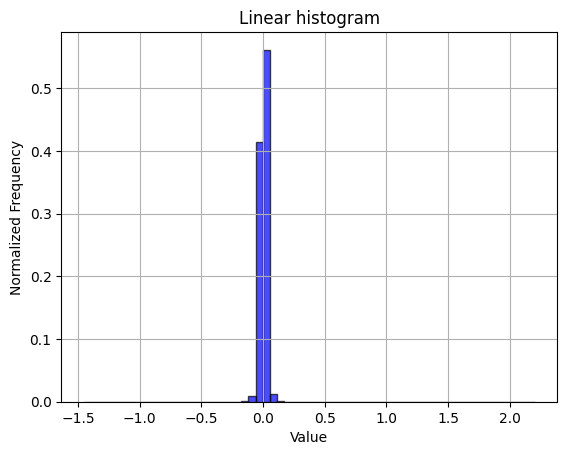

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 1.05963813e-07 3.17891439e-07
 3.17891439e-07 4.23855252e-07 1.05963813e-07 4.23855252e-07
 2.11927626e-07 2.11927626e-07 2.11927626e-07 3.17891439e-07
 5.29819065e-07 6.35782878e-07 7.41746691e-07 1.37752957e-06
 6.35782878e-07 7.41746691e-07 1.37752957e-06 9.53674316e-07
 1.27156576e-06 2.75505914e-06 4.66240777e-06 5.72204590e-06
 7.94728597e-06 2.10867988e-05 6.71810574e-05 5.73794047e-04
 7.92164273e-03 1.15392791e-01 6.46223174e-01 2.13714282e-01
 1.48470137e-02 1.05020735e-03 9.99238756e-05 2.33120388e-05
 1.02784899e-05 6.03993734e-06 2.54313151e-06 2.64909532e-06
 1.90734863e-06 1.48349338e-06 9.53674316e-07 1.37752957e-06
 9.53674316e-07 7.41746691e-07 7.41746691e-07 5.29819065e-07
 0.00000000e+00 7.41746691e-07 4.23855252e-07 2.11927626e-07
 1.05963813e-07 2.11927626e-07 1.05963813e-07 1.05963813e-07
 1.05963813e-07 2.11927626e-07 2.11927626e-07 1.05963813e-07
 1.

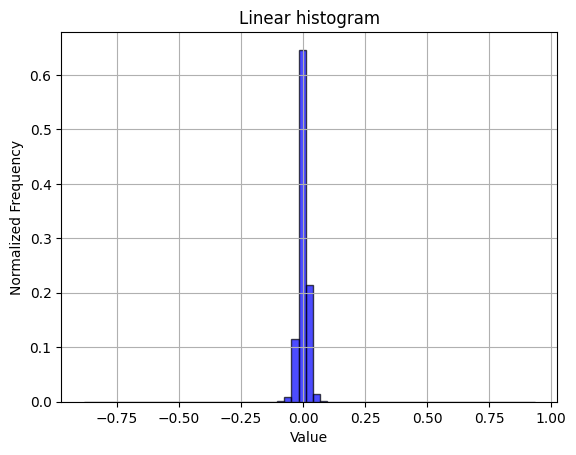

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[5.29819065e-08 7.94728597e-08 1.05963813e-07 1.58945719e-07
 2.64909532e-08 7.94728597e-08 1.58945719e-07 1.58945719e-07
 1.58945719e-07 4.23855252e-07 5.03328111e-07 6.09291924e-07
 1.00665622e-06 1.19209290e-06 2.11927626e-06 3.44382392e-06
 6.43730164e-06 1.17884742e-05 2.40008036e-05 4.75777520e-05
 9.65595245e-05 2.24351883e-04 7.24501080e-04 7.39892324e-03
 4.19674767e-01 5.60911443e-01 9.59865252e-03 8.11179479e-04
 2.51849492e-04 1.03579627e-04 4.96970283e-05 2.36564212e-05
 1.28216214e-05 7.78834025e-06 3.49680583e-06 1.93383959e-06
 1.43051147e-06 7.41746691e-07 7.15255737e-07 3.97364299e-07
 1.85436673e-07 2.38418579e-07 1.85436673e-07 1.32454766e-07
 1.05963813e-07 7.94728597e-08 7.94728597e-08 7.94728597e-08
 5.29819065e-08 7.94728597e-08 5.29819065e

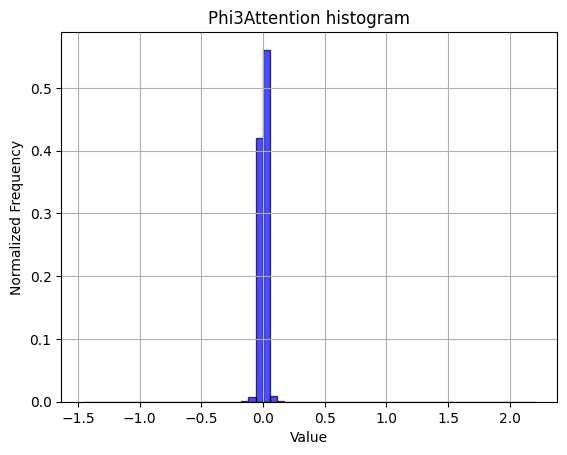

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 3.97364299e-08 1.98682149e-08 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 3.97364299e-08
 3.97364299e-08 7.94728597e-08 7.94728597e-08 1.19209290e-07
 7.94728597e-08 1.39077504e-07 2.98023224e-07 3.17891439e-07
 5.56310018e-07 7.74860382e-07 9.73542531e-07 1.52985255e-06
 1.86761220e-06 3.71535619e-06 5.02665838e-06 9.21885173e-06
 2.44180361e-05 1.30931536e-04 1.11452738e-03 8.44597816e-03
 4.28482493e-02 1.36902730e-01 2.58366585e-01 2.85253127e-01
 1.80972735e-01 6.76239133e-02 1.56255364e-02 2.32776006e-03
 2.68717607e-04 4.10477320e-05 1.14043554e-05 5.86112340e-06
 3.31799189e-06 2.44379044e-06 1.68879827e-06 1.29143397e-06
 9.93410746e-07 6.55651093e-07 3.37759654e-07 2.58286794e-07
 1.39077504e-07 3.97364299e-08 9.93410746e-08 9.93410746e-08
 3.97364299e-08 1.98682149e-08 3.97364299e-08 1.98682149e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

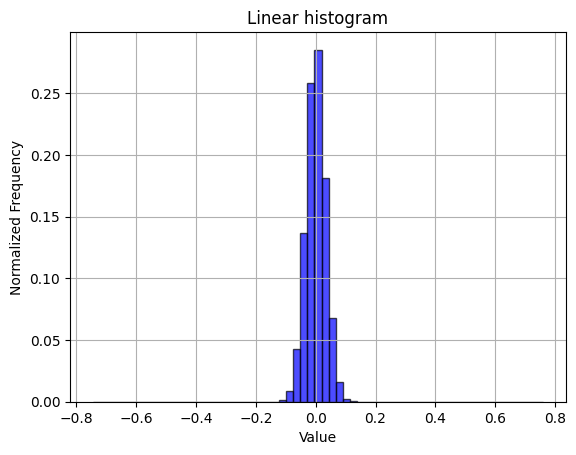

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 7.94728597e-08 1.19209290e-07 7.94728597e-08
 1.19209290e-07 1.98682149e-07 7.94728597e-08 1.58945719e-07
 1.98682149e-07 3.57627869e-07 1.58945719e-07 4.37100728e-07
 3.57627869e-07 7.54992167e-07 6.35782878e-07 6.35782878e-07
 1.35103861e-06 1.50998433e-06 2.50339508e-06 2.78155009e-06
 4.56968943e-06 6.79492950e-06 1.12454096e-05 1.34706497e-05
 2.55902608e-05 4.60147858e-05 9.64800517e-05 5.79396884e-04
 5.79007467e-03 3.87928883e-02 1.48402890e-01 2.97032038e-01
 3.02847783e-01 1.56309446e-01 4.27332322e-02 6.43273195e-03
 6.34590785e-04 1.05698903e-04 4.44253286e-05 2.65836716e-05
 1.76827113e-05 1.02122625e-05 6.35782878e-06 4.25179799e-06
 3.45706940e-06 2.46365865e-06 1.54972076e-06 1.19209290e-06
 7.54992167e-07 7.54992167e-07 3.97364299e-07 4.37100728e-07
 3.17891439e-07 4.37100728e-07 3.97364299e-07 2.38418579e-07
 1.58945719e-07 7.94728597e-08 3.97364299e-08 1.58945719e-07
 3.

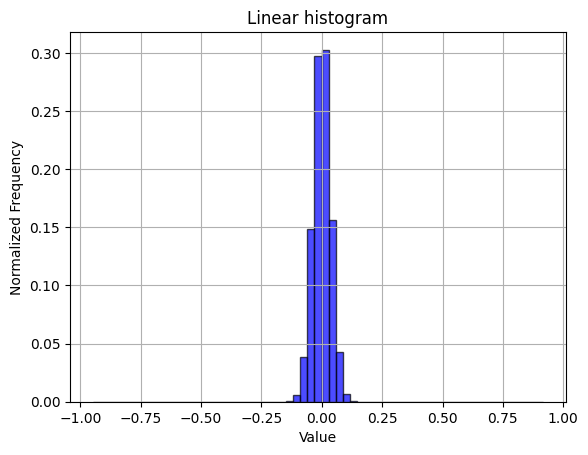

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 3.53212710e-08 1.76606355e-07
 1.41285084e-07 3.17891439e-07 4.94497794e-07 4.23855252e-07
 3.17891439e-07 4.59176523e-07 8.12389232e-07 1.30688703e-06
 1.58945719e-06 1.69542101e-06 2.01331245e-06 3.32

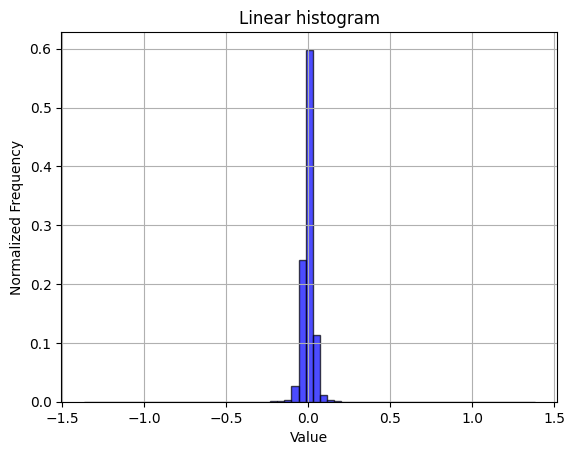

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 1.05963813e-07 0.00000000e+00
 3.17891439e-07 3.17891439e-07 0.00000000e+00 1.05963813e-07
 4.23855252e-07 5.29819065e-07 4.23855252e-07 7.41746691e-07
 9.53674316e-07 7.41746691e-07 1.16560194e-06 1.48349338e-06
 1.48349338e-06 2.86102295e-06 4.45048014e-06 5.08626302e-06
 7.31150309e-06 9.74867079e-06 1.70601739e-05 3.01996867e-05
 1.46653917e-04 1.23829312e-03 1.01999707e-02 5.88532554e-02
 2.27572547e-01 4.19965320e-01 2.16115210e-01 5.50121731e-02
 9.45366753e-03 1.13900503e-03 1.27898322e-04 3.05175781e-05
 1.81198120e-05 1.27156576e-05 9.64270698e-06 4.55644396e-06
 3.81469727e-06 2.54313151e-06 2.11927626e-06 1.80138482e-06
 5.29819065e-07 1.05963813e-06 5.29819065e-07 4.23855252e-07
 6.35782878e-07 2.11927626e-07 1.05963813e-07 3.17891439e-07
 2.11927626e-07 1.05963813e-07 1.05963813e-07 1.05963813e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

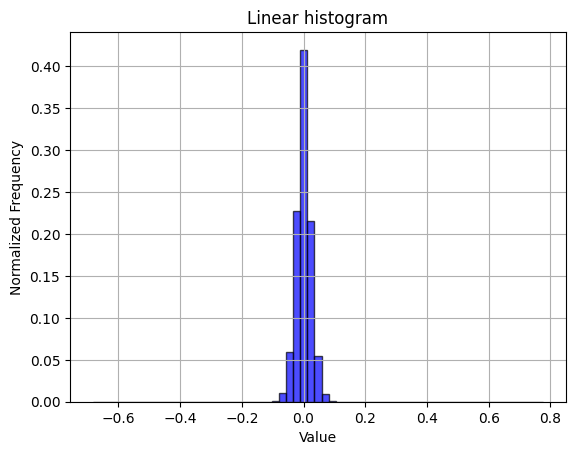

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 2.64909532e-08 1.32454766e-07
 1.05963813e-07 2.38418579e-07 3.70873345e-07 3.17891439e-07
 2.38418579e-07 3.44382392e-07 6.09291924e-07 9.80165270e-07
 1.19209290e-06 1.27156576e-06 1.50998433e-06 2.51664056e-06
 2.78155009e-06 3.60276964e-06 4.98029921e-06 7.23203023e-06
 1.16295285e-05 1.69807010e-05 2.80539195e-05 4.62796953e-05
 8.20689731e-05 1.69012282e-04 3.40541204e-04 8.27842289e-04
 2.81590886e-03 2.25779215e-02 2.41577970e-01 6.10739946e-01
 1.08204974e-01 9.68837738e-03 1.67655945e-03 5.98483615e-04
 2.56856283e-04 1.32322311e-04 6.62538740e-05 3.78820631e-05
 2.39478217e-05 1.30600399e-05 1.00135803e-05 7.68237644e-06
 4.50346205e-06 4.84784444e-06 2.64909532e-06 1.96033054e-06
 1.69542101e-06 1.40402052e-06 1.00665622e

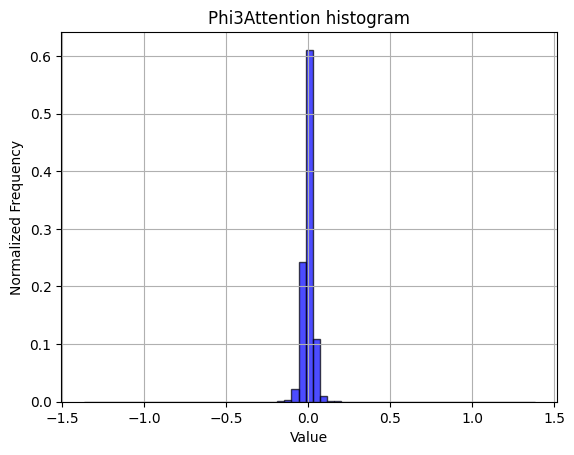

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 1.98682149e-08 0.00000000e+00 1.98682149e-08
 1.98682149e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 1.98682149e-08 5.96046448e-08 3.97364299e-08 1.98682149e-08
 5.96046448e-08 3.97364299e-08 3.97364299e-08 7.94728597e-08
 2.18550364e-07 2.78155009e-07 4.76837158e-07 6.15914663e-07
 8.54333242e-07 1.92721685e-06 4.45048014e-06 1.01327896e-05
 5.69224358e-05 1.16884708e-03 1.49992704e-02 9.27852392e-02
 2.64092326e-01 3.49307835e-01 2.10766017e-01 5.85267544e-02
 7.73541133e-03 4.99486923e-04 2.79545784e-05 7.03334808e-06
 3.21865082e-06 1.68879827e-06 9.13937887e-07 4.96705373e-07
 2.58286794e-07 2.78155009e-07 1.19209290e-07 9.93410746e-08
 5.96046448e-08 7.94728597e-08 0.00000000e+00 1.98682149e-08
 3.97364299e-08 3.97364299e-08 5.96046448e-08 1.98682149e-08
 3.97364299e-08 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

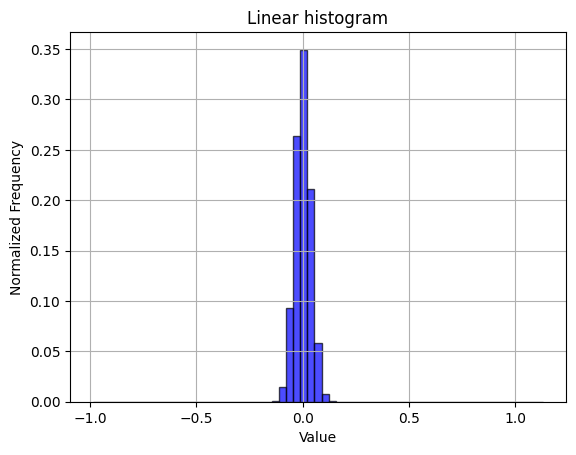

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.97364299e-08 3.97364299e-08 3.97364299e-08 7.94728597e-08
 3.97364299e-08 0.00000000e+00 1.58945719e-07 7.94728597e-08
 7.94728597e-08 7.94728597e-08 1.19209290e-07 1.98682149e-07
 7.94728597e-08 2.38418579e-07 3.97364299e-07 5.16573588e-07
 9.13937887e-07 1.07288361e-06 1.47024790e-06 2.78155009e-06
 4.72863515e-06 7.03334808e-06 1.52587891e-05 3.87827555e-05
 3.00765038e-04 6.12747669e-03 6.66883787e-02 2.70147006e-01
 3.99276257e-01 2.12098996e-01 4.19522524e-02 3.11803818e-03
 1.51634216e-04 3.18288803e-05 1.55766805e-05 7.62939453e-06
 3.61601512e-06 2.06629435e-06 1.54972076e-06 4.37100728e-07
 4.37100728e-07 1.58945719e-07 1.98682149e-07 2.78155009e-07
 1.98682149e-07 7.94728597e-08 1.19209290e-07 1.19209290e-07
 7.94728597e-08 1.19209290e-07 7.94728597e-08 0.00000000e+00
 0.00000000e+00 7.94728597e-08 7.94728597e-08 0.00000000e+00
 3.

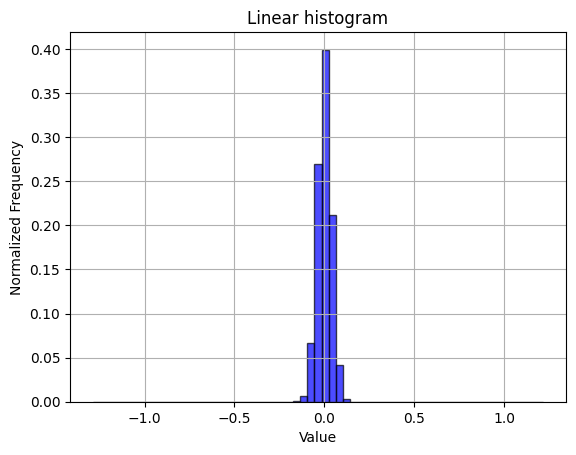

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.06425420e-08 3.53212710e-08 7.06425420e-08
 1.05963813e-07 1.76606355e-07 2.47248897e-07 2.47248897e-07
 3.53212710e-07 3.88533981e-07 7.77067962e-07 1.13

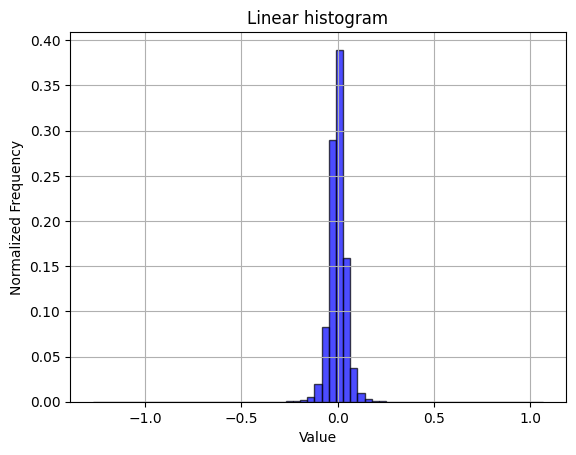

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 1.05963813e-07
 0.00000000e+00 1.05963813e-07 0.00000000e+00 0.00000000e+00
 1.05963813e-07 2.11927626e-07 3.17891439e-07 1.05963813e-07
 3.17891439e-07 1.05963813e-06 8.47710503e-07 6.35782878e-07
 7.41746691e-07 2.11927626e-06 3.07295058e-06 4.23855252e-06
 6.56975640e-06 9.21885173e-06 1.62124634e-05 3.34845649e-05
 8.42412313e-05 1.13805135e-03 3.04929945e-02 2.74663819e-01
 5.06550895e-01 1.73216184e-01 1.32173962e-02 4.29047479e-04
 5.85979886e-05 2.73386637e-05 1.37752957e-05 9.32481554e-06
 5.29819065e-06 4.23855252e-06 2.01331245e-06 2.86102295e-06
 1.48349338e-06 5.29819065e-07 7.41746691e-07 3.17891439e-07
 0.00000000e+00 2.11927626e-07 0.00000000e+00 2.11927626e-07
 2.11927626e-07 2.11927626e-07 1.05963813e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.05963813e-07 0.00000000e+00
 1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

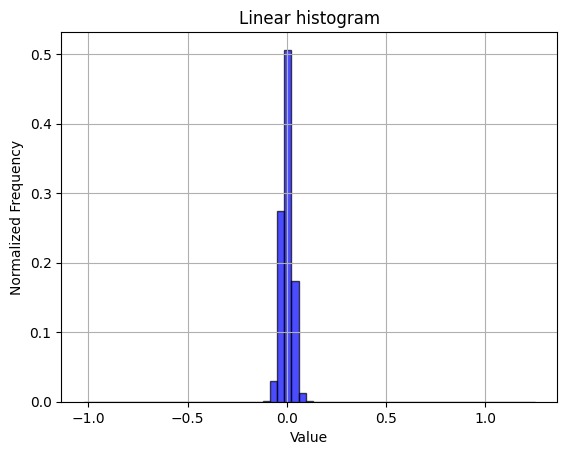

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.29819065e-08 7.94728597e-08 2.64909532e-08
 1.32454766e-07 2.91400486e-07 1.32454766e-07 3.44382392e-07
 2.91400486e-07 7.15255737e-07 7.94728597e-07 1.08612908e-06
 1.64243910e-06 2.49014960e-06 3.94715203e-06 5.88099162e-06
 7.86781311e-06 1.52587891e-05 2.56432427e-05 5.04917569e-05
 9.28507911e-05 2.17570199e-04 5.43885761e-04 1.57984098e-03
 5.32974137e-03 2.34521760e-02 1.36513551e-01 4.36613030e-01
 3.12430832e-01 6.60988225e-02 1.21456517e-02 3.17602687e-03
 9.90364287e-04 3.73787350e-04 1.55475405e-04 7.40157233e-05
 3.60541874e-05 2.22788917e-05 1.30335490e-05 7.92079502e-06
 4.74188063e-06 3.39084201e-06 2.41067674e-06 1.82787577e-06
 1.05963813e-06 6.35782878e-07 4.76837158e

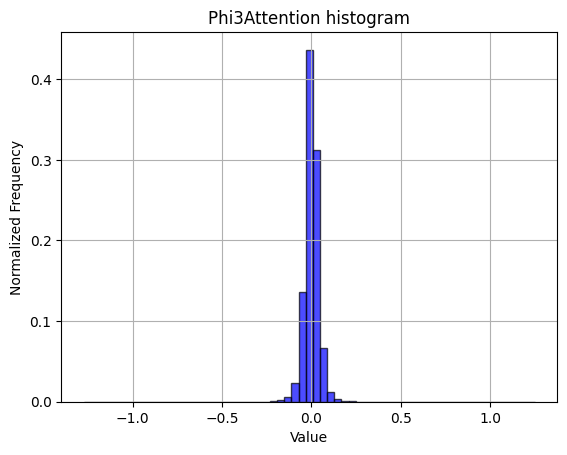

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 1.98682149e-08
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 1.98682149e-08 1.98682149e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 1.98682149e-08 1.98682149e-08 1.98682149e-08
 3.97364299e-08 3.97364299e-08 3.97364299e-08 1.58945719e-07
 9.93410746e-08 1.78813934e-07 3.37759654e-07 8.54333242e-07
 1.29143397e-06 2.08616257e-06 4.01337941e-06 8.62280528e-06
 3.38951747e-05 1.65512164e-03 3.99789015e-02 2.60704299e-01
 4.56716081e-01 2.13597794e-01 2.63628165e-02 8.94765059e-04
 2.33848890e-05 7.29163488e-06 3.21865082e-06 1.62919362e-06
 1.01327896e-06 5.56310018e-07 4.96705373e-07 2.18550364e-07
 7.94728597e-08 7.94728597e-08 7.94728597e-08 3.97364299e-08
 5.96046448e-08 1.98682149e-08 0.00000000e+00 1.98682149e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 1.98682149e-08
 3.97364299e-08 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0

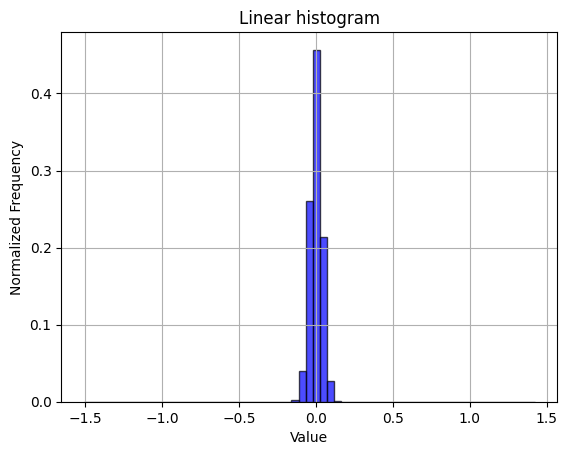

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 2.38418579e-07 1.58945719e-07 2.38418579e-07
 4.37100728e-07 1.07288361e-06 2.62260437e-06 1.01725260e-05
 2.60194143e-04 1.34802818e-01 7.83175945e-01 8.16144546e-02
 1.17341677e-04 9.61621602e-06 2.66234080e-06 7.15255737e-07
 4.37100728e-07 1.19209290e-07 3.97364299e-08 1.19209290e-07
 1.58945719e-07 1.19209290e-07 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

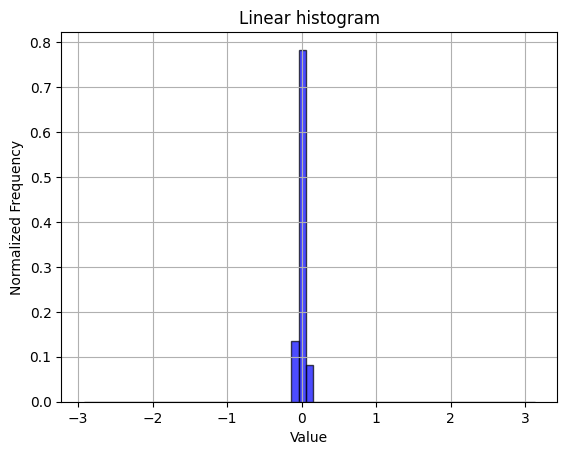

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.06425420e-08 3.53212710e-08 1.76606355e-07
 3.53212710e-08 7.06425420e-08 1.05963813e-07 1.76606355e-07
 1.05963813e-07 3.53212710e-08 1.05963813e-07 2.82

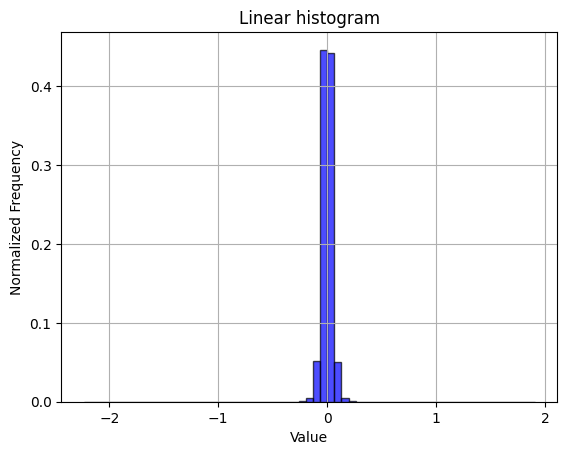

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.05963813e-07 1.05963813e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.11927626e-07 4.23855252e-07 1.05963813e-07
 7.41746691e-07 6.35782878e-07 7.41746691e-07 5.29819065e-07
 9.53674316e-07 5.29819065e-07 1.69542101e-06 2.33120388e-06
 3.92066108e-06 6.14590115e-06 7.20553928e-06 1.39872233e-05
 2.60670980e-05 1.09884474e-04 1.19495392e-03 1.06146071e-02
 5.84819582e-02 1.77004390e-01 2.98658795e-01 2.73885303e-01
 1.35748969e-01 3.75064214e-02 6.02626801e-03 5.75383504e-04
 6.74989488e-05 2.28881836e-05 1.05963813e-05 8.05324978e-06
 4.34451633e-06 3.28487820e-06 2.64909532e-06 1.69542101e-06
 1.16560194e-06 7.41746691e-07 9.53674316e-07 9.53674316e-07
 4.23855252e-07 4.23855252e-07 0.00000000e+00 0.00000000e+00
 3.17891439e-07 1.05963813e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.05963813e-07 0.00000000e+00 0.00000000e+00
 2.

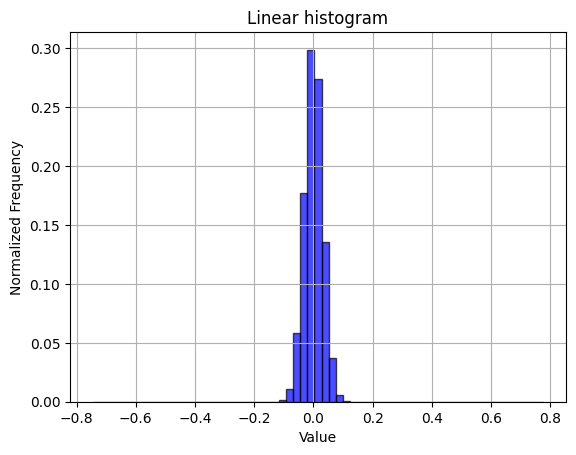

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.29819065e-08 2.64909532e-08 1.32454766e-07
 2.64909532e-08 5.29819065e-08 7.94728597e-08 1.32454766e-07
 7.94728597e-08 2.64909532e-08 7.94728597e-08 2.11927626e-07
 1.58945719e-07 5.29819065e-08 7.94728597e-08 3.70873345e-07
 4.23855252e-07 1.27156576e-06 1.08612908e-06 1.48349338e-06
 1.64243910e-06 1.19209290e-06 2.64909532e-06 3.57627869e-06
 7.94728597e-06 3.84913550e-05 3.31534280e-04 3.43518787e-03
 4.24910916e-02 4.56497431e-01 4.51806254e-01 4.15356424e-02
 3.46636772e-03 3.14447615e-04 3.71668074e-05 8.74201457e-06
 3.54978773e-06 1.82787577e-06 1.58945719e-06 1.53647529e-06
 1.69542101e-06 1.21858385e-06 8.21219550e-07 6.35782878e-07
 3.97364299e-07 1.58945719e-07 2.64909532e

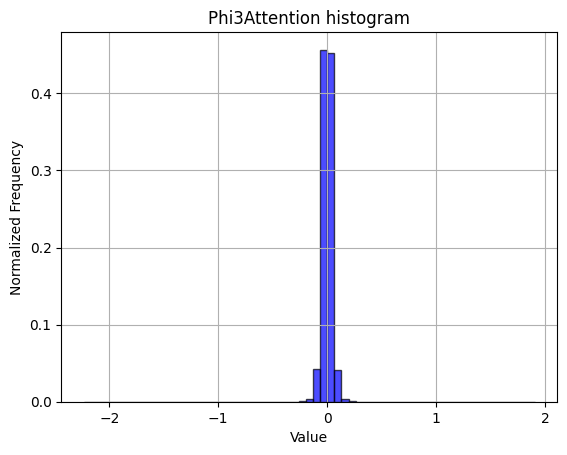

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 5.96046448e-08
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 7.94728597e-08 1.98682149e-08
 9.93410746e-08 1.19209290e-07 1.58945719e-07 1.19209290e-07
 2.78155009e-07 4.96705373e-07 8.34465027e-07 1.49011612e-06
 3.97364299e-06 1.07884407e-05 1.86602275e-04 3.90313069e-03
 3.98745338e-02 1.80171331e-01 3.50253165e-01 2.96660860e-01
 1.09665076e-01 1.79136594e-02 1.29266580e-03 5.01473745e-05
 5.36441803e-06 2.34444936e-06 9.73542531e-07 5.36441803e-07
 2.98023224e-07 2.38418579e-07 1.19209290e-07 1.98682149e-08
 5.96046448e-08 7.94728597e-08 7.94728597e-08 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 1

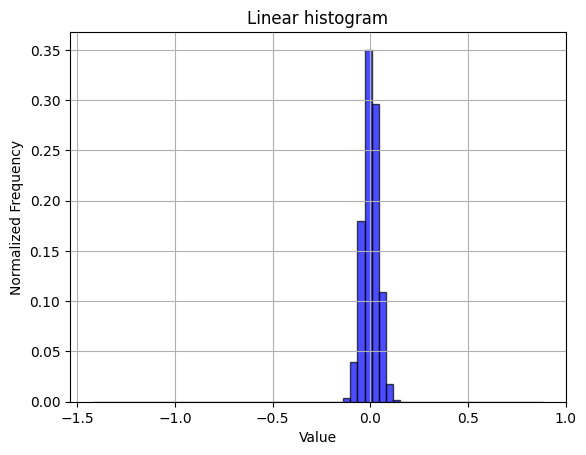

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 3.97364299e-08 0.00000000e+00 1.58945719e-07 0.00000000e+00
 1.58945719e-07 3.97364299e-08 1.58945719e-07 7.94728597e-08
 1.58945719e-07 3.17891439e-07 4.76837158e-07 5.16573588e-07
 7.54992167e-07 8.74201457e-07 1.58945719e-06 2.86102295e-06
 5.76178233e-06 1.73250834e-05 1.54534976e-04 1.69165929e-03
 1.22880141e-02 5.66859245e-02 1.55447443e-01 2.62169560e-01
 2.66880989e-01 1.65838321e-01 6.22518460e-02 1.42711798e-02
 2.06855933e-03 1.86999639e-04 1.91926956e-05 6.75519307e-06
 2.90075938e-06 1.39077504e-06 7.94728597e-07 8.34465027e-07
 3.17891439e-07 3.57627869e-07 1.98682149e-07 1.98682149e-07
 7.94728597e-08 1.19209290e-07 7.94728597e-08 0.00000000e+00
 3.97364299e-08 3.97364299e-08 1.19209290e-07 3.97364299e-08
 0.

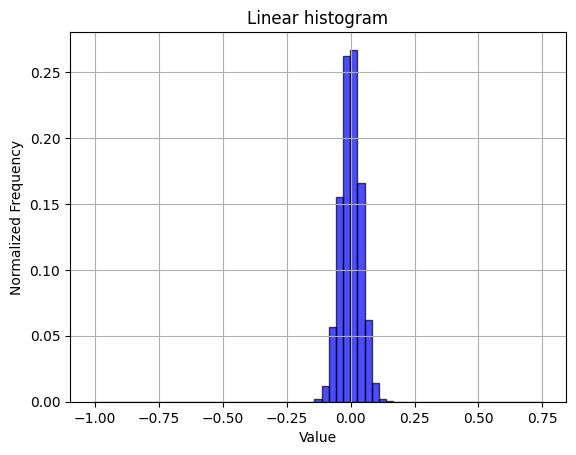

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 3.53212710e-08 7.06425420e-08
 1.41285084e-07 0.00000000e+00 2.11927626e-07 3.53212710e-08
 1.05963813e-07 0.00000000e+00 1.05963813e-07 1.41285084e-07
 7.06425420e-08 2.82570168e-07 5.29819065e-07 6.00

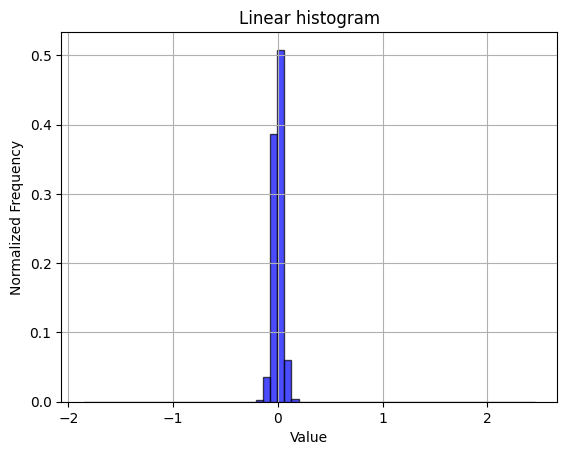

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 2.11927626e-07 1.05963813e-07 1.05963813e-07
 1.05963813e-07 2.11927626e-07 1.05963813e-07 2.11927626e-07
 3.17891439e-07 4.23855252e-07 4.23855252e-07 9.53674316e-07
 1.90734863e-06 1.16560194e-06 2.01331245e-06 2.43716770e-06
 3.07295058e-06 4.55644396e-06 7.62939453e-06 1.38812595e-05
 1.81198120e-05 3.43322754e-05 1.53435601e-04 1.52640873e-03
 1.27889845e-02 6.28079308e-02 1.83979988e-01 2.98827489e-01
 2.66082022e-01 1.31132762e-01 3.59147390e-02 5.92316522e-03
 6.20418125e-04 7.67178006e-05 2.69148085e-05 1.45170424e-05
 9.11288791e-06 5.40415446e-06 4.23855252e-06 2.43716770e-06
 2.33120388e-06 1.80138482e-06 9.53674316e-07 9.53674316e-07
 9.53674316e-07 7.41746691e-07 1.05963813e-06 6.35782878e-07
 4.23855252e-07 2.11927626e-07 1.05963813e-07 0.00000000e+00
 2.11927626e-07 1.05963813e-07 1.05963813e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.

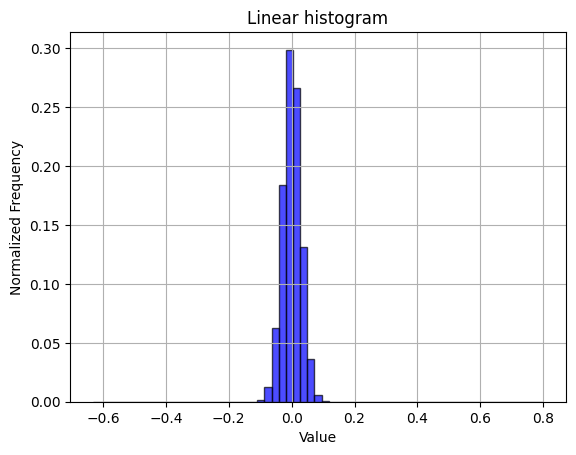

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 2.64909532e-08 5.29819065e-08
 1.05963813e-07 0.00000000e+00 1.58945719e-07 2.64909532e-08
 7.94728597e-08 0.00000000e+00 7.94728597e-08 1.05963813e-07
 5.29819065e-08 2.11927626e-07 3.97364299e-07 4.50346205e-07
 8.74201457e-07 7.94728597e-07 1.58945719e-06 1.74840291e-06
 1.96033054e-06 4.29153442e-06 1.21328566e-05 1.30361981e-04
 1.96001265e-03 2.85780960e-02 3.90893751e-01 5.24979459e-01
 4.99770641e-02 3.21017371e-03 2.13755502e-04 1.70866648e-05
 4.39749824e-06 2.67558628e-06 1.80138482e-06 1.61594815e-06
 1.35103861e-06 9.53674316e-07 6.35782878e-07 3.70873345e-07
 3.17891439e-07 2.38418579e-07 1.58945719e-07 1.05963813e-07
 5.29819065e-08 2.64909532e-08 2.64909532e-08 1.05963813e-07
 2.64909532e-08 7.94728597e-08 5.29819065e

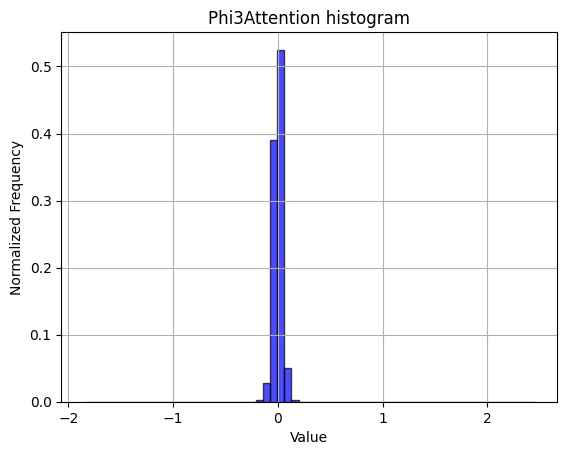

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 1.98682149e-08 0.00000000e+00
 3.97364299e-08 0.00000000e+00 1.98682149e-08 5.96046448e-08
 0.00000000e+00 1.98682149e-08 7.94728597e-08 5.96046448e-08
 5.96046448e-08 1.98682149e-08 9.93410746e-08 1.19209290e-07
 1.78813934e-07 3.97364299e-07 1.03314718e-06 1.96695328e-06
 4.64916229e-06 1.28944715e-05 1.69535478e-04 5.04277150e-03
 6.08926415e-02 2.62386719e-01 4.06033973e-01 2.19240149e-01
 4.30655281e-02 3.03216775e-03 9.72350438e-05 9.67582067e-06
 4.01337941e-06 1.62919362e-06 8.94069672e-07 4.56968943e-07
 1.78813934e-07 1.78813934e-07 9.93410746e-08 3.97364299e-08
 3.97364299e-08 3.97364299e-08 1.98682149e-08 1.98682149e-08
 5.96046448e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0

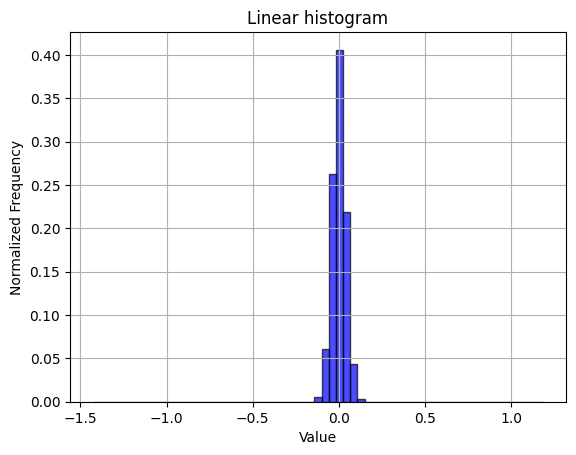

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.94728597e-08 1.58945719e-07
 1.58945719e-07 1.98682149e-07 3.57627869e-07 3.97364299e-07
 1.43051147e-06 3.33786011e-06 1.35501226e-05 1.19952361e-03
 9.75836515e-02 5.83835204e-01 3.04541151e-01 1.27538443e-02
 5.59091568e-05 6.23861949e-06 1.90734863e-06 8.34465027e-07
 6.35782878e-07 2.38418579e-07 2.78155009e-07 1.58945719e-07
 1.19209290e-07 3.97364299e-08 7.94728597e-08 3.97364299e-08
 0.00000000e+00 7.94728597e-08 7.94728597e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

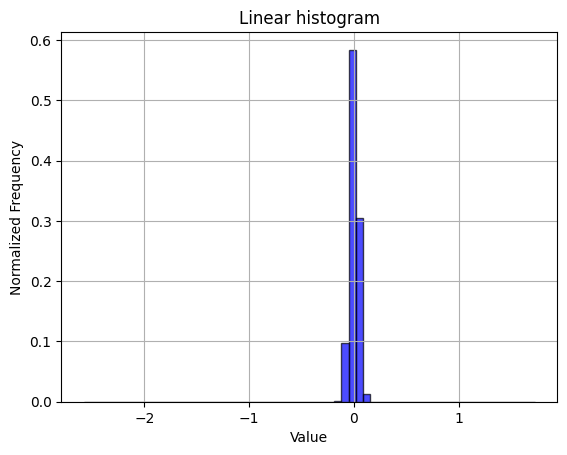

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 3.53212710e-08 0.00000000e+00 3.53212710e-08
 3.53212710e-08 0.00000000e+00 7.06425420e-08 7.06425420e-08
 1.05963813e-07 1.76606355e-07 7.06425420e-08 2.47248897e-07
 7.06425420e-08 7.06425420e-08 2.11927626e-07 7.06

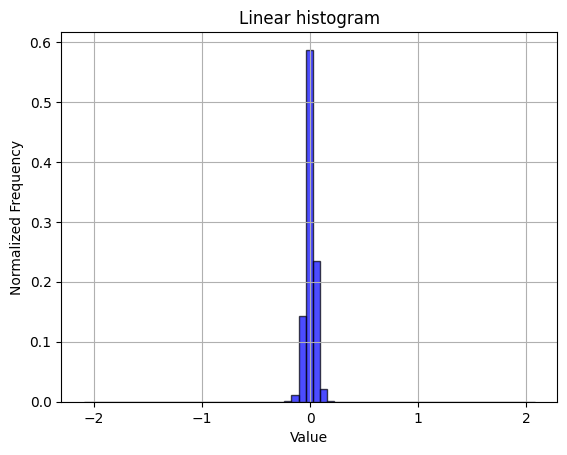

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 2.11927626e-07 0.00000000e+00 1.05963813e-07
 2.11927626e-07 3.17891439e-07 3.17891439e-07 4.23855252e-07
 1.05963813e-07 2.11927626e-07 5.29819065e-07 5.29819065e-07
 7.41746691e-07 1.16560194e-06 1.37752957e-06 8.47710503e-07
 1.05963813e-06 2.86102295e-06 4.02662489e-06 5.40415446e-06
 8.37114122e-06 1.88615587e-05 3.23189629e-05 1.73568726e-04
 2.13739607e-03 1.92029741e-02 9.32430691e-02 2.43680424e-01
 3.28640302e-01 2.19612651e-01 7.68529044e-02 1.46791670e-02
 1.50330861e-03 1.21434530e-04 2.95639038e-05 1.58945719e-05
 8.26517741e-06 4.34451633e-06 3.70873345e-06 2.43716770e-06
 1.80138482e-06 2.01331245e-06 9.53674316e-07 6.35782878e-07
 4.23855252e-07 3.17891439e-07 3.17891439e-07 3.17891439e-07
 4.23855252e-07 2.11927626e-07 0.00000000e+00 3.17891439e-07
 0.00000000e+00 1.05963813e-07 0.00000000e+00 1.05963813e-07
 1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.

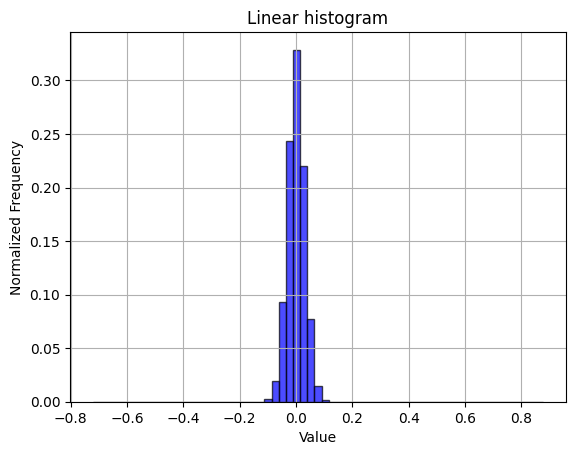

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 2.64909532e-08 0.00000000e+00 2.64909532e-08
 2.64909532e-08 0.00000000e+00 5.29819065e-08 5.29819065e-08
 7.94728597e-08 1.32454766e-07 5.29819065e-08 1.85436673e-07
 5.29819065e-08 5.29819065e-08 1.58945719e-07 5.29819065e-08
 1.58945719e-07 1.85436673e-07 2.11927626e-07 4.50346205e-07
 6.62273831e-07 1.21858385e-06 1.40402052e-06 2.14576721e-06
 2.38418579e-06 5.11275397e-06 7.81483120e-06 2.62525347e-05
 4.63856591e-04 8.54632590e-03 1.29294713e-01 6.18401024e-01
 2.25939433e-01 1.62959629e-02 9.37594308e-04 4.69949510e-05
 9.61621602e-06 4.34451633e-06 3.01996867e-06 2.11927626e-06
 1.74840291e-06 1.32454766e-06 7.41746691e-07 5.56310018e-07
 3.70873345e-07 2.38418579e-07 5.29819065e-08 7.94728597e-08
 1.05963813e-07 1.05963813e-07 7.94728597e

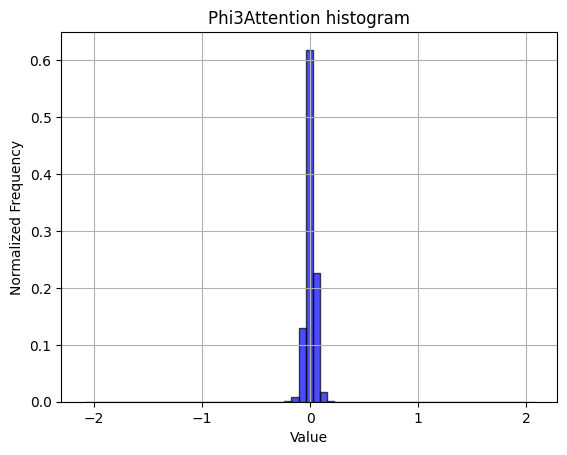

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 1.98682149e-08
 0.00000000e+00 0.00000000e+00 1.98682149e-08 1.98682149e-08
 3.97364299e-08 1.19209290e-07 1.39077504e-07 1.58945719e-07
 2.58286794e-07 2.78155009e-07 3.97364299e-07 7.74860382e-07
 9.73542531e-07 1.66893005e-06 2.84115473e-06 6.33796056e-06
 2.48551369e-05 1.51793162e-04 7.95404116e-04 3.82765134e-03
 1.36791468e-02 3.91010841e-02 8.71785084e-02 1.48774922e-01
 1.96993013e-01 1.98508720e-01 1.54687921e-01 9.27865903e-02
 4.26849922e-02 1.54638092e-02 4.18559710e-03 9.22739506e-04
 1.76668167e-04 2.87294388e-05 6.93400701e-06 2.62260437e-06
 1.17222468e-06 9.93410746e-07 5.36441803e-07 3.37759654e-07
 3.97364299e-07 2.18550364e-07 1.58945719e-07 5.96046448e-08
 5.96046448e-08 1.19209290e-07 1.98682149e-08 1.98682149e-08
 1.98682149e-08 0.00000000e+00 1.98682149e-08 1.98682149e-08
 0

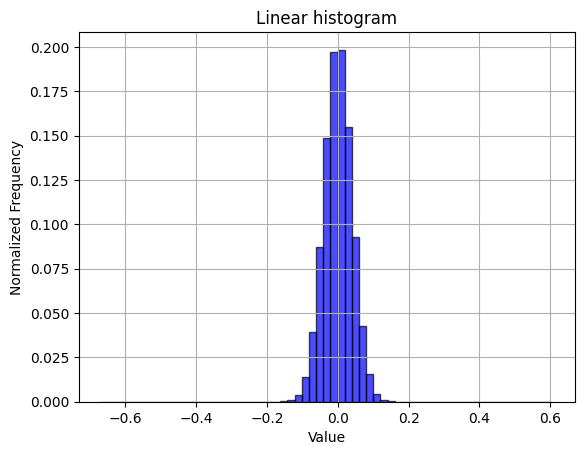

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 3.97364299e-08 3.97364299e-08 3.97364299e-08
 3.97364299e-08 7.94728597e-08 1.19209290e-07 1.98682149e-07
 1.98682149e-07 1.98682149e-07 5.56310018e-07 5.56310018e-07
 9.13937887e-07 1.47024790e-06 3.21865082e-06 1.36693319e-05
 3.32434972e-04 8.77420108e-03 8.28787486e-02 2.97541817e-01
 3.88328036e-01 1.87177340e-01 3.27177048e-02 2.15152899e-03
 6.34590785e-05 6.51677450e-06 3.13917796e-06 1.58945719e-06
 7.15255737e-07 3.57627869e-07 1.19209290e-07 1.58945719e-07
 1.19209290e-07 1.58945719e-07 7.94728597e-08 7.94728597e-08
 7.94728597e-08 3.97364299e-08 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

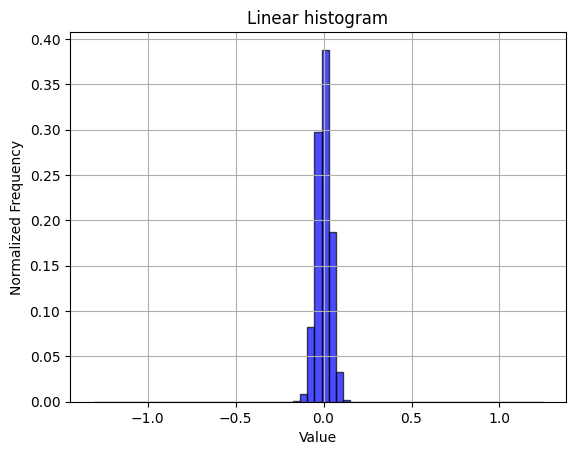

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.05963813e-07 3.53212710e-08 3.53212710e-08 0.00000000e+00
 7.06425420e-08 7.06425420e-08 7.06425420e-08 0.00000000e+00
 2.11927626e-07 1.05963813e-07 1.05963813e-07 1.41

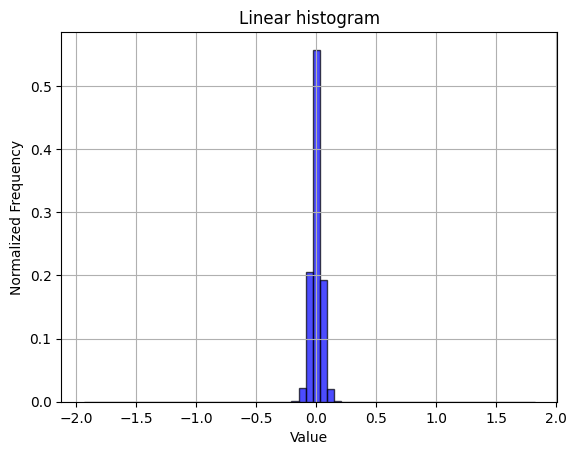

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.05963813e-07
 1.05963813e-07 0.00000000e+00 0.00000000e+00 1.05963813e-07
 3.17891439e-07 1.05963813e-07 1.05963813e-07 3.17891439e-07
 3.17891439e-07 5.29819065e-07 7.41746691e-07 1.16560194e-06
 2.01331245e-06 2.22524007e-06 3.07295058e-06 5.19222683e-06
 8.05324978e-06 1.33514404e-05 2.17225817e-05 6.29425049e-05
 7.31998020e-04 8.65258111e-03 5.82070880e-02 2.06393454e-01
 3.47303391e-01 2.64689445e-01 9.46798325e-02 1.73045264e-02
 1.72138214e-03 1.26944648e-04 2.55372789e-05 1.45170424e-05
 9.32481554e-06 6.03993734e-06 2.64909532e-06 2.75505914e-06
 1.16560194e-06 1.69542101e-06 1.16560194e-06 3.17891439e-07
 2.11927626e-07 4.23855252e-07 3.17891439e-07 2.11927626e-07
 0.00000000e+00 0.00000000e+00 1.05963813e-07 1.05963813e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

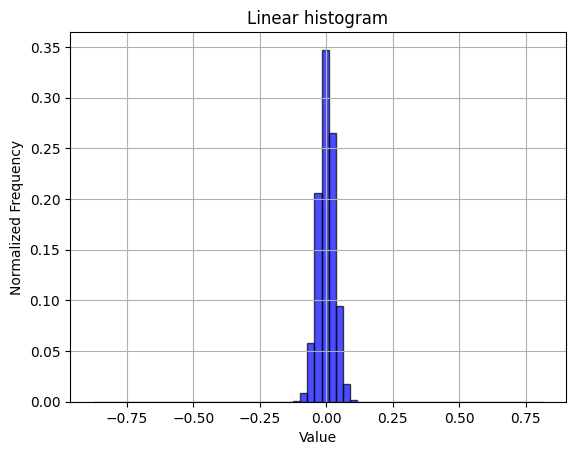

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.94728597e-08 2.64909532e-08 2.64909532e-08 0.00000000e+00
 5.29819065e-08 5.29819065e-08 5.29819065e-08 0.00000000e+00
 1.58945719e-07 7.94728597e-08 7.94728597e-08 1.05963813e-07
 7.94728597e-08 1.32454766e-07 1.58945719e-07 1.85436673e-07
 5.56310018e-07 8.21219550e-07 1.29805671e-06 1.27156576e-06
 2.41067674e-06 3.89417013e-06 6.11941020e-06 1.46759881e-05
 8.77380371e-05 1.24549866e-03 1.65787273e-02 1.95523368e-01
 5.88579946e-01 1.81480355e-01 1.52143372e-02 1.14138921e-03
 8.35524665e-05 1.44110786e-05 6.38431973e-06 4.00013394e-06
 2.33120388e-06 1.82787577e-06 1.24507480e-06 6.62273831e-07
 3.44382392e-07 2.38418579e-07 2.64909532e-07 2.11927626e-07
 1.85436673e-07 7.94728597e-08 1.05963813e

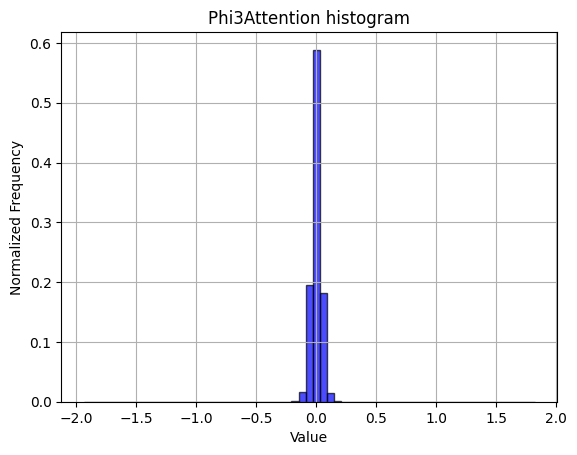

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 1.98682149e-08 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 1.98682149e-08
 0.00000000e+00 1.98682149e-08 0.00000000e+00 7.94728597e-08
 5.96046448e-08 1.98682149e-08 3.97364299e-08 3.97364299e-08
 1.39077504e-07 7.94728597e-08 1.98682149e-07 3.57627869e-07
 4.76837158e-07 7.74860382e-07 1.25169754e-06 2.34444936e-06
 5.36441803e-06 1.76827113e-05 8.71817271e-05 5.57859739e-04
 3.16941738e-03 1.38370593e-02 4.46476738e-02 1.08778874e-01
 1.86153511e-01 2.30897526e-01 2.01966306e-01 1.27312064e-01
 5.82585732e-02 1.87070568e-02 4.55768903e-03 8.63393148e-04
 1.36395295e-04 2.61863073e-05 7.21216202e-06 2.98023224e-06
 1.45037969e-06 7.94728597e-07 4.37100728e-07 3.77496084e-07
 1.98682149e-07 1.19209290e-07 1.39077504e-07 7.94728597e-08
 7.94728597e-08 5.96046448e-08 5.96046448e-08 7.94728597e-08
 3.97364299e-08 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0

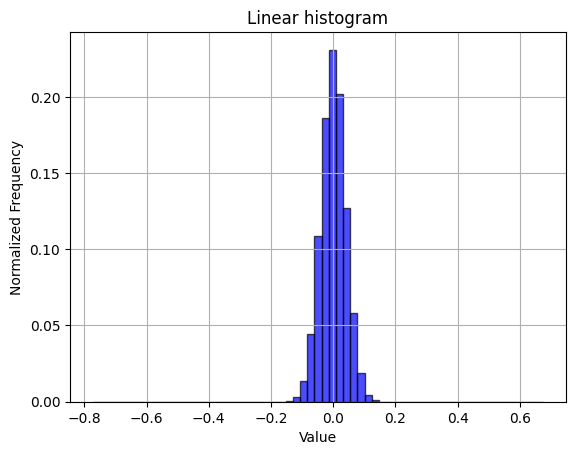

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 3.97364299e-08 3.97364299e-08 3.97364299e-08 3.97364299e-08
 7.94728597e-08 7.94728597e-08 2.38418579e-07 1.58945719e-07
 2.38418579e-07 1.98682149e-07 1.58945719e-07 2.38418579e-07
 7.54992167e-07 8.74201457e-07 1.58945719e-06 1.94708506e-06
 4.13258870e-06 7.11282094e-06 4.50611115e-05 8.70545705e-04
 1.12581253e-02 7.22719828e-02 2.26491332e-01 3.42179537e-01
 2.46687730e-01 8.48673979e-02 1.40602589e-02 1.16682053e-03
 6.13927841e-05 9.13937887e-06 4.76837158e-06 2.18550364e-06
 1.86761220e-06 1.35103861e-06 6.35782878e-07 2.38418579e-07
 5.16573588e-07 2.38418579e-07 1.19209290e-07 3.97364299e-08
 1.19209290e-07 0.00000000e+00 1.98682149e-07 3.97364299e-08
 3.97364299e-08 7.94728597e-08 0.00000000e+00 0.00000000e+00
 3.97364299e-08 3.97364299e-08 0.00000000e+00 3.97364299e-08
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

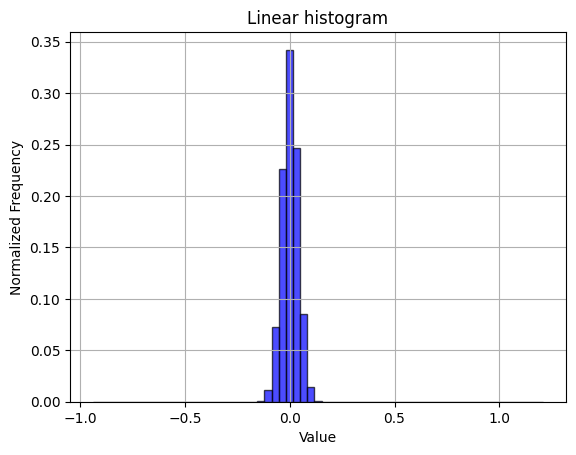

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[1.05963813e-07 0.00000000e+00 3.53212710e-08 3.53212710e-08
 3.53212710e-08 3.53212710e-08 3.53212710e-08 1.76606355e-07
 3.53212710e-08 7.06425420e-08 1.05963813e-07 1.05963813e-07
 7.06425420e-08 7.06425420e-08 3.17891439e-07 3.17

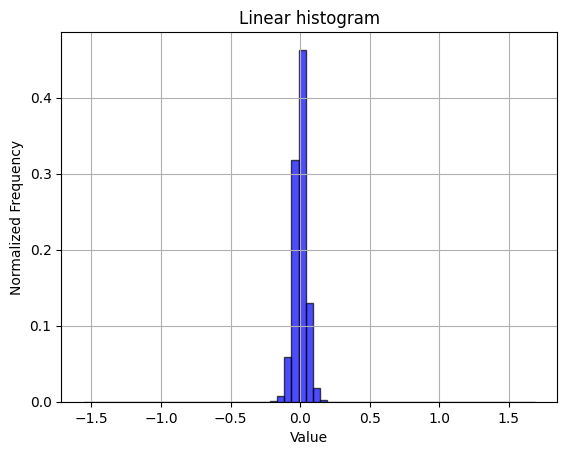

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[4.23855252e-07 1.05963813e-07 0.00000000e+00 4.23855252e-07
 3.17891439e-07 3.17891439e-07 0.00000000e+00 2.11927626e-07
 4.23855252e-07 1.37752957e-06 2.22524007e-06 2.01331245e-06
 2.43716770e-06 2.33120388e-06 4.13258870e-06 5.61608209e-06
 9.00692410e-06 1.45170424e-05 1.83317396e-05 4.05841404e-05
 2.61836582e-04 3.08026208e-03 2.51515706e-02 1.16065979e-01
 2.83922195e-01 3.33043416e-01 1.80021604e-01 4.99320560e-02
 7.58775075e-03 6.88446893e-04 6.76049127e-05 2.39478217e-05
 1.43051147e-05 8.47710503e-06 5.72204590e-06 4.55644396e-06
 3.39084201e-06 3.70873345e-06 2.01331245e-06 2.01331245e-06
 7.41746691e-07 8.47710503e-07 5.29819065e-07 2.11927626e-07
 3.17891439e-07 5.29819065e-07 1.05963813e-07 3.17891439e-07
 2.11927626e-07 0.00000000e+00 1.05963813e-07 1.05963813e-07
 0.00000000e+00 0.00000000e+00 1.05963813e-07 0.00000000e+00
 1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

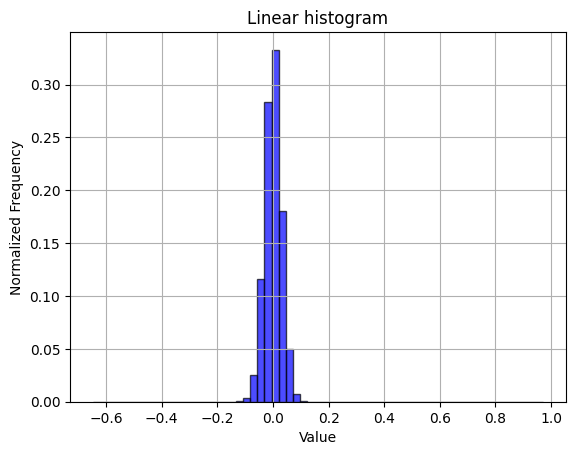

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[7.94728597e-08 0.00000000e+00 2.64909532e-08 2.64909532e-08
 2.64909532e-08 2.64909532e-08 2.64909532e-08 1.32454766e-07
 2.64909532e-08 5.29819065e-08 7.94728597e-08 7.94728597e-08
 5.29819065e-08 5.29819065e-08 2.38418579e-07 2.38418579e-07
 1.58945719e-07 3.97364299e-07 6.09291924e-07 8.74201457e-07
 1.40402052e-06 1.69542101e-06 3.70873345e-06 7.25852119e-06
 1.91794501e-05 9.34335921e-05 6.59810172e-04 5.86305724e-03
 4.87240420e-02 3.22600206e-01 4.88212427e-01 1.17772606e-01
 1.41595734e-02 1.61933899e-03 1.99609333e-04 3.58157688e-05
 1.18944380e-05 4.02662489e-06 1.85436673e-06 1.37752957e-06
 1.45700243e-06 5.82800971e-07 5.82800971e-07 3.44382392e-07
 3.70873345e-07 2.38418579e-07 1.05963813e-07 1.32454766e-07
 7.94728597e-08 5.29819065e-08 2.64909532e

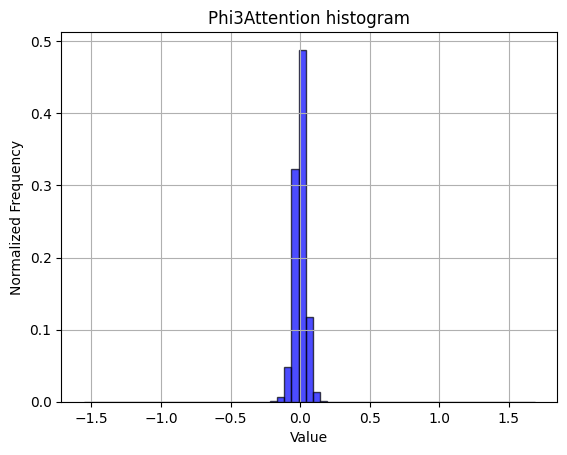

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 1.98682149e-08 0.00000000e+00
 1.98682149e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 9.93410746e-08
 1.19209290e-07 3.97364299e-08 1.19209290e-07 5.96046448e-08
 1.98682149e-07 2.98023224e-07 4.76837158e-07 6.15914663e-07
 9.13937887e-07 1.62919362e-06 2.34444936e-06 3.63588333e-06
 5.66244125e-06 1.21196111e-05 3.71138255e-05 4.07377879e-04
 5.87240855e-03 5.21416664e-02 2.08411137e-01 3.67658456e-01
 2.68663426e-01 8.37646325e-02 1.20368401e-02 8.80976518e-04
 6.33398692e-05 1.46230062e-05 6.91413879e-06 4.43061193e-06
 2.64247259e-06 1.78813934e-06 1.35103861e-06 5.76178233e-07
 4.56968943e-07 2.78155009e-07 1.98682149e-07 7.94728597e-08
 2.18550364e-07 9.93410746e-08 1.19209290e-07 1.98682149e-08
 9.93410746e-08 9.93410746e-08 0.00000000e+00 0.00000000e+00
 1

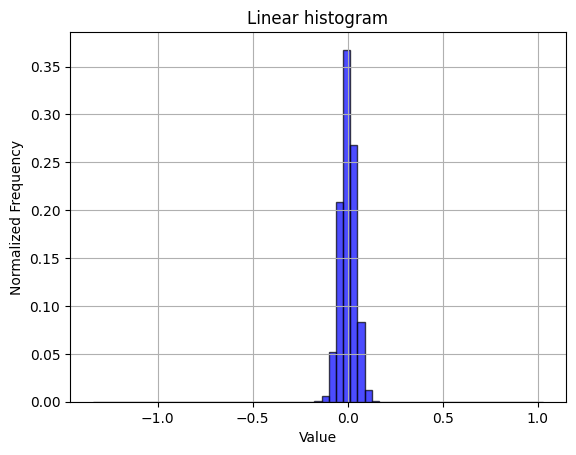

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.97364299e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19209290e-07 0.00000000e+00 7.94728597e-08
 0.00000000e+00 0.00000000e+00 3.97364299e-08 3.97364299e-08
 3.97364299e-08 3.97364299e-07 2.38418579e-07 3.17891439e-07
 1.03314718e-06 2.18550364e-06 6.47703807e-06 4.20967738e-04
 1.15141511e-01 7.23326127e-01 1.60224716e-01 8.62081846e-04
 8.46385956e-06 2.30471293e-06 7.94728597e-07 6.75519307e-07
 1.58945719e-07 1.98682149e-07 1.98682149e-07 3.97364299e-08
 1.58945719e-07 3.97364299e-08 7.94728597e-08 1.19209290e-07
 0.00000000e+00 7.94728597e-08 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

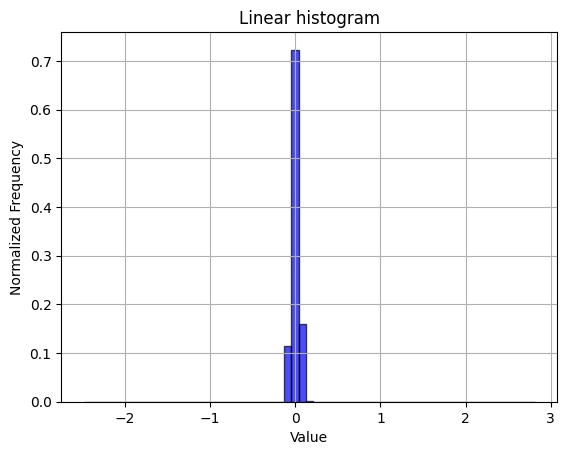

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 7.06425420e-08 3.53212710e-08 7.06425420e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.05963813e-07
 3.53212710e-08 1.41285084e-07 7.06425420e-08 0.00000000e+00
 1.76606355e-07 0.00000000e+00 2.47248897e-07 2.11

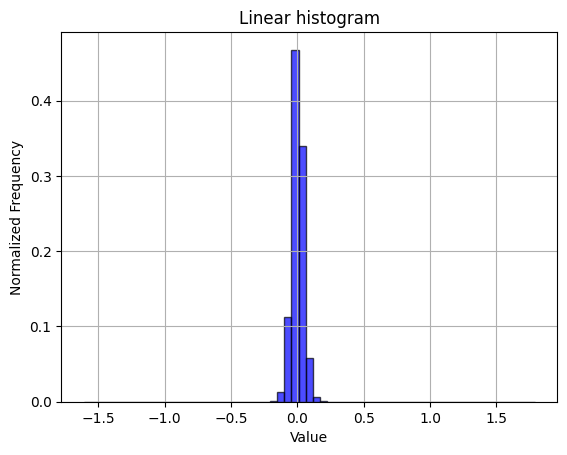

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.05963813e-07 1.05963813e-07
 1.05963813e-07 1.05963813e-07 0.00000000e+00 1.05963813e-07
 2.11927626e-07 3.17891439e-07 6.35782878e-07 7.41746691e-07
 6.35782878e-07 6.35782878e-07 5.29819065e-07 1.37752957e-06
 2.01331245e-06 2.64909532e-06 3.60276964e-06 5.93397352e-06
 9.21885173e-06 1.60005358e-05 5.93397352e-05 4.59671021e-04
 3.84097629e-03 2.29535633e-02 9.24171872e-02 2.20269627e-01
 3.03952429e-01 2.28086048e-01 9.79425642e-02 2.51641803e-02
 4.20347850e-03 4.94745043e-04 6.42140706e-05 1.65303548e-05
 8.26517741e-06 5.93397352e-06 5.08626302e-06 3.17891439e-06
 1.90734863e-06 1.16560194e-06 8.47710503e-07 8.47710503e-07
 1.16560194e-06 4.23855252e-07 3.17891439e-07 4.23855252e-07
 3.17891439e-07 0.00000000e+00 0.00000000e+00 2.11927626e-07
 1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

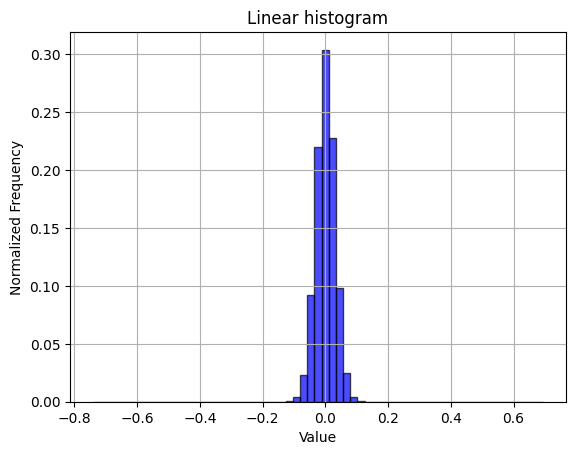

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[5.29819065e-08 5.29819065e-08 2.64909532e-08 5.29819065e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.94728597e-08
 2.64909532e-08 1.05963813e-07 5.29819065e-08 0.00000000e+00
 1.32454766e-07 0.00000000e+00 1.85436673e-07 1.58945719e-07
 1.58945719e-07 1.05963813e-07 1.05963813e-07 5.56310018e-07
 5.29819065e-07 8.47710503e-07 1.58945719e-06 3.36435106e-06
 1.30070580e-05 8.97248586e-05 9.69118542e-04 1.03695658e-02
 1.00385004e-01 4.89689165e-01 3.45117013e-01 4.80718613e-02
 4.78527281e-03 4.42769792e-04 4.43458557e-05 7.78834025e-06
 2.99347772e-06 1.29805671e-06 7.94728597e-07 3.97364299e-07
 3.44382392e-07 2.64909532e-07 7.94728597e-08 1.58945719e-07
 1.85436673e-07 1.05963813e-07 2.64909532e-08 1.05963813e-07
 7.94728597e-08 2.64909532e-08 2.64909532e

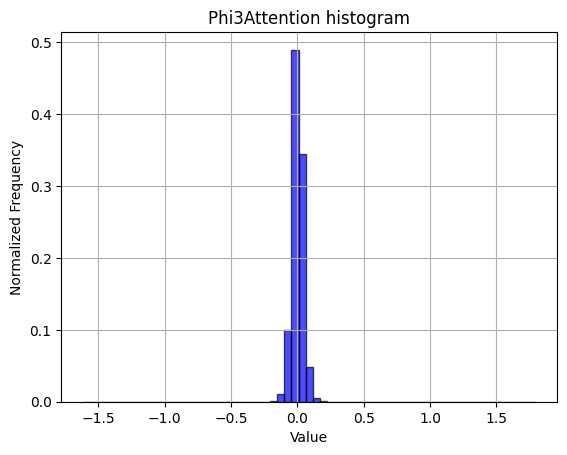

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 1.98682149e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 1.98682149e-08 1.98682149e-08 1.98682149e-08 1.98682149e-08
 1.98682149e-08 1.98682149e-08 3.97364299e-08 3.97364299e-08
 5.96046448e-08 5.96046448e-08 5.96046448e-08 2.18550364e-07
 1.98682149e-07 4.37100728e-07 8.54333242e-07 1.41064326e-06
 2.38418579e-06 5.64257304e-06 1.42653783e-05 4.82002894e-05
 2.43842602e-04 1.62933270e-03 9.32570299e-03 3.92495990e-02
 1.13898754e-01 2.15327303e-01 2.65438974e-01 2.06784844e-01
 1.03603780e-01 3.47761710e-02 8.05413723e-03 1.32604440e-03
 2.02536583e-04 4.19815381e-05 1.27752622e-05 4.74850337e-06
 2.16563543e-06 1.47024790e-06 7.35123952e-07 2.58286794e-07
 3.17891439e-07 1.58945719e-07 1.39077504e-07 3.97364299e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0

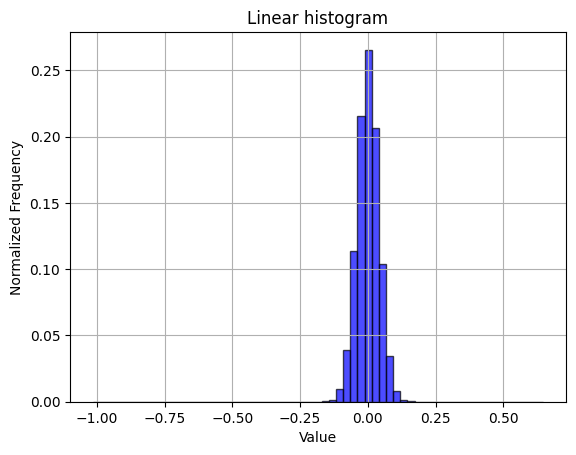

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 2.38418579e-07 1.19209290e-07 1.19209290e-07 2.38418579e-07
 3.57627869e-07 5.56310018e-07 9.53674316e-07 1.62919362e-06
 2.82128652e-06 6.31809235e-06 1.74840291e-05 3.61402829e-04
 9.04663404e-03 8.60005617e-02 3.06320628e-01 3.89778455e-01
 1.77249511e-01 2.93320815e-02 1.80268288e-03 5.92470169e-05
 7.58965810e-06 4.01337941e-06 2.54313151e-06 1.19209290e-06
 6.75519307e-07 6.75519307e-07 3.17891439e-07 7.94728597e-08
 1.19209290e-07 7.94728597e-08 1.58945719e-07 7.94728597e-08
 0.00000000e+00 3.97364299e-08 7.94728597e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.94728597e-08 0.00000000e+00
 0.

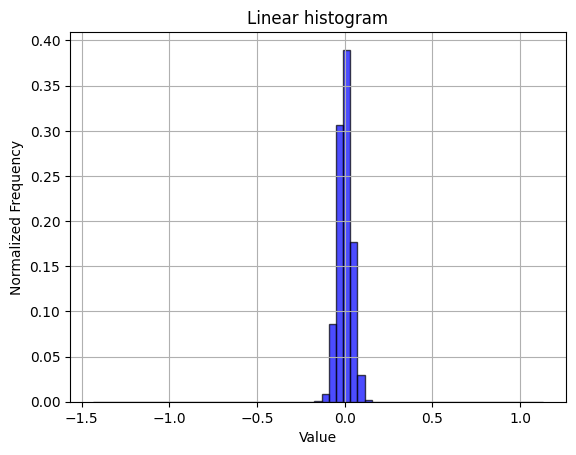

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 3.53212710e-08 3.53212710e-08
 0.00000000e+00 0.00000000e+00 1.05963813e-07 1.76606355e-07
 1.76606355e-07 1.05963813e-07 0.00000000e+00 3.53212710e-08
 1.76606355e-07 1.76606355e-07 1.76606355e-07 3.17

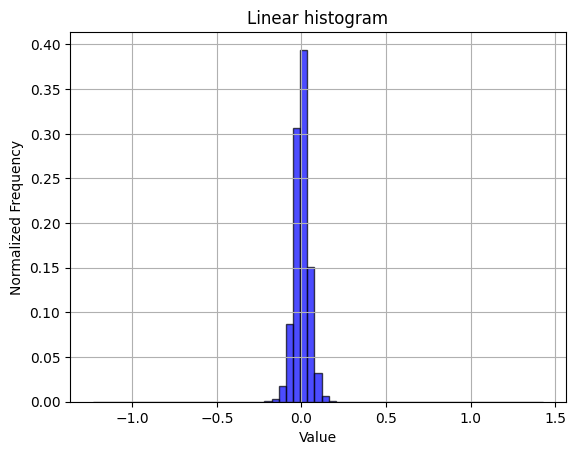

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 2.11927626e-07 1.05963813e-07 2.11927626e-07
 5.29819065e-07 5.29819065e-07 1.05963813e-07 2.11927626e-07
 4.23855252e-07 3.17891439e-07 2.11927626e-07 3.17891439e-07
 4.23855252e-07 8.47710503e-07 1.37752957e-06 1.80138482e-06
 9.53674316e-07 1.37752957e-06 2.43716770e-06 2.75505914e-06
 4.66240777e-06 7.20553928e-06 1.36693319e-05 2.56432427e-05
 1.31607056e-04 1.05836656e-03 6.71407912e-03 3.30509610e-02
 1.04548454e-01 2.17291726e-01 2.79588381e-01 2.15597577e-01
 1.02348328e-01 3.16056146e-02 6.78804186e-03 1.00284153e-03
 1.39554342e-04 2.76565552e-05 1.26096937e-05 6.56975640e-06
 4.34451633e-06 3.60276964e-06 2.33120388e-06 1.80138482e-06
 1.80138482e-06 1.37752957e-06 1.16560194e-06 8.47710503e-07
 6.35782878e-07 7.41746691e-07 5.29819065e-07 6.35782878e-07
 5.29819065e-07 0.00000000e+00 1.05963813e-07 3.17891439e-07
 1.05963813e-07 0.00000000e+00 1.05963813e-07 1.05963813e-07
 0.

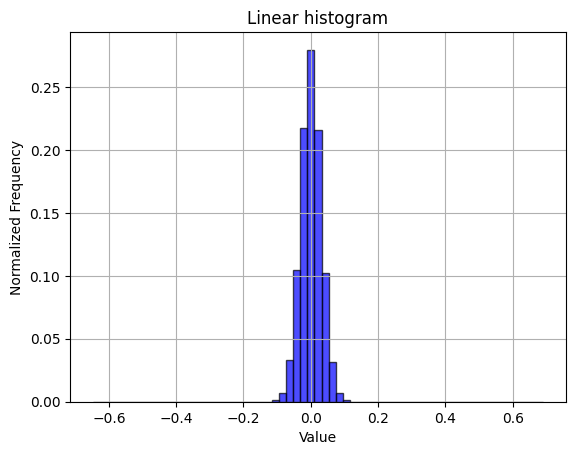

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 2.64909532e-08 2.64909532e-08
 0.00000000e+00 0.00000000e+00 7.94728597e-08 1.32454766e-07
 1.32454766e-07 7.94728597e-08 0.00000000e+00 2.64909532e-08
 1.32454766e-07 1.58945719e-07 2.11927626e-07 3.17891439e-07
 5.29819065e-07 2.91400486e-07 5.56310018e-07 6.88764784e-07
 1.50998433e-06 3.23189629e-06 1.05433994e-05 6.12205929e-05
 3.77734502e-04 2.34074063e-03 1.35701762e-02 7.66252412e-02
 3.16257821e-01 4.15874031e-01 1.43197113e-01 2.61358420e-02
 4.59278954e-03 7.97086292e-04 1.20454364e-04 2.09543440e-05
 4.34451633e-06 1.77489387e-06 1.05963813e-06 8.74201457e-07
 4.50346205e-07 2.64909532e-07 2.11927626e-07 1.85436673e-07
 1.85436673e-07 1.32454766e-07 1.05963813e-07 1.32454766e-07
 5.29819065e-08 2.64909532e-08 5.29819065e

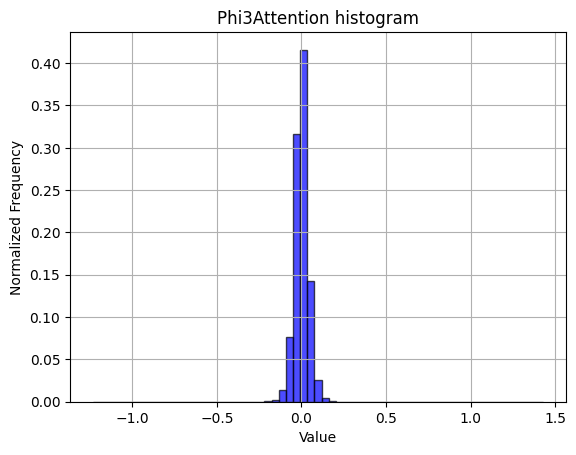

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 7.94728597e-08
 5.96046448e-08 7.94728597e-08 2.18550364e-07 5.76178233e-07
 1.31130219e-06 2.28484472e-06 9.04003779e-06 4.19020653e-05
 3.95377477e-04 4.20057774e-03 3.04220319e-02 1.29822155e-01
 2.85273770e-01 3.17156971e-01 1.74143891e-01 4.97132540e-02
 7.91194042e-03 8.07483991e-04 7.76449839e-05 1.29938126e-05
 3.17891439e-06 1.62919362e-06 5.96046448e-07 2.58286794e-07
 1.58945719e-07 1.19209290e-07 7.94728597e-08 1.19209290e-07
 3.97364299e-08 3.97364299e-08 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

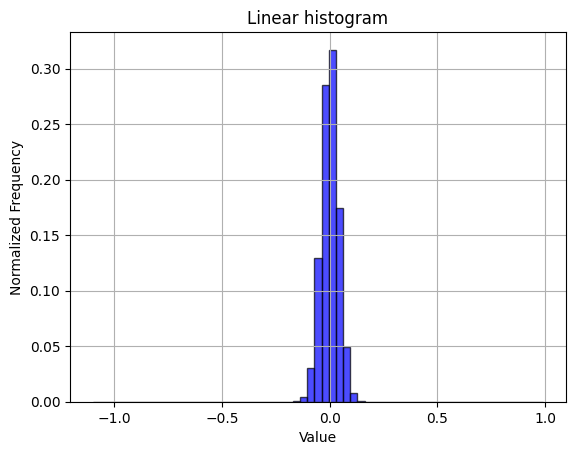

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[7.94728597e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 7.94728597e-08
 3.97364299e-08 3.97364299e-08 3.97364299e-08 0.00000000e+00
 1.19209290e-07 1.58945719e-07 2.38418579e-07 1.98682149e-07
 3.97364299e-07 3.97364299e-07 4.37100728e-07 1.03314718e-06
 9.13937887e-07 1.47024790e-06 2.86102295e-06 4.21206156e-06
 1.14043554e-05 6.46909078e-05 6.79532687e-04 5.76357047e-03
 3.22630008e-02 1.09293103e-01 2.27396091e-01 2.86215782e-01
 2.12000370e-01 9.50936476e-02 2.60477066e-02 4.59885597e-03
 4.92135684e-04 4.64518865e-05 8.98043315e-06 3.41733297e-06
 2.74181366e-06 1.50998433e-06 1.03314718e-06 8.34465027e-07
 5.16573588e-07 5.16573588e-07 1.58945719e-07 3.17891439e-07
 2.78155009e-07 1.19209290e-07 1.58945719e-07 7.94728597e-08
 0.00000000e+00 3.97364299e-08 3.97364299e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.

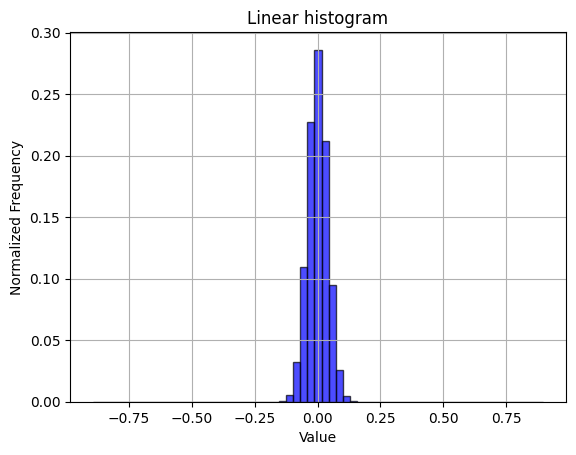

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.41285084e-07 3.53212710e-08
 7.06425420e-08 1.41285084e-07 7.06425420e-08 3.53212710e-08
 1.05963813e-07 0.00000000e+00 1.76606355e-07 3.53

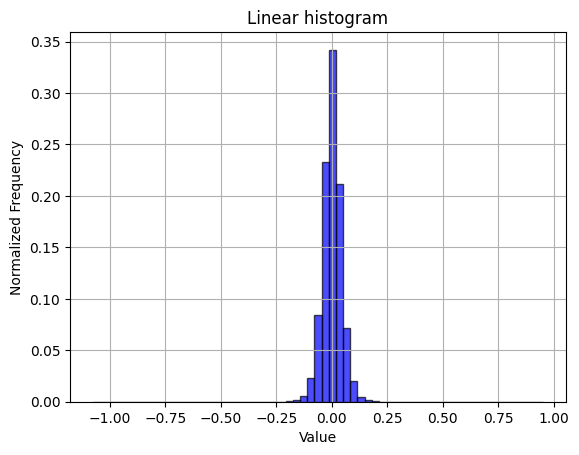

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[2.11927626e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.05963813e-07 1.05963813e-07 1.05963813e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.11927626e-07 2.11927626e-07
 2.11927626e-07 6.35782878e-07 2.11927626e-07 2.11927626e-07
 9.53674316e-07 7.41746691e-07 1.37752957e-06 2.22524007e-06
 2.22524007e-06 1.90734863e-06 3.70873345e-06 4.76837158e-06
 1.10202365e-05 2.08748711e-05 5.97635905e-05 3.70237562e-04
 2.07053290e-03 1.02151235e-02 3.67784500e-02 9.98428133e-02
 1.92438338e-01 2.50984404e-01 2.15481758e-01 1.23806847e-01
 4.92300457e-02 1.45661036e-02 3.36689419e-03 5.80257840e-04
 9.88642375e-05 2.43716770e-05 1.05963813e-05 6.35782878e-06
 4.23855252e-06 3.17891439e-06 2.43716770e-06 1.16560194e-06
 8.47710503e-07 6.35782878e-07 8.47710503e-07 8.47710503e-07
 5.29819065e-07 2.11927626e-07 3.17891439e-07 5.29819065e-07
 1.

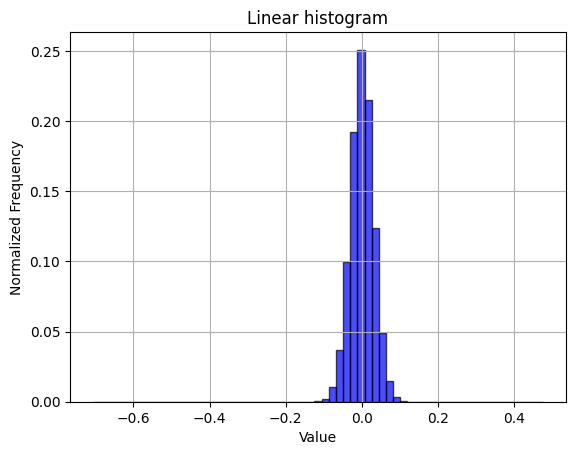

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.05963813e-07 2.64909532e-08
 5.29819065e-08 1.05963813e-07 5.29819065e-08 7.94728597e-08
 7.94728597e-08 0.00000000e+00 1.32454766e-07 2.64909532e-08
 1.32454766e-07 5.29819065e-08 1.05963813e-07 2.64909532e-07
 2.64909532e-07 8.74201457e-07 1.56296624e-06 3.09944153e-06
 7.39097595e-06 2.61465708e-05 7.67178006e-05 2.79267629e-04
 1.11627579e-03 4.51403194e-03 1.85919868e-02 7.72974491e-02
 2.37959146e-01 3.60629453e-01 2.13960754e-01 6.47703807e-02
 1.56781673e-02 3.80145179e-03 9.42760044e-04 2.41597493e-04
 6.45319621e-05 2.18550364e-05 6.86115689e-06 3.39084201e-06
 1.00665622e-06 6.09291924e-07 3.97364299e-07 2.38418579e-07
 3.44382392e-07 7.94728597e-08 2.64909532e

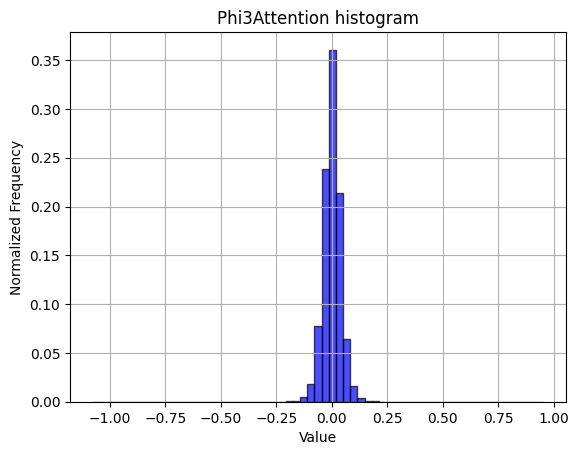

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[3.97364299e-08 1.98682149e-08 0.00000000e+00 1.98682149e-08
 3.97364299e-08 1.98682149e-08 0.00000000e+00 3.97364299e-08
 7.94728597e-08 3.97364299e-08 9.93410746e-08 9.93410746e-08
 2.98023224e-07 1.98682149e-07 3.97364299e-07 5.56310018e-07
 6.15914663e-07 1.76827113e-06 3.33786011e-06 6.89427058e-06
 2.07821528e-05 7.57177671e-05 3.45826149e-04 1.53680642e-03
 6.35498762e-03 2.09043622e-02 5.70580761e-02 1.20037436e-01
 1.87431077e-01 2.18648036e-01 1.86592519e-01 1.16662880e-01
 5.59106469e-02 2.05589533e-02 5.92291355e-03 1.49597724e-03
 3.21427981e-04 7.08500544e-05 2.14974085e-05 7.13268916e-06
 3.51667404e-06 1.90734863e-06 8.14596812e-07 4.76837158e-07
 3.37759654e-07 1.19209290e-07 1.39077504e-07 5.96046448e-08
 3.97364299e-08 3.97364299e-08 1.98682149e-08 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

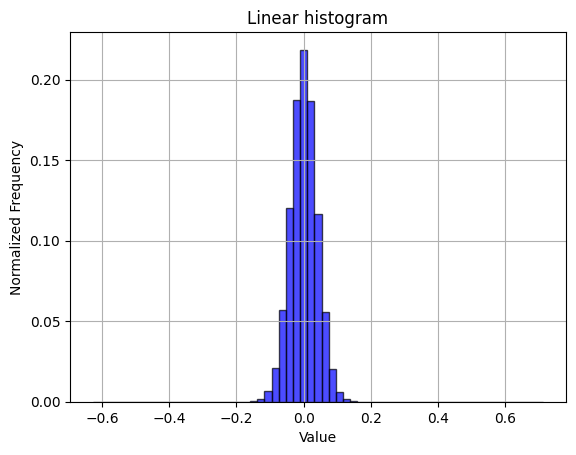

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.94728597e-08 7.94728597e-08 0.00000000e+00 2.38418579e-07
 2.38418579e-07 1.19209290e-07 1.58945719e-07 1.19209290e-07
 4.76837158e-07 5.96046448e-07 1.19209290e-06 9.53674316e-07
 1.94708506e-06 3.09944153e-06 6.00020091e-06 1.39077504e-05
 1.26361847e-04 2.17473507e-03 2.27206945e-02 1.18904630e-01
 2.97153473e-01 3.36819728e-01 1.74269636e-01 4.24052080e-02
 5.02451261e-03 3.32514445e-04 2.23716100e-05 6.63598378e-06
 3.41733297e-06 2.02655792e-06 1.66893005e-06 1.07288361e-06
 5.56310018e-07 2.38418579e-07 4.37100728e-07 1.19209290e-07
 1.98682149e-07 2.78155009e-07 7.94728597e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.

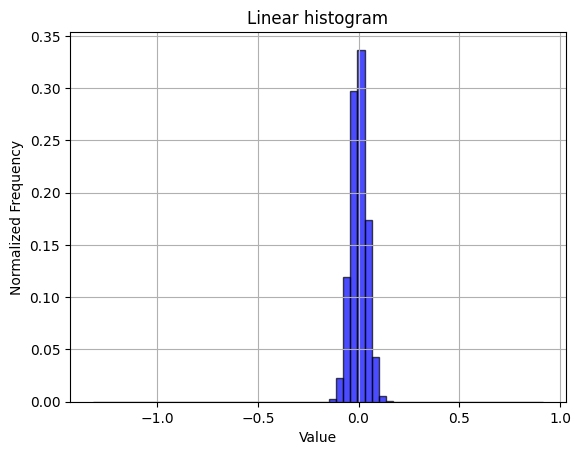

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 1.05963813e-07 3.53212710e-08 3.53212710e-08
 1.05963813e-07 7.06425420e-08 7.06425420e-08 3.53212710e-08
 1.05963813e-07 2.11927626e-07 1.05963813e-07 1.41285084e-07
 1.76606355e-07 3.17891439e-07 3.17891439e-07 8.83

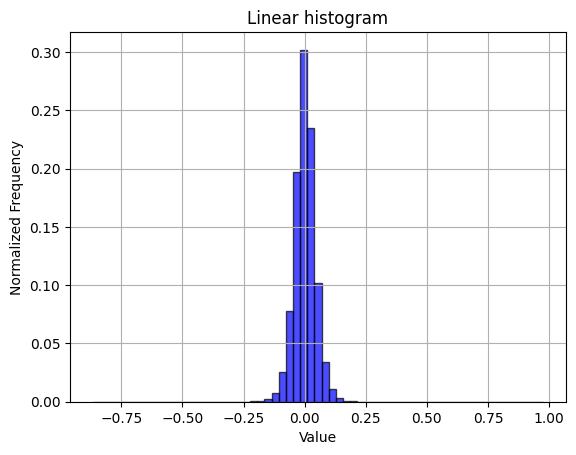

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[3.17891439e-07 2.11927626e-07 3.17891439e-07 4.23855252e-07
 1.05963813e-07 2.11927626e-07 4.23855252e-07 5.29819065e-07
 2.11927626e-07 4.23855252e-07 7.41746691e-07 6.35782878e-07
 1.58945719e-06 1.37752957e-06 1.37752957e-06 2.22524007e-06
 3.07295058e-06 4.13258870e-06 6.25186496e-06 6.99361165e-06
 1.10202365e-05 2.56432427e-05 9.00692410e-05 4.90612454e-04
 2.77551015e-03 1.24595430e-02 4.40548791e-02 1.13069534e-01
 2.01703389e-01 2.45356560e-01 2.02722126e-01 1.15458383e-01
 4.53477436e-02 1.28964318e-02 2.83866458e-03 5.07036845e-04
 9.56853231e-05 2.25702922e-05 1.17619832e-05 8.79499647e-06
 4.34451633e-06 3.81469727e-06 2.64909532e-06 1.80138482e-06
 1.80138482e-06 1.27156576e-06 1.05963813e-06 8.47710503e-07
 9.53674316e-07 4.23855252e-07 6.35782878e-07 6.35782878e-07
 6.35782878e-07 3.17891439e-07 2.11927626e-07 3.17891439e-07
 0.00000000e+00 4.23855252e-07 0.00000000e+00 1.05963813e-07
 0.

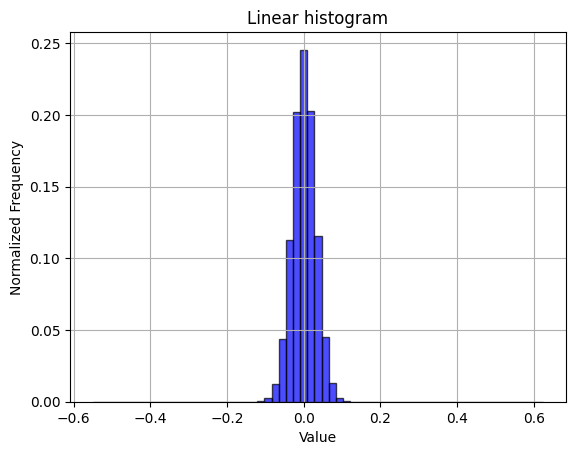

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 7.94728597e-08 2.64909532e-08 2.64909532e-08
 7.94728597e-08 5.29819065e-08 5.29819065e-08 2.64909532e-08
 7.94728597e-08 1.58945719e-07 1.05963813e-07 2.11927626e-07
 2.38418579e-07 3.44382392e-07 3.44382392e-07 9.00692410e-07
 6.88764784e-07 2.01331245e-06 3.60276964e-06 7.44395786e-06
 1.82787577e-05 5.19222683e-05 1.65462494e-04 5.46269947e-04
 1.83086925e-03 5.92732430e-03 2.02939245e-02 7.12873406e-02
 2.00639221e-01 3.19685035e-01 2.43074814e-01 9.62692897e-02
 2.84237332e-02 8.17608833e-03 2.50034862e-03 7.52793418e-04
 2.26020813e-04 7.01480442e-05 2.43716770e-05 9.85463460e-06
 4.23855252e-06 2.01331245e-06 1.05963813e-06 9.80165270e-07
 5.29819065e-07 3.70873345e-07 1.32454766e-07 1.58945719e-07
 2.64909532e-07 2.64909532e-08 1.58945719e

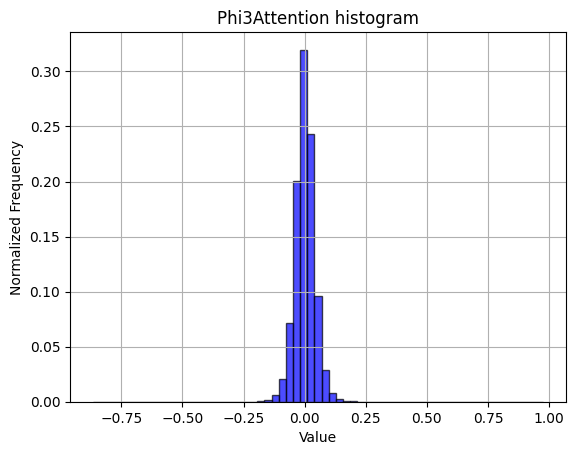

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 5.96046448e-08
 1.98682149e-08 1.98682149e-08 1.98682149e-08 3.97364299e-08
 7.94728597e-08 1.58945719e-07 1.78813934e-07 3.97364299e-07
 4.17232513e-07 1.25169754e-06 1.62919362e-06 3.83456548e-06
 7.82807668e-06 1.94311142e-05 5.75383504e-05 2.20855077e-04
 9.91920630e-04 3.95707289e-03 1.33882761e-02 3.96260023e-02
 8.89888406e-02 1.57041371e-01 2.09428370e-01 2.05051700e-01
 1.47784392e-01 8.21418365e-02 3.51120830e-02 1.16725961e-02
 3.41506799e-03 8.08358192e-04 1.92145507e-04 5.34256299e-05
 1.74045563e-05 7.56978989e-06 3.67561976e-06 1.68879827e-06
 9.13937887e-07 5.56310018e-07 4.56968943e-07 1.39077504e-07
 7.94728597e-08 1.19209290e-07 3.97364299e-08 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

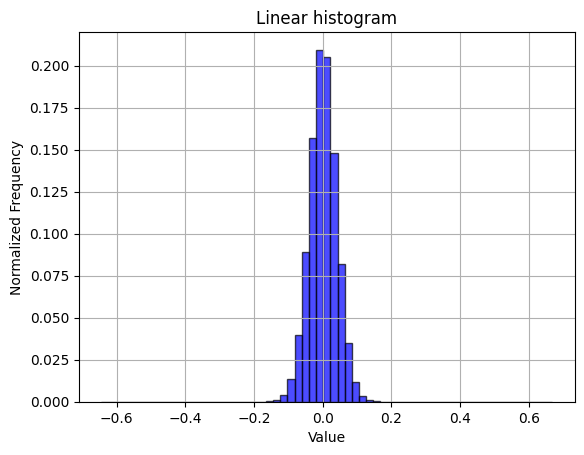

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 1.19209290e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.58945719e-07 1.19209290e-07 7.94728597e-08 7.94728597e-08
 1.19209290e-07 3.97364299e-08 3.17891439e-07 3.17891439e-07
 2.78155009e-07 8.74201457e-07 7.15255737e-07 1.62919362e-06
 2.70207723e-06 5.00679016e-06 9.77516174e-06 4.96705373e-05
 6.03755315e-04 5.66502412e-03 3.49704425e-02 1.28165126e-01
 2.63731281e-01 3.01157514e-01 1.86028759e-01 6.46423499e-02
 1.32349730e-02 1.56188011e-03 1.33593877e-04 1.74442927e-05
 5.80151876e-06 4.09285227e-06 2.02655792e-06 1.15235647e-06
 9.93410746e-07 3.57627869e-07 2.78155009e-07 2.38418579e-07
 2.78155009e-07 7.94728597e-08 3.97364299e-08 3.97364299e-08
 1.58945719e-07 3.97364299e-08 3.97364299e-08 0.00000000e+00
 0.00000000e+00 7.94728597e-08 3.97364299e-08 0.00000000e+00
 0.

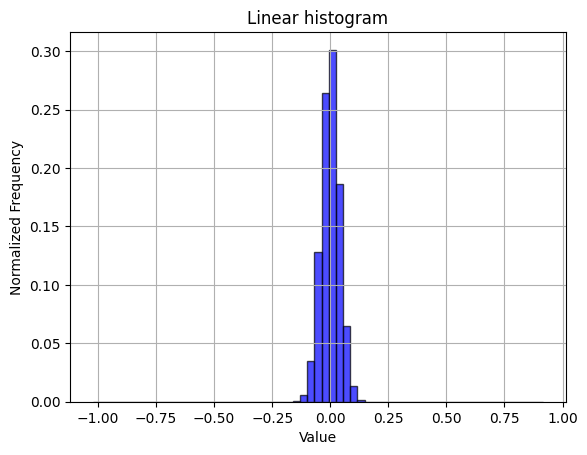

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[1.41285084e-07 0.00000000e+00 1.05963813e-07 0.00000000e+00
 1.41285084e-07 1.05963813e-07 7.06425420e-08 7.06425420e-08
 0.00000000e+00 1.05963813e-07 1.76606355e-07 7.06425420e-08
 1.76606355e-07 1.76606355e-07 3.53212710e-07 3.88

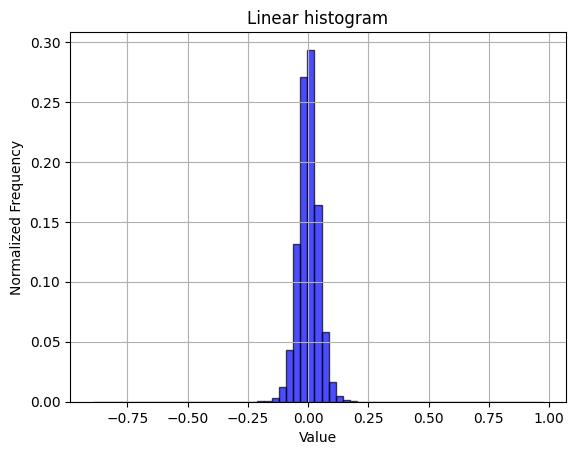

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.05963813e-07 0.00000000e+00 2.11927626e-07 1.05963813e-07
 6.35782878e-07 6.35782878e-07 1.05963813e-07 6.35782878e-07
 6.35782878e-07 5.29819065e-07 8.47710503e-07 9.53674316e-07
 9.53674316e-07 3.17891439e-06 4.45048014e-06 5.93397352e-06
 6.56975640e-06 1.17619832e-05 2.05569797e-05 6.16709391e-05
 3.84542677e-04 2.44564480e-03 1.26848221e-02 4.79601754e-02
 1.28907839e-01 2.28410933e-01 2.60846668e-01 1.90771209e-01
 9.02462006e-02 2.89182663e-02 6.85691833e-03 1.18923187e-03
 1.73250834e-04 3.63455878e-05 1.36693319e-05 9.00692410e-06
 6.14590115e-06 4.66240777e-06 3.70873345e-06 2.01331245e-06
 2.01331245e-06 1.48349338e-06 7.41746691e-07 1.05963813e-06
 3.17891439e-07 2.11927626e-07 2.11927626e-07 5.29819065e-07
 3.17891439e-07 3.17891439e-07 2.11927626e-07 3.17891439e-07
 2.

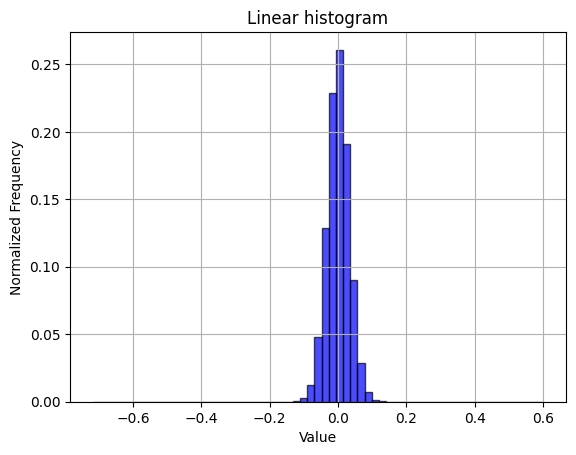

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[1.05963813e-07 0.00000000e+00 7.94728597e-08 0.00000000e+00
 1.05963813e-07 1.05963813e-07 5.29819065e-08 5.29819065e-08
 0.00000000e+00 7.94728597e-08 1.32454766e-07 7.94728597e-08
 1.32454766e-07 2.11927626e-07 4.23855252e-07 4.50346205e-07
 7.68237644e-07 1.19209290e-06 2.06629435e-06 4.66240777e-06
 9.35130649e-06 2.73916456e-05 7.70356920e-05 2.29676565e-04
 7.49270121e-04 2.54326397e-03 9.57126088e-03 3.81863382e-02
 1.28290494e-01 2.80515538e-01 3.06107124e-01 1.63266685e-01
 5.24201658e-02 1.31487317e-02 3.39841843e-03 9.75370407e-04
 3.16672855e-04 9.84933641e-05 3.38024563e-05 1.17090013e-05
 5.53660923e-06 2.33120388e-06 1.37752957e-06 9.80165270e-07
 5.56310018e-07 2.64909532e-07 2.64909532e-07 2.11927626e-07
 7.94728597e-08 1.85436673e-07 1.58945719e

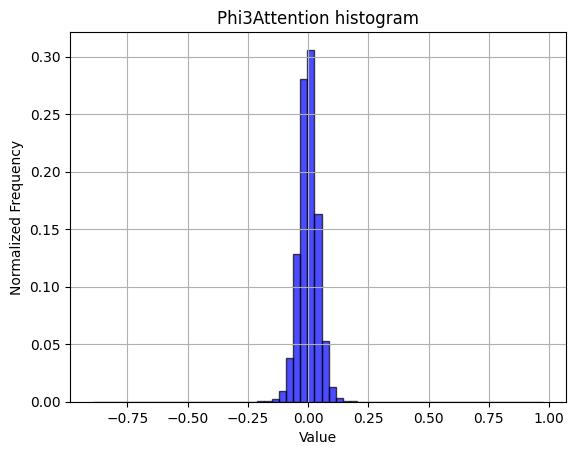

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 1.98682149e-08 0.00000000e+00 1.98682149e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.98682149e-08
 0.00000000e+00 3.97364299e-08 1.39077504e-07 1.19209290e-07
 1.39077504e-07 2.58286794e-07 2.78155009e-07 7.35123952e-07
 1.39077504e-06 2.78155009e-06 5.62270482e-06 1.50402387e-05
 5.06639481e-05 2.51313051e-04 1.37388706e-03 6.74221913e-03
 2.67663399e-02 8.02492698e-02 1.67790790e-01 2.44098604e-01
 2.32828697e-01 1.48674488e-01 6.48898482e-02 2.00586915e-02
 4.96902068e-03 9.83893871e-04 1.81595484e-04 4.15643056e-05
 1.21196111e-05 5.06639481e-06 2.40405401e-06 1.19209290e-06
 6.75519307e-07 3.57627869e-07 2.38418579e-07 1.19209290e-07
 9.93410746e-08 7.94728597e-08 3.97364299e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0

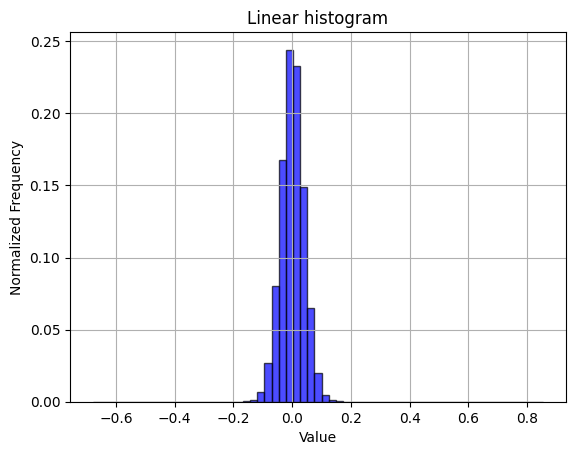

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.19209290e-07 1.19209290e-07
 7.94728597e-08 1.19209290e-07 3.57627869e-07 1.58945719e-07
 2.38418579e-07 4.37100728e-07 3.57627869e-07 4.76837158e-07
 8.34465027e-07 8.74201457e-07 2.70207723e-06 4.21206156e-06
 7.47044881e-06 2.12987264e-05 1.83224678e-04 2.16285388e-03
 1.73571905e-02 8.11468760e-02 2.18502323e-01 3.15465132e-01
 2.40576466e-01 9.82708136e-02 2.29096810e-02 3.06646029e-03
 2.69373258e-04 2.96831131e-05 8.46385956e-06 4.41074371e-06
 2.22524007e-06 1.74840291e-06 6.75519307e-07 6.35782878e-07
 3.97364299e-07 2.78155009e-07 2.38418579e-07 1.58945719e-07
 3.57627869e-07 3.97364299e-08 1.19209290e-07 3.97364299e-08
 3.97364299e-08 7.94728597e-08 0.00000000e+00 0.00000000e+00
 0.

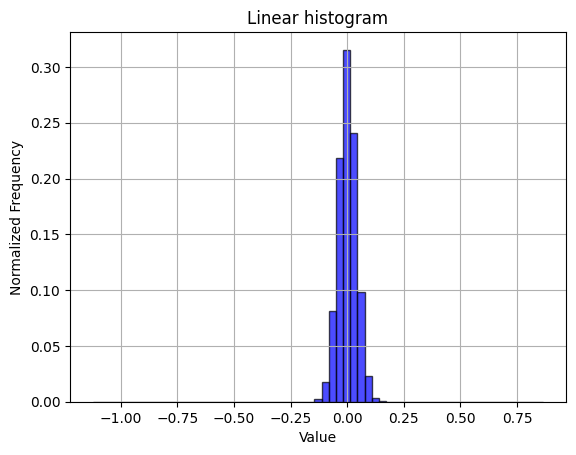

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 3.53212710e-08 7.06425420e-08 3.53212710e-08
 1.05963813e-07 3.53212710e-08 3.53212710e-08 1.76606355e-07
 3.53212710e-08 1.41285084e-07 0.00000000e+00 2.47248897e-07
 4.23855252e-07 2.47248897e-07 8.83031774e-07 1.27

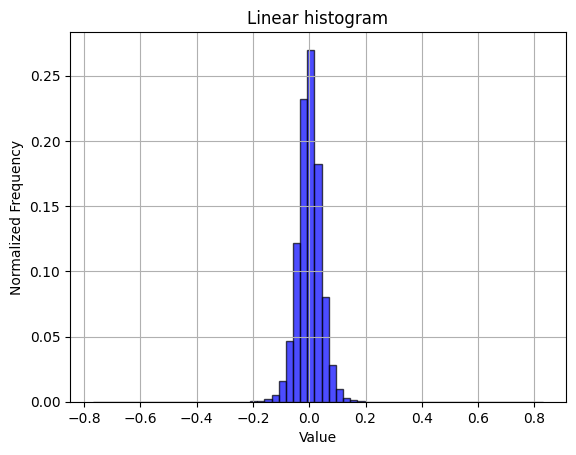

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 1.05963813e-07 0.00000000e+00
 1.05963813e-07 1.05963813e-07 2.11927626e-07 1.05963813e-07
 0.00000000e+00 2.11927626e-07 3.17891439e-07 1.05963813e-07
 0.00000000e+00 0.00000000e+00 2.11927626e-07 4.23855252e-07
 6.35782878e-07 9.53674316e-07 7.41746691e-07 7.41746691e-07
 1.05963813e-06 1.27156576e-06 1.80138482e-06 3.07295058e-06
 2.96698676e-06 5.61608209e-06 8.79499647e-06 2.11927626e-05
 1.30017598e-04 7.51209259e-03 1.92170461e-01 6.00514942e-01
 1.91925685e-01 7.52660963e-03 1.20586819e-04 1.92854140e-05
 8.90096029e-06 4.66240777e-06 2.75505914e-06 2.43716770e-06
 2.54313151e-06 1.69542101e-06 5.29819065e-07 1.58945719e-06
 5.29819065e-07 8.47710503e-07 6.35782878e-07 2.11927626e-07
 3.17891439e-07 2.11927626e-07 2.11927626e-07 3.17891439e-07
 3.17891439e-07 3.17891439e-07 0.00000000e+00 0.00000000e+00
 2.11927626e-07 1.05963813e-07 0.00000000e+00 0.00000000e+00
 0.

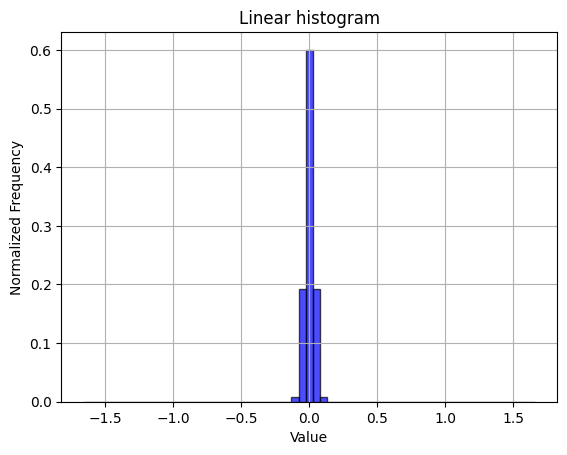

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 2.64909532e-08 0.00000000e+00
 2.64909532e-08 2.64909532e-08 5.29819065e-08 2.64909532e-08
 0.00000000e+00 5.29819065e-08 7.94728597e-08 2.64909532e-08
 0.00000000e+00 0.00000000e+00 5.29819065e-08 1.05963813e-07
 2.11927626e-07 2.91400486e-07 2.38418579e-07 2.91400486e-07
 4.50346205e-07 4.23855252e-07 8.21219550e-07 1.66893005e-06
 2.83453200e-06 8.68903266e-06 3.32461463e-05 2.12113063e-04
 2.01718012e-03 2.12858518e-02 2.04504755e-01 5.43900543e-01
 2.04485469e-01 2.12718646e-02 2.01426612e-03 2.09967295e-04
 3.27428182e-05 7.65588548e-06 2.83453200e-06 1.40402052e-06
 8.74201457e-07 6.09291924e-07 2.91400486e-07 5.82800971e-07
 2.11927626e-07 2.64909532e-07 2.38418579e-07 7.94728597e-08
 7.94728597e-08 5.29819065e-08 5.29819065e

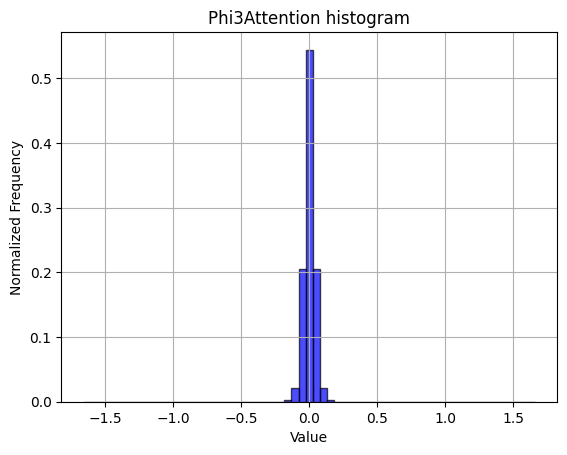

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 3.97364299e-08
 5.96046448e-08 0.00000000e+00 1.98682149e-08 5.96046448e-08
 3.97364299e-08 9.93410746e-08 1.98682149e-07 1.39077504e-07
 4.76837158e-07 9.13937887e-07 2.68220901e-06 8.54333242e-06
 4.94321187e-05 5.41031361e-04 6.16290172e-03 4.68002160e-02
 1.94173177e-01 3.60088309e-01 2.79510597e-01 9.50737198e-02
 1.58752998e-02 1.55039628e-03 1.37229760e-04 1.73449516e-05
 4.19219335e-06 1.37090683e-06 6.55651093e-07 2.58286794e-07
 1.39077504e-07 7.94728597e-08 3.97364299e-08 1.19209290e-07
 3.97364299e-08 1.98682149e-08 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1

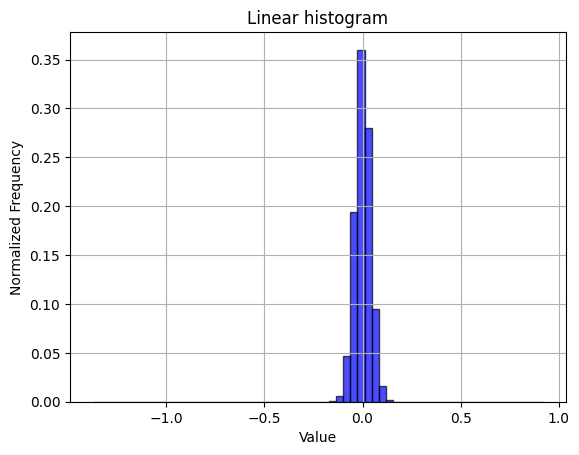

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.94728597e-08 3.97364299e-08 3.97364299e-08
 7.94728597e-08 1.19209290e-07 1.58945719e-07 4.37100728e-07
 6.35782878e-07 8.34465027e-07 2.22524007e-06 8.54333242e-06
 1.47819519e-04 2.50415405e-02 4.26869869e-01 5.06073236e-01
 4.15528218e-02 2.87175179e-04 8.78175100e-06 3.05970510e-06
 1.23182933e-06 5.96046448e-07 1.98682149e-07 1.58945719e-07
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

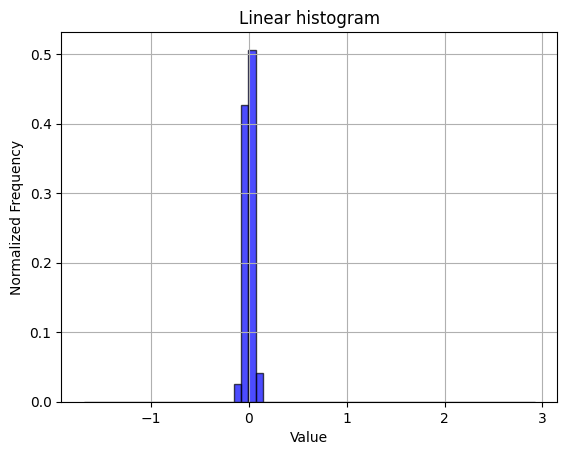

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 1.41285084e-07 1.05963813e-07 3.53212710e-08
 1.05963813e-07 1.05963813e-07 3.53212710e-08 7.06425420e-08
 0.00000000e+00 1.41285084e-07 1.41285084e-07 7.06425420e-08
 1.76606355e-07 2.47248897e-07 1.76606355e-07 5.29

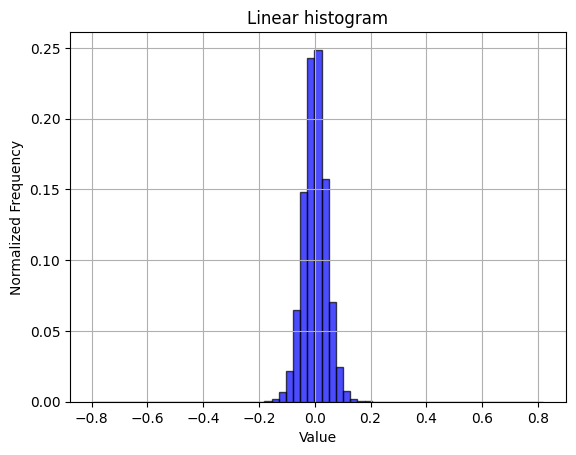

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 1.05963813e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.05963813e-07 3.17891439e-07
 3.17891439e-07 1.05963813e-07 4.23855252e-07 4.23855252e-07
 4.23855252e-07 6.35782878e-07 3.17891439e-07 5.29819065e-07
 8.47710503e-07 1.90734863e-06 2.22524007e-06 4.13258870e-06
 4.66240777e-06 8.37114122e-06 1.86496311e-05 5.94456991e-05
 3.53283352e-04 2.50795152e-03 1.30464766e-02 5.17589781e-02
 1.34361903e-01 2.32009994e-01 2.59406726e-01 1.85530239e-01
 8.69634416e-02 2.68395742e-02 5.96237183e-03 9.55263774e-04
 1.35103861e-04 3.12593248e-05 1.10202365e-05 5.82800971e-06
 5.61608209e-06 2.43716770e-06 2.01331245e-06 1.69542101e-06
 1.37752957e-06 7.41746691e-07 6.35782878e-07 2.11927626e-07
 5.29819065e-07 2.11927626e-07 2.11927626e-07 0.00000000e+00
 0.00000000e+00 3.17891439e-07 1.05963813e-07 0.00000000e+00
 0.00000000e+00 1.05963813e-07 0.00000000e+00 1.05963813e-07
 0.

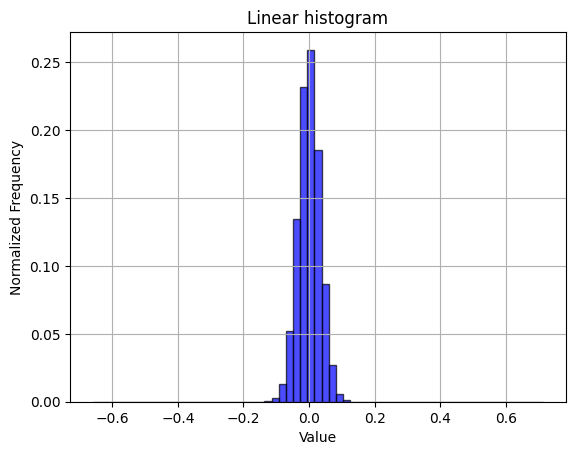

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 1.05963813e-07 7.94728597e-08 2.64909532e-08
 7.94728597e-08 1.05963813e-07 2.64909532e-08 7.94728597e-08
 0.00000000e+00 1.05963813e-07 1.05963813e-07 1.58945719e-07
 2.11927626e-07 2.38418579e-07 2.38418579e-07 5.03328111e-07
 9.00692410e-07 1.16560194e-06 1.98682149e-06 3.07295058e-06
 5.69555495e-06 1.42786238e-05 3.76436445e-05 1.17990706e-04
 4.54929140e-04 1.55777401e-03 5.48338890e-03 1.85286734e-02
 6.03066021e-02 1.48836825e-01 2.52430969e-01 2.58777380e-01
 1.58454922e-01 6.55647119e-02 2.07588673e-02 6.25080532e-03
 1.71375275e-03 4.83830770e-04 1.41885546e-04 4.01073032e-05
 1.41726600e-05 6.06642829e-06 3.57627869e-06 1.85436673e-06
 1.29805671e-06 9.53674316e-07 2.64909532e-07 2.11927626e-07
 2.38418579e-07 1.85436673e-07 2.64909532e

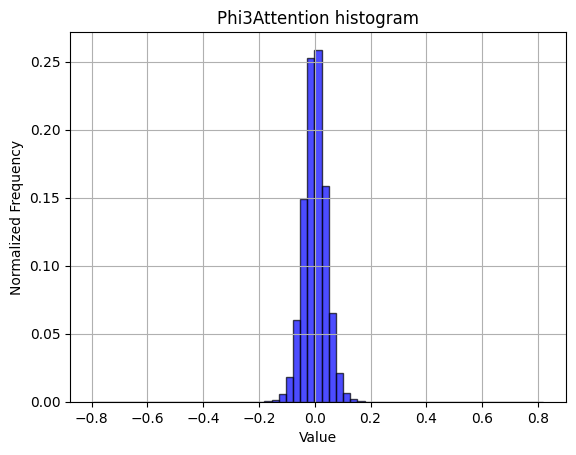

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 1.98682149e-08 3.97364299e-08 1.98682149e-08 1.98682149e-08
 1.98682149e-08 5.96046448e-08 0.00000000e+00 1.78813934e-07
 2.78155009e-07 3.97364299e-07 8.74201457e-07 2.12589900e-06
 3.49680583e-06 8.82148743e-06 2.56299973e-05 1.25984351e-04
 1.02957090e-03 8.18336010e-03 4.77270484e-02 1.70108279e-01
 3.17950070e-01 2.87993968e-01 1.30119065e-01 3.12627157e-02
 4.76314624e-03 5.81125418e-04 7.95722008e-05 1.96099281e-05
 8.04662704e-06 3.11930974e-06 1.70866648e-06 7.94728597e-07
 2.58286794e-07 1.98682149e-07 1.58945719e-07 0.00000000e+00
 3.97364299e-08 3.97364299e-08 1.98682149e-08 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

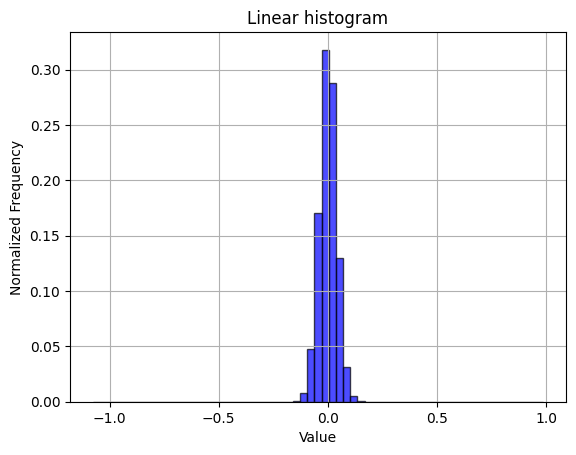

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 7.94728597e-08 0.00000000e+00 3.97364299e-08
 7.94728597e-08 3.97364299e-08 1.19209290e-07 4.37100728e-07
 5.56310018e-07 9.53674316e-07 2.34444936e-06 4.96705373e-06
 2.06629435e-05 6.29663467e-04 2.13782787e-02 2.11146951e-01
 4.87862547e-01 2.49077320e-01 2.88509528e-02 9.83874003e-04
 2.86499659e-05 5.76178233e-06 2.58286794e-06 1.39077504e-06
 6.35782878e-07 2.78155009e-07 1.98682149e-07 2.78155009e-07
 0.00000000e+00 3.97364299e-08 7.94728597e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

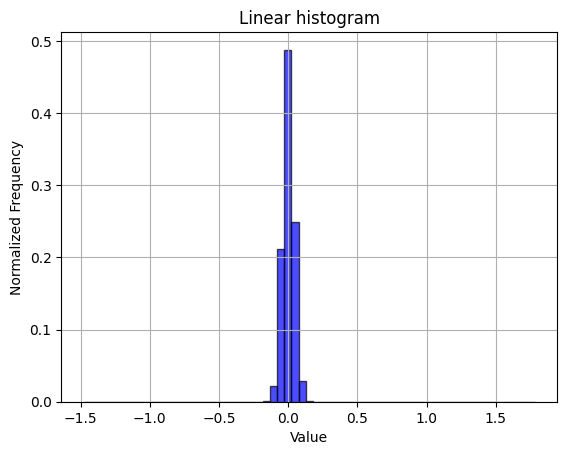

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 0.00000000e+00 0.00000000e+00 3.53212710e-08
 1.76606355e-07 1.05963813e-07 0.00000000e+00 1.05963813e-07
 7.06425420e-08 3.53212710e-08 1.76606355e-07 2.47248897e-07
 3.53212710e-08 2.11927626e-07 2.47248897e-07 8.47

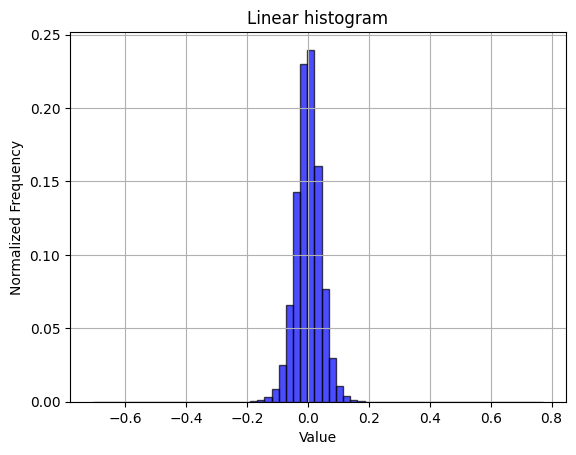

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.05963813e-07 0.00000000e+00
 0.00000000e+00 2.11927626e-07 1.05963813e-07 0.00000000e+00
 0.00000000e+00 1.05963813e-07 2.11927626e-07 1.05963813e-07
 5.29819065e-07 5.29819065e-07 8.47710503e-07 8.47710503e-07
 1.05963813e-06 2.22524007e-06 2.64909532e-06 3.92066108e-06
 4.34451633e-06 6.03993734e-06 9.85463460e-06 2.57492065e-05
 1.34044223e-04 1.03187561e-03 6.54506683e-03 2.90683111e-02
 9.40862232e-02 1.97122256e-01 2.66960250e-01 2.26522552e-01
 1.22348150e-01 4.36654621e-02 1.02648205e-02 1.86369154e-03
 2.49120924e-04 3.97364299e-05 1.43051147e-05 7.41746691e-06
 5.61608209e-06 3.17891439e-06 2.33120388e-06 9.53674316e-07
 1.05963813e-06 6.35782878e-07 3.17891439e-07 4.23855252e-07
 4.23855252e-07 3.17891439e-07 1.05963813e-07 2.11927626e-07
 6.35782878e-07 2.11927626e-07 1.05963813e-07 1.05963813e-07
 4.

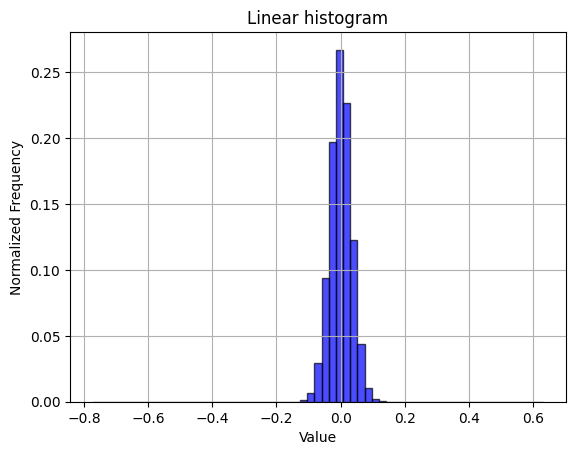

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 2.64909532e-08 2.64909532e-08
 0.00000000e+00 2.64909532e-08 5.29819065e-08 1.05963813e-07
 1.32454766e-07 7.94728597e-08 5.29819065e-08 5.29819065e-08
 1.85436673e-07 2.11927626e-07 1.32454766e-07 2.64909532e-07
 4.23855252e-07 9.00692410e-07 1.21858385e-06 2.49014960e-06
 3.81469727e-06 8.90096029e-06 2.67558628e-05 9.73012712e-05
 3.29785877e-04 1.10287137e-03 3.67712975e-03 1.17363930e-02
 3.78654533e-02 1.03586541e-01 2.06742022e-01 2.69465897e-01
 2.06908332e-01 1.03525586e-01 3.75046200e-02 1.21738381e-02
 3.64679760e-03 1.10475222e-03 3.39878930e-04 9.85463460e-05
 2.89016300e-05 9.35130649e-06 4.10609775e-06 2.14576721e-06
 9.53674316e-07 6.88764784e-07 5.82800971e-07 4.23855252e-07
 1.32454766e-07 1.32454766e-07 1.85436673e

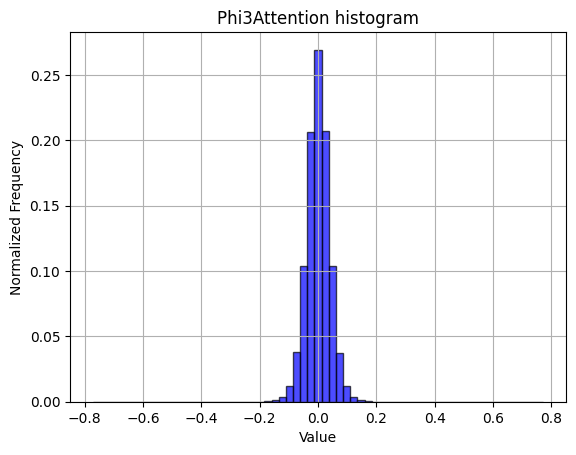

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 1.98682149e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 5.96046448e-08 1.98682149e-08 1.98682149e-08 0.00000000e+00
 9.93410746e-08 2.58286794e-07 3.77496084e-07 4.56968943e-07
 1.21196111e-06 2.44379044e-06 3.37759654e-06 7.05321630e-06
 1.56958898e-05 4.05907631e-05 1.33395195e-04 6.03278478e-04
 2.99791495e-03 1.27477646e-02 4.23649947e-02 1.07965370e-01
 1.97044293e-01 2.45351394e-01 2.05852747e-01 1.17609560e-01
 4.81643279e-02 1.46353443e-02 3.48605712e-03 7.28348891e-04
 1.65661176e-04 4.27563985e-05 1.71860059e-05 8.56320063e-06
 4.54982122e-06 2.12589900e-06 1.15235647e-06 6.15914663e-07
 3.77496084e-07 2.58286794e-07 7.94728597e-08 3.97364299e-08
 3.97364299e-08 1.98682149e-08 1.98682149e-08 1.98682149e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

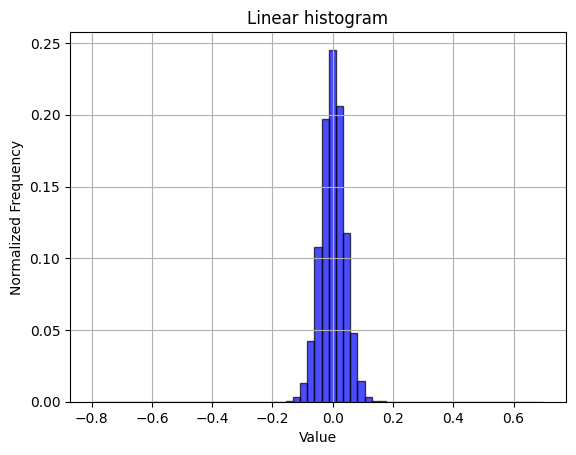

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 3.97364299e-08
 7.94728597e-08 0.00000000e+00 0.00000000e+00 7.94728597e-08
 1.58945719e-07 1.58945719e-07 1.19209290e-07 3.57627869e-07
 2.78155009e-07 3.97364299e-07 3.97364299e-07 8.34465027e-07
 1.11262004e-06 1.35103861e-06 3.17891439e-06 4.49021657e-06
 1.19606654e-05 6.23861949e-05 4.85340754e-04 3.50252787e-03
 1.89860662e-02 7.04890490e-02 1.68993354e-01 2.59364883e-01
 2.50270446e-01 1.51259502e-01 5.87400198e-02 1.46990220e-02
 2.68495083e-03 3.66648038e-04 4.78029251e-05 1.05698903e-05
 4.41074371e-06 2.90075938e-06 1.74840291e-06 1.23182933e-06
 4.76837158e-07 3.57627869e-07 3.17891439e-07 3.97364299e-07
 7.94728597e-08 1.19209290e-07 1.19209290e-07 7.94728597e-08
 3.97364299e-08 3.97364299e-08 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

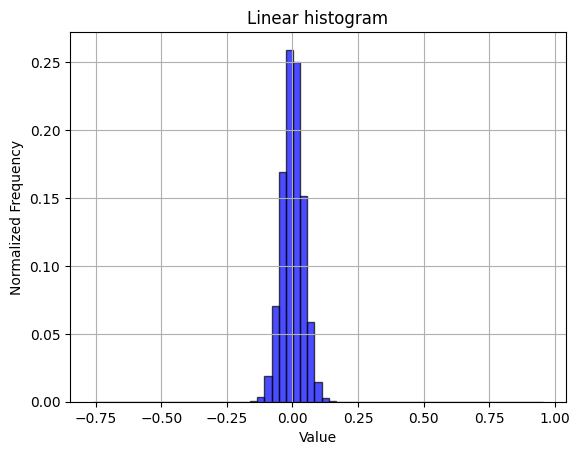

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 3.53212710e-08 3.53212710e-08 0.00000000e+00
 1.05963813e-07 7.06425420e-08 7.06425420e-08 7.06425420e-08
 1.76606355e-07 1.76606355e-07 1.41285084e-07 1.41285084e-07
 1.76606355e-07 3.17891439e-07 3.53212710e-07 9.53

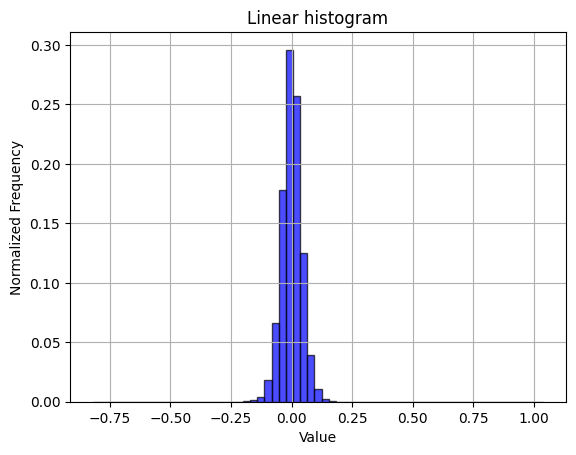

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[2.11927626e-07 0.00000000e+00 0.00000000e+00 1.05963813e-07
 1.05963813e-07 2.11927626e-07 1.05963813e-07 3.17891439e-07
 2.11927626e-07 0.00000000e+00 1.05963813e-07 3.17891439e-07
 9.53674316e-07 5.29819065e-07 1.16560194e-06 1.48349338e-06
 2.11927626e-06 2.33120388e-06 3.92066108e-06 5.08626302e-06
 7.20553928e-06 1.15500556e-05 2.25702922e-05 9.33541192e-05
 5.73688083e-04 3.04275089e-03 1.36719810e-02 4.58372964e-02
 1.11426247e-01 1.96753820e-01 2.39035606e-01 2.01896562e-01
 1.17953089e-01 5.03921509e-02 1.48620605e-02 3.58019935e-03
 6.47226969e-04 1.10944112e-04 2.67028809e-05 1.16560194e-05
 5.08626302e-06 5.08626302e-06 3.17891439e-06 3.17891439e-06
 1.80138482e-06 1.05963813e-06 7.41746691e-07 4.23855252e-07
 6.35782878e-07 3.17891439e-07 5.29819065e-07 4.23855252e-07
 0.00000000e+00 3.17891439e-07 2.11927626e-07 4.23855252e-07
 0.00000000e+00 2.11927626e-07 1.05963813e-07 2.11927626e-07
 0.

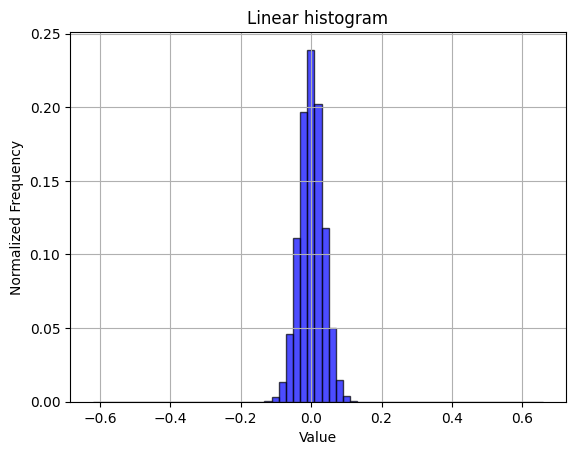

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 2.64909532e-08 2.64909532e-08 0.00000000e+00
 7.94728597e-08 5.29819065e-08 7.94728597e-08 7.94728597e-08
 1.58945719e-07 1.58945719e-07 1.58945719e-07 2.11927626e-07
 1.85436673e-07 2.64909532e-07 3.44382392e-07 9.53674316e-07
 1.11262004e-06 2.91400486e-06 5.66906399e-06 1.26891666e-05
 4.15907966e-05 1.73144870e-04 8.15576977e-04 3.44970491e-03
 1.57648987e-02 6.24016391e-02 1.78867949e-01 3.04833253e-01
 2.63395786e-01 1.23440425e-01 3.58107090e-02 8.53649775e-03
 1.87373161e-03 4.25259272e-04 1.00480186e-04 2.57492065e-05
 9.53674316e-06 3.60276964e-06 1.56296624e-06 1.11262004e-06
 5.29819065e-07 4.50346205e-07 2.38418579e-07 2.91400486e-07
 2.11927626e-07 1.32454766e-07 1.05963813e-07 1.05963813e-07
 1.58945719e-07 1.05963813e-07 7.94728597e

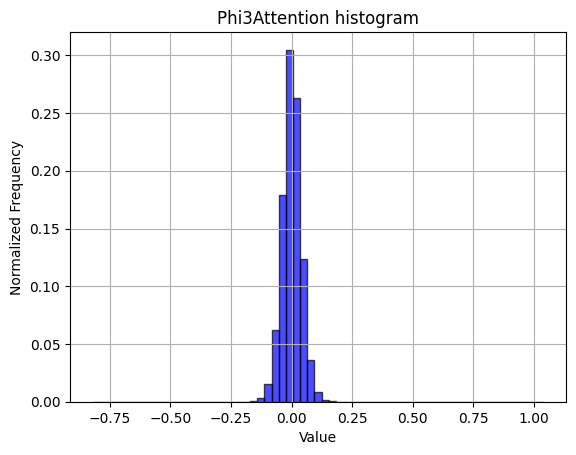

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 1.98682149e-08
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 5.96046448e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 1.98682149e-08 5.96046448e-08 1.98682149e-08 9.93410746e-08
 7.94728597e-08 9.93410746e-08 1.19209290e-07 2.18550364e-07
 4.76837158e-07 9.13937887e-07 1.33117040e-06 3.91403834e-06
 7.68899918e-06 2.44577726e-05 8.54134560e-05 3.27527523e-04
 1.48244699e-03 5.80332677e-03 1.96201007e-02 5.35086791e-02
 1.14106834e-01 1.87689622e-01 2.21774101e-01 1.90079351e-01
 1.19934638e-01 5.58960636e-02 2.11657484e-02 6.34368261e-03
 1.62408749e-03 3.82979711e-04 9.27249591e-05 2.63849894e-05
 9.00030136e-06 3.47693761e-06 1.86761220e-06 9.93410746e-07
 5.16573588e-07 2.58286794e-07 1.78813934e-07 1.19209290e-07
 1.98682149e-08 5.96046448e-08 7.94728597e-08 0.00000000e+00
 1

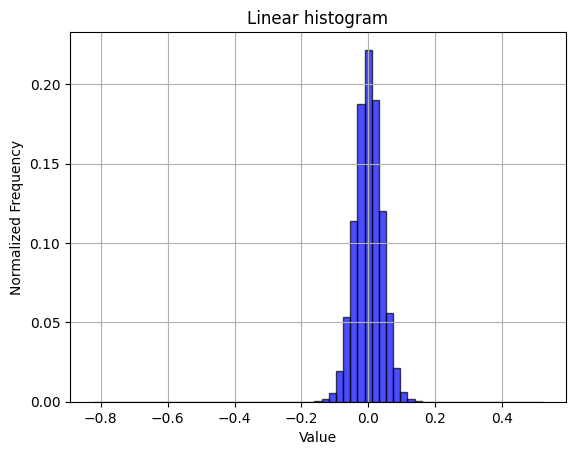

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[7.94728597e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.94728597e-08 3.97364299e-08 3.97364299e-08 3.97364299e-08
 1.19209290e-07 0.00000000e+00 7.94728597e-08 7.94728597e-08
 3.17891439e-07 2.38418579e-07 4.37100728e-07 2.78155009e-07
 8.34465027e-07 1.31130219e-06 1.66893005e-06 3.01996867e-06
 5.96046448e-06 2.18947728e-05 1.47144000e-04 1.18700663e-03
 7.85028934e-03 3.64605188e-02 1.13476634e-01 2.24202434e-01
 2.75011222e-01 2.07496007e-01 9.77993409e-02 2.94027328e-02
 5.92108568e-03 8.76426697e-04 1.03354454e-04 1.61727269e-05
 4.72863515e-06 2.82128652e-06 1.70866648e-06 9.13937887e-07
 5.96046448e-07 5.56310018e-07 5.56310018e-07 7.94728597e-08
 3.17891439e-07 2.38418579e-07 3.97364299e-08 1.19209290e-07
 3.97364299e-08 3.97364299e-08 7.94728597e-08 3.97364299e-08
 7.94728597e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

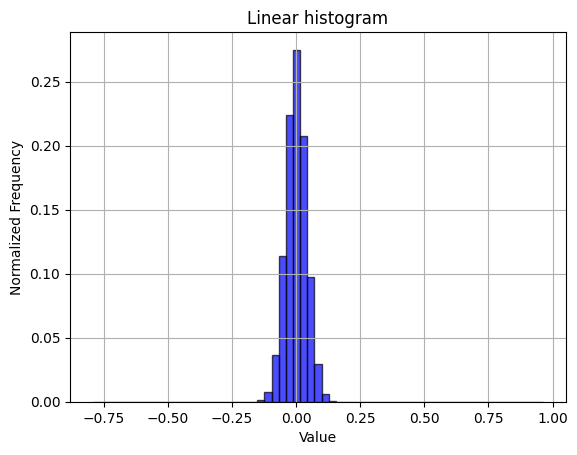

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.53212710e-08 3.53212710e-08
 0.00000000e+00 3.53212710e-08 0.00000000e+00 7.06425420e-08
 2.47248897e-07 1.05963813e-07 7.06425420e-08 3.17

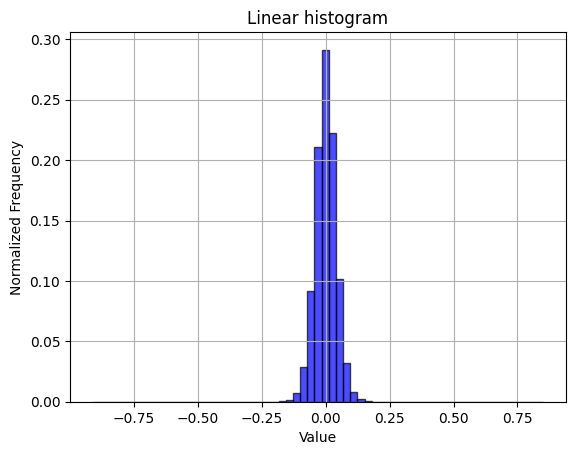

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[2.11927626e-07 2.11927626e-07 2.11927626e-07 1.05963813e-07
 3.17891439e-07 6.35782878e-07 4.23855252e-07 8.47710503e-07
 8.47710503e-07 6.35782878e-07 7.41746691e-07 1.05963813e-06
 1.48349338e-06 2.33120388e-06 3.28487820e-06 4.34451633e-06
 6.88764784e-06 9.64270698e-06 1.96033054e-05 6.14590115e-05
 2.70525614e-04 1.11548106e-03 4.30679321e-03 1.33387248e-02
 3.59563828e-02 7.65697691e-02 1.32454554e-01 1.79677116e-01
 1.93262842e-01 1.62656360e-01 1.07228597e-01 5.67253961e-02
 2.46435801e-02 8.33437178e-03 2.49671936e-03 6.12894694e-04
 1.48137410e-04 3.77231174e-05 1.52587891e-05 7.73535834e-06
 6.99361165e-06 4.66240777e-06 2.86102295e-06 2.43716770e-06
 2.54313151e-06 1.48349338e-06 7.41746691e-07 5.29819065e-07
 1.16560194e-06 8.47710503e-07 5.29819065e-07 3.17891439e-07
 2.11927626e-07 1.05963813e-07 0.00000000e+00 0.00000000e+00
 1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.

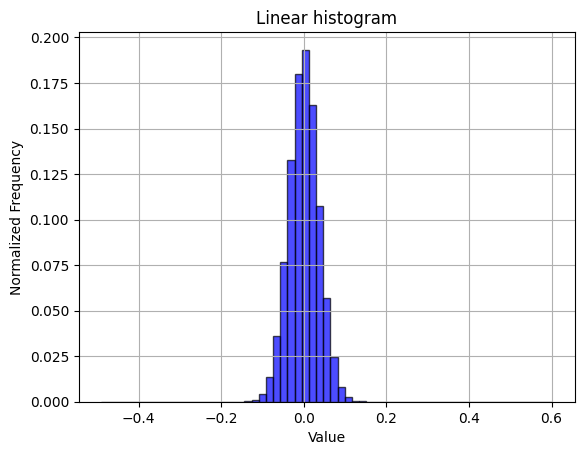

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.64909532e-08 2.64909532e-08
 0.00000000e+00 2.64909532e-08 0.00000000e+00 5.29819065e-08
 1.85436673e-07 7.94728597e-08 5.29819065e-08 3.17891439e-07
 3.44382392e-07 3.17891439e-07 5.82800971e-07 8.47710503e-07
 1.16560194e-06 1.80138482e-06 3.23189629e-06 5.85450066e-06
 1.64508820e-05 6.03463915e-05 2.78419918e-04 1.29522218e-03
 6.13183445e-03 2.70329316e-02 9.06488366e-02 2.13681910e-01
 2.95543671e-01 2.25300497e-01 1.00754473e-01 3.01259359e-02
 7.14026557e-03 1.56357553e-03 3.04910872e-04 7.04924266e-05
 1.82522668e-05 6.64922926e-06 3.78820631e-06 2.19874912e-06
 1.53647529e-06 1.05963813e-06 5.03328111e-07 3.97364299e-07
 1.05963813e-07 7.94728597e-08 2.64909532e

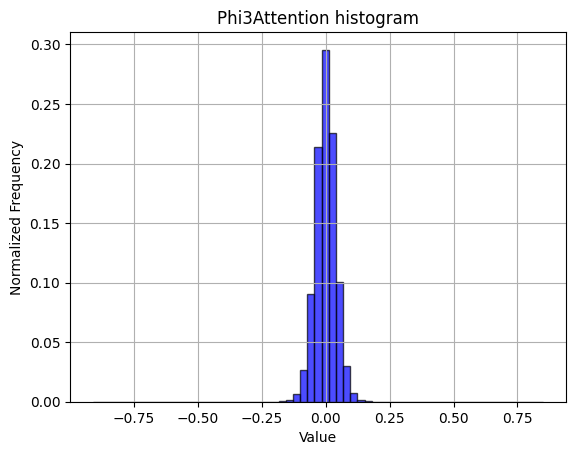

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 5.96046448e-08
 1.98682149e-08 1.19209290e-07 1.39077504e-07 3.37759654e-07
 1.33117040e-06 2.88089116e-06 8.68240992e-06 3.00804774e-05
 2.00728575e-04 2.35195955e-03 2.31277943e-02 1.24830127e-01
 3.22330316e-01 3.42203259e-01 1.51339134e-01 2.98829873e-02
 3.34374110e-03 2.95301278e-04 3.65773837e-05 9.27845637e-06
 3.11930974e-06 1.11262004e-06 4.37100728e-07 2.58286794e-07
 3.97364299e-08 3.97364299e-08 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

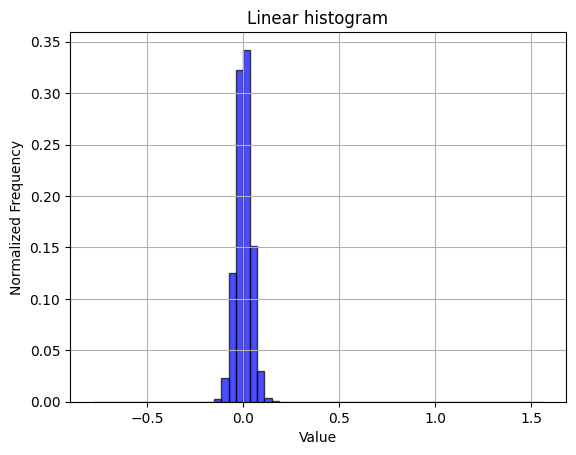

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 2.78155009e-07 1.58945719e-07 1.58945719e-07 1.19209290e-07
 1.58945719e-07 1.98682149e-07 3.17891439e-07 9.53674316e-07
 1.58945719e-06 2.50339508e-06 5.20547231e-06 2.64644623e-05
 2.74658203e-04 2.39062309e-03 1.54675643e-02 6.40568336e-02
 1.68559313e-01 2.71425446e-01 2.60291974e-01 1.50420467e-01
 5.30988375e-02 1.19961103e-02 1.74872080e-03 1.98324521e-04
 2.34444936e-05 3.49680583e-06 2.22524007e-06 1.43051147e-06
 5.16573588e-07 3.97364299e-07 1.58945719e-07 1.58945719e-07
 1.58945719e-07 2.78155009e-07 3.97364299e-08 7.94728597e-08
 7.94728597e-08 0.00000000e+00 1.19209290e-07 7.94728597e-08
 3.97364299e-08 7.94728597e-08 0.00000000e+00 0.00000000e+00
 3.

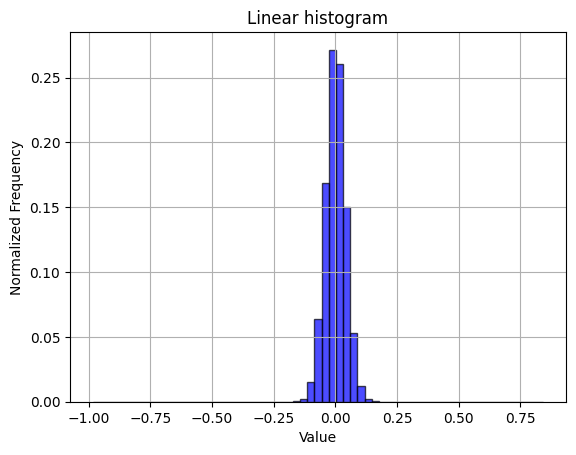

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 3.53212710e-08
 0.00000000e+00 0.00000000e+00 3.53212710e-08 0.00000000e+00
 1.05963813e-07 3.53212710e-08 1.05963813e-07 1.05963813e-07
 1.41285084e-07 3.53212710e-08 1.05963813e-07 1.76

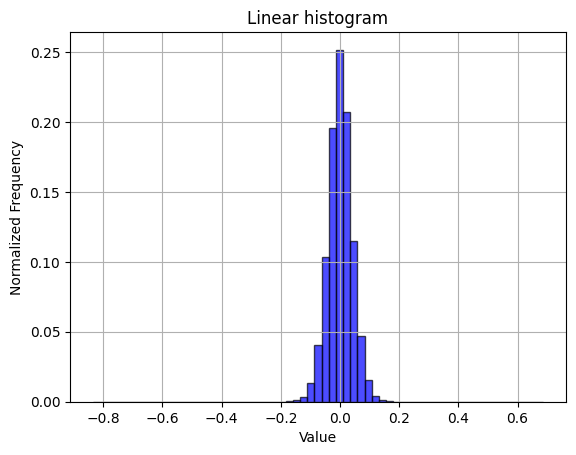

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 1.05963813e-07 1.05963813e-07
 0.00000000e+00 0.00000000e+00 1.05963813e-07 2.11927626e-07
 3.17891439e-07 1.05963813e-07 5.29819065e-07 3.17891439e-07
 5.29819065e-07 8.47710503e-07 1.27156576e-06 1.80138482e-06
 2.11927626e-06 3.28487820e-06 3.92066108e-06 4.76837158e-06
 7.41746691e-06 1.09142727e-05 1.97092692e-05 3.82529365e-05
 1.09354655e-04 3.87827555e-04 1.33037567e-03 4.82061174e-03
 1.50527954e-02 3.84472741e-02 8.37050544e-02 1.41121970e-01
 1.88203706e-01 1.94261975e-01 1.55875630e-01 9.90330378e-02
 4.82696957e-02 2.00068156e-02 6.61818186e-03 1.86602275e-03
 5.40415446e-04 1.40296088e-04 4.95910645e-05 2.10867988e-05
 1.18679470e-05 7.62939453e-06 5.51011827e-06 3.92066108e-06
 2.64909532e-06 3.17891439e-06 1.48349338e-06 1.48349338e-06
 5.29819065e-07 8.47710503e-07 6.35782878e-07 5.29819065e-07
 3.17891439e-07 2.11927626e-07 2.11927626e-07 2.11927626e-07
 1.

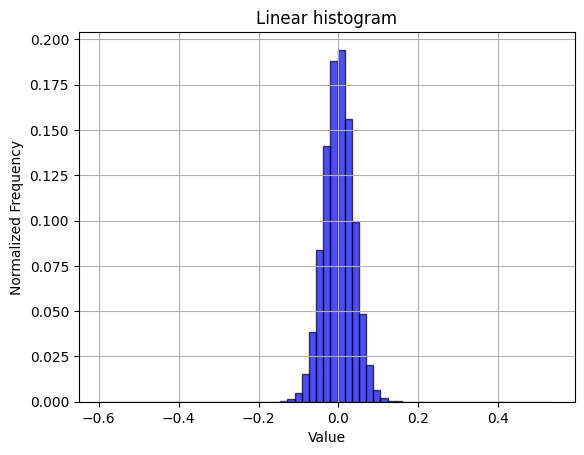

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 2.64909532e-08
 0.00000000e+00 0.00000000e+00 2.64909532e-08 0.00000000e+00
 7.94728597e-08 2.64909532e-08 1.05963813e-07 1.05963813e-07
 1.32454766e-07 2.64909532e-08 7.94728597e-08 2.11927626e-07
 1.58945719e-07 2.64909532e-07 4.50346205e-07 3.70873345e-07
 8.21219550e-07 1.43051147e-06 2.03980340e-06 3.78820631e-06
 7.25852119e-06 1.66363186e-05 5.50482008e-05 2.12219026e-04
 8.38862525e-04 3.13107173e-03 1.19467841e-02 3.88062000e-02
 1.02962626e-01 1.97757403e-01 2.54833433e-01 2.09549983e-01
 1.15224176e-01 4.52451971e-02 1.42731137e-02 3.79904111e-03
 9.76244609e-04 2.49041451e-04 6.65982564e-05 2.06364526e-05
 7.68237644e-06 3.70873345e-06 2.19874912e-06 1.40402052e-06
 8.21219550e-07 5.56310018e-07 3.44382392e

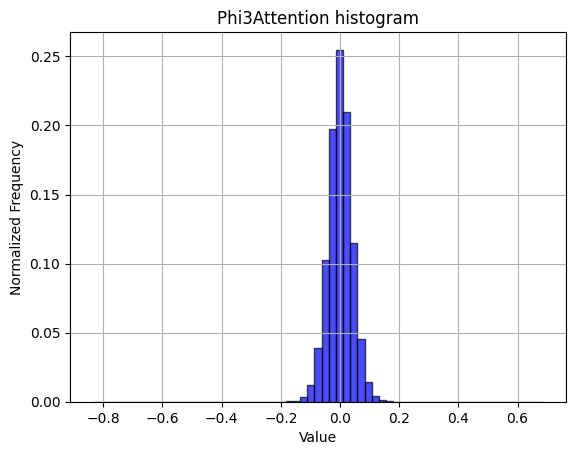

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 1.98682149e-08
 0.00000000e+00 1.98682149e-08 3.97364299e-08 0.00000000e+00
 7.94728597e-08 1.19209290e-07 2.98023224e-07 3.17891439e-07
 9.73542531e-07 1.64906184e-06 3.23851903e-06 7.96715418e-06
 2.05636024e-05 7.17242559e-05 3.43620777e-04 1.99961662e-03
 9.71915325e-03 3.92798384e-02 1.12262229e-01 2.16155608e-01
 2.67007867e-01 2.05586990e-01 1.03122155e-01 3.38795781e-02
 8.51255655e-03 1.64544582e-03 2.80797482e-04 6.31610552e-05
 1.90933545e-05 7.94728597e-06 3.83456548e-06 1.68879827e-06
 8.14596812e-07 4.17232513e-07 2.18550364e-07 7.94728597e-08
 5.96046448e-08 1.98682149e-08 3.97364299e-08 3.97364299e-08
 1.98682149e-08 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

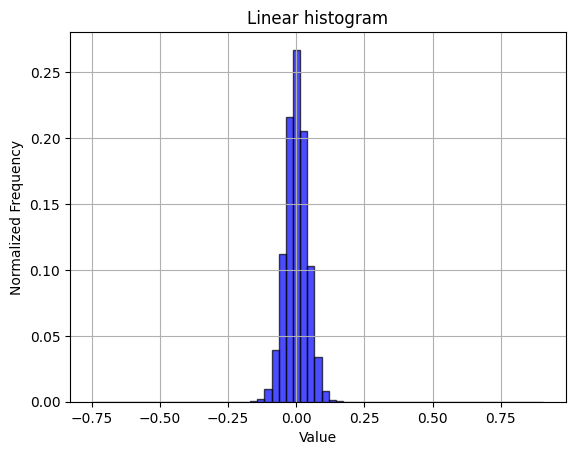

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.97364299e-08 3.97364299e-08 1.19209290e-07 3.97364299e-08
 3.97364299e-08 7.94728597e-08 7.94728597e-08 0.00000000e+00
 7.94728597e-08 1.19209290e-07 1.98682149e-07 3.97364299e-08
 3.97364299e-07 7.15255737e-07 6.75519307e-07 7.15255737e-07
 1.50998433e-06 2.94049581e-06 6.55651093e-06 3.49283218e-05
 3.92794609e-04 3.64307563e-03 2.34950781e-02 9.28591490e-02
 2.20554749e-01 2.99119115e-01 2.28165070e-01 1.01041476e-01
 2.60098775e-02 4.14888064e-03 4.63048617e-04 4.22795614e-05
 7.94728597e-06 3.29812368e-06 1.62919362e-06 7.15255737e-07
 3.57627869e-07 7.15255737e-07 3.97364299e-07 1.19209290e-07
 1.19209290e-07 7.94728597e-08 1.19209290e-07 1.19209290e-07
 3.97364299e-08 7.94728597e-08 0.00000000e+00 3.97364299e-08
 3.97364299e-08 0.00000000e+00 7.94728597e-08 3.97364299e-08
 3.

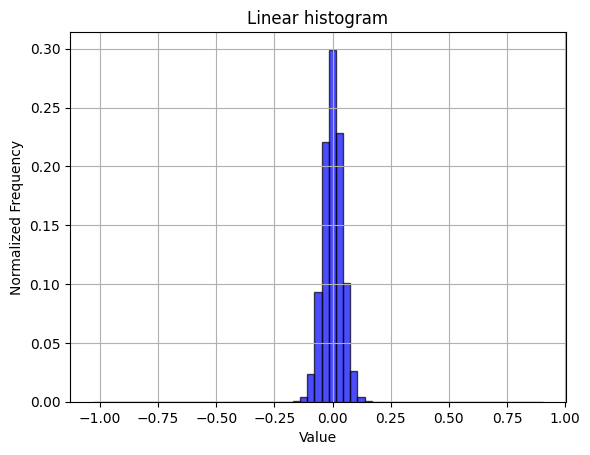

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 7.06425420e-08 3.53212710e-08 3.53212710e-08
 3.53212710e-08 0.00000000e+00 7.06425420e-08 0.00000000e+00
 7.06425420e-08 1.41285084e-07 0.00000000e+00 0.00000000e+00
 2.47248897e-07 1.76606355e-07 3.88533981e-07 2.82

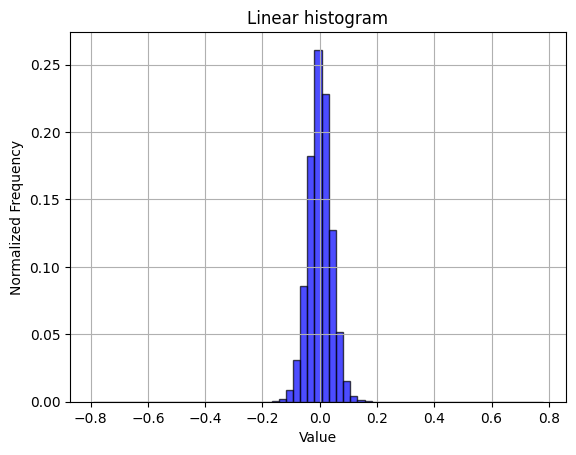

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 1.05963813e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.05963813e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.17891439e-07
 4.23855252e-07 6.35782878e-07 5.29819065e-07 5.29819065e-07
 6.35782878e-07 1.37752957e-06 1.80138482e-06 2.54313151e-06
 3.70873345e-06 4.23855252e-06 7.84132216e-06 1.04904175e-05
 1.98152330e-05 7.57641262e-05 3.66634793e-04 1.81717343e-03
 8.09372796e-03 2.81084908e-02 7.51992332e-02 1.48448520e-01
 2.10844782e-01 2.19686720e-01 1.65673574e-01 9.03462304e-02
 3.67685954e-02 1.11561881e-02 2.66424815e-03 5.24626838e-04
 1.01513333e-04 2.91400486e-05 1.28216214e-05 7.52343072e-06
 5.61608209e-06 3.81469727e-06 1.80138482e-06 2.11927626e-06
 1.37752957e-06 1.69542101e-06 3.17891439e-07 1.05963813e-06
 3.17891439e-07 2.11927626e-07 1.05963813e-07 3.17891439e-07
 2.11927626e-07 1.05963813e-07 0.00000000e+00 1.05963813e-07
 0.

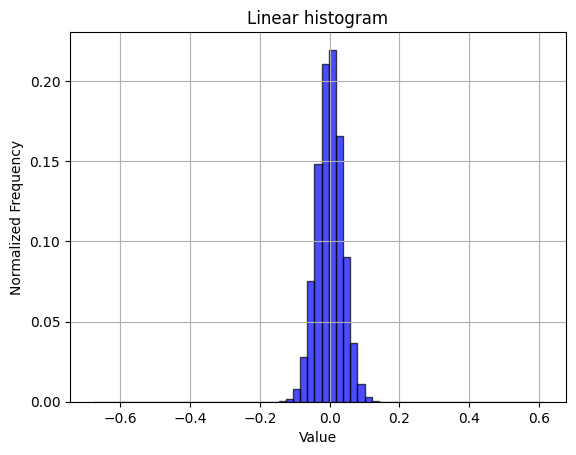

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[5.29819065e-08 5.29819065e-08 2.64909532e-08 2.64909532e-08
 5.29819065e-08 0.00000000e+00 5.29819065e-08 2.64909532e-08
 5.29819065e-08 1.05963813e-07 2.64909532e-08 0.00000000e+00
 1.85436673e-07 1.32454766e-07 4.50346205e-07 3.97364299e-07
 3.70873345e-07 4.23855252e-07 9.27183363e-07 1.56296624e-06
 2.30471293e-06 4.07960680e-06 1.04904175e-05 2.80274285e-05
 9.99768575e-05 4.31670083e-04 1.80416637e-03 7.57726034e-03
 2.93287436e-02 8.54868624e-02 1.84219148e-01 2.62925333e-01
 2.30448431e-01 1.28327211e-01 5.01994027e-02 1.44295957e-02
 3.55471505e-03 8.43657388e-04 1.92006429e-04 5.09156121e-05
 1.60270267e-05 5.93397352e-06 3.39084201e-06 1.66893005e-06
 1.32454766e-06 7.68237644e-07 5.29819065e-07 3.17891439e-07
 2.11927626e-07 2.11927626e-07 7.94728597e

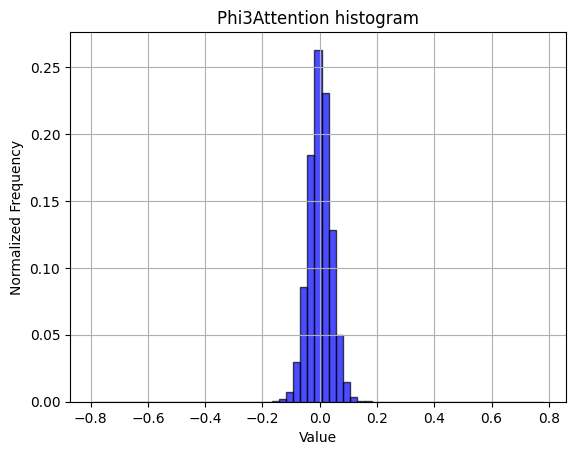

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 5.96046448e-08 1.98682149e-08 1.98682149e-08
 1.98682149e-08 1.98682149e-08 0.00000000e+00 1.58945719e-07
 1.39077504e-07 2.98023224e-07 6.55651093e-07 1.84774399e-06
 3.05970510e-06 8.24530919e-06 2.07821528e-05 6.82870547e-05
 3.02433968e-04 1.69847409e-03 8.45986605e-03 3.28073303e-02
 9.88606811e-02 1.97572410e-01 2.60553698e-01 2.19711185e-01
 1.20000601e-01 4.50233817e-02 1.17509166e-02 2.53768762e-03
 4.81347243e-04 9.29633776e-05 2.59478887e-05 1.00731850e-05
 3.67561976e-06 1.92721685e-06 9.53674316e-07 3.37759654e-07
 1.19209290e-07 1.19209290e-07 9.93410746e-08 1.98682149e-08
 0.00000000e+00 3.97364299e-08 1.98682149e-08 1.98682149e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

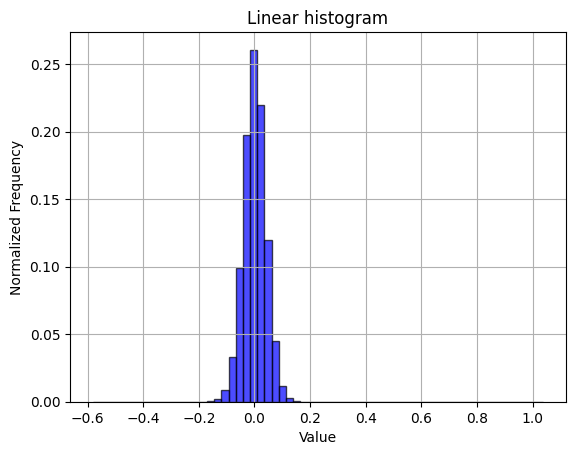

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 3.97364299e-08
 3.97364299e-08 1.98682149e-07 1.19209290e-07 1.98682149e-07
 1.58945719e-07 2.78155009e-07 6.35782878e-07 1.15235647e-06
 1.78813934e-06 3.85443370e-06 2.23318736e-05 3.91443570e-04
 6.70814514e-03 5.60408831e-02 2.19008565e-01 3.67184162e-01
 2.60340691e-01 7.86100626e-02 1.09237830e-02 7.13944435e-04
 3.68356705e-05 4.92731730e-06 1.94708506e-06 1.23182933e-06
 6.35782878e-07 7.15255737e-07 3.17891439e-07 3.17891439e-07
 7.94728597e-08 7.94728597e-08 3.97364299e-08 3.97364299e-08
 7.94728597e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.94728597e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

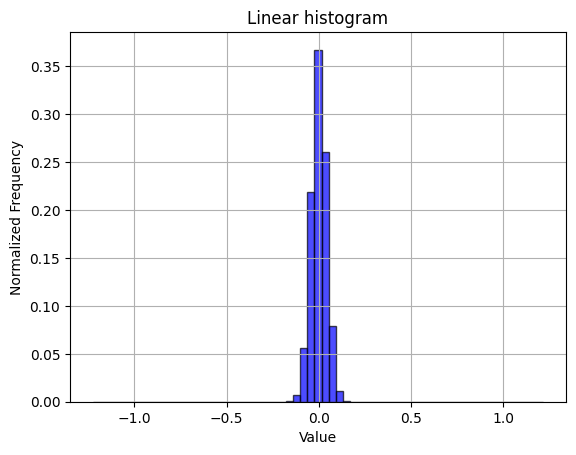

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[1.41285084e-07 3.53212710e-08 3.53212710e-08 0.00000000e+00
 0.00000000e+00 7.06425420e-08 7.06425420e-08 1.41285084e-07
 7.06425420e-08 1.41285084e-07 1.41285084e-07 1.41285084e-07
 1.41285084e-07 2.11927626e-07 2.11927626e-07 3.17

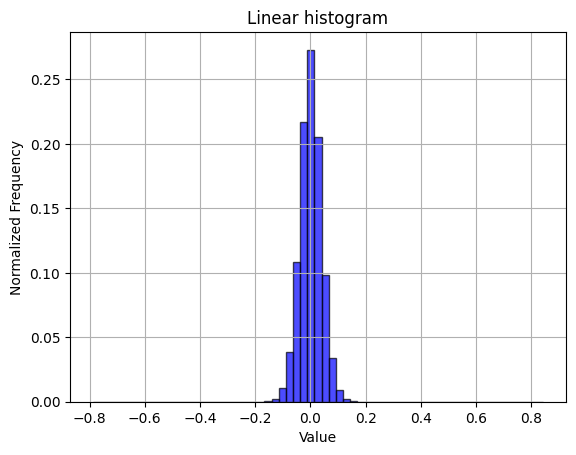

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[2.11927626e-07 0.00000000e+00 1.05963813e-07 2.11927626e-07
 1.05963813e-07 4.23855252e-07 2.11927626e-07 1.05963813e-07
 7.41746691e-07 5.29819065e-07 3.17891439e-07 8.47710503e-07
 3.17891439e-07 9.53674316e-07 1.90734863e-06 2.01331245e-06
 2.75505914e-06 4.23855252e-06 7.52343072e-06 1.56826443e-05
 5.37236532e-05 2.84936693e-04 1.36629740e-03 6.08592563e-03
 2.18482547e-02 5.98423216e-02 1.26399252e-01 1.97088242e-01
 2.23161062e-01 1.82289124e-01 1.10728370e-01 4.84086143e-02
 1.67324278e-02 4.42239973e-03 9.86523098e-04 1.89463298e-04
 4.23855252e-05 1.14440918e-05 6.03993734e-06 2.75505914e-06
 2.43716770e-06 1.80138482e-06 1.05963813e-06 9.53674316e-07
 7.41746691e-07 8.47710503e-07 3.17891439e-07 6.35782878e-07
 4.23855252e-07 5.29819065e-07 3.17891439e-07 3.17891439e-07
 3.17891439e-07 2.11927626e-07 0.00000000e+00 1.05963813e-07
 0.00000000e+00 0.00000000e+00 1.05963813e-07 0.00000000e+00
 0.

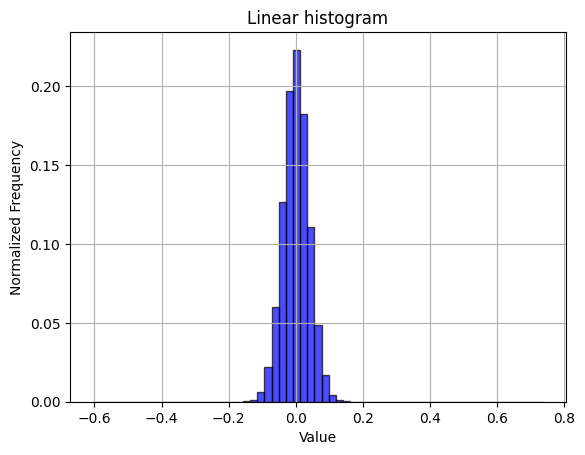

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[1.05963813e-07 2.64909532e-08 2.64909532e-08 0.00000000e+00
 0.00000000e+00 5.29819065e-08 5.29819065e-08 1.58945719e-07
 5.29819065e-08 1.58945719e-07 1.32454766e-07 2.38418579e-07
 1.58945719e-07 2.38418579e-07 3.70873345e-07 3.70873345e-07
 5.82800971e-07 7.94728597e-07 1.74840291e-06 2.27822198e-06
 4.39749824e-06 8.55657789e-06 2.42127313e-05 9.08904605e-05
 4.47246763e-04 2.23750538e-03 1.01814535e-02 3.86652417e-02
 1.09381914e-01 2.17353794e-01 2.72019651e-01 2.06006712e-01
 9.88696151e-02 3.36995125e-02 8.64492522e-03 1.86451276e-03
 3.68780560e-04 8.31815932e-05 2.17755636e-05 7.76184930e-06
 4.02662489e-06 1.90734863e-06 1.21858385e-06 8.47710503e-07
 5.29819065e-07 3.44382392e-07 2.64909532e-07 3.17891439e-07
 2.11927626e-07 3.17891439e-07 1.05963813e

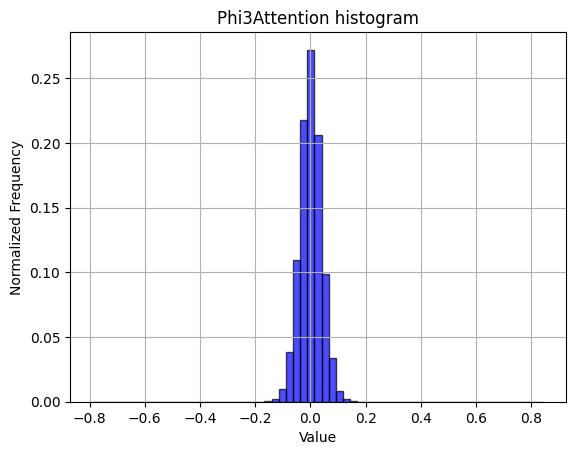

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 1.98682149e-08 3.97364299e-08 1.98682149e-08
 5.96046448e-08 7.94728597e-08 5.96046448e-08 1.39077504e-07
 2.38418579e-07 2.78155009e-07 4.17232513e-07 7.15255737e-07
 1.25169754e-06 2.16563543e-06 4.37100728e-06 9.95397568e-06
 2.84910202e-05 8.38637352e-05 2.69214312e-04 8.90274843e-04
 2.75689363e-03 8.07593266e-03 2.07736691e-02 4.57372467e-02
 8.63823493e-02 1.34078085e-01 1.70998712e-01 1.76919500e-01
 1.48358921e-01 1.02269749e-01 5.76215585e-02 2.76131233e-02
 1.12494032e-02 4.00123994e-03 1.28680468e-03 3.97821267e-04
 1.22388204e-04 3.90013059e-05 1.36693319e-05 5.42402267e-06
 2.92062759e-06 1.64906184e-06 1.03314718e-06 4.37100728e-07
 3.37759654e-07 1.19209290e-07 1.58945719e-07 0.00000000e+00
 3.97364299e-08 1.98682149e-08 1.98682149e-08 0.00000000e+00
 1.98682149e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0

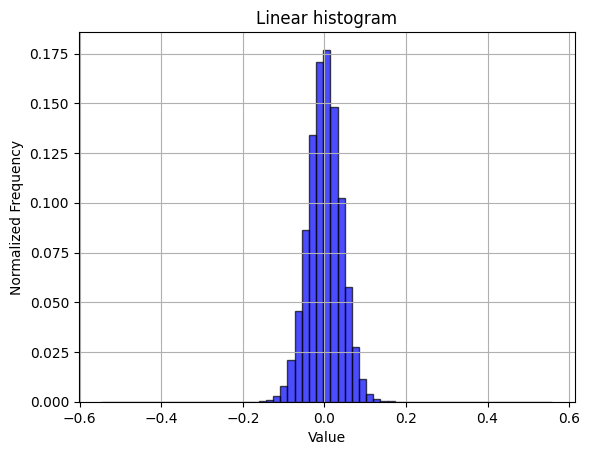

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 3.97364299e-08 3.97364299e-08 7.94728597e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 1.98682149e-07 1.58945719e-07 1.58945719e-07
 2.78155009e-07 2.78155009e-07 5.56310018e-07 1.15235647e-06
 1.54972076e-06 2.82128652e-06 1.29540761e-05 1.77502632e-04
 2.53085295e-03 2.27935314e-02 1.10830983e-01 2.70242929e-01
 3.29320908e-01 1.95794503e-01 5.85141977e-02 8.89992714e-03
 8.12292099e-04 4.99884288e-05 6.03993734e-06 2.34444936e-06
 1.19209290e-06 7.94728597e-07 1.98682149e-07 3.17891439e-07
 1.58945719e-07 1.58945719e-07 2.38418579e-07 1.58945719e-07
 3.97364299e-08 1.19209290e-07 7.94728597e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

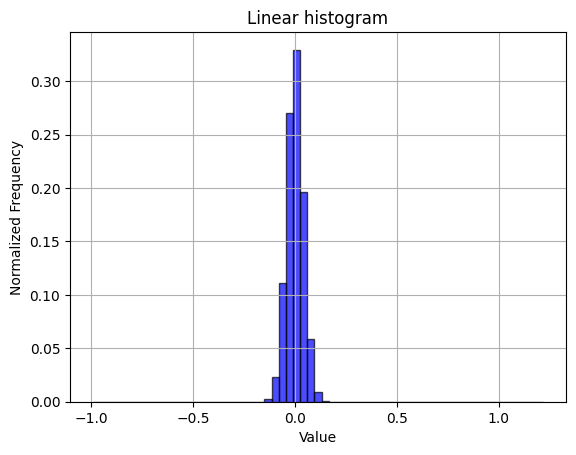

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 7.06425420e-08 0.00000000e+00 3.53212710e-08
 0.00000000e+00 0.00000000e+00 7.06425420e-08 3.53212710e-08
 7.06425420e-08 3.53212710e-08 1.76606355e-07 1.76606355e-07
 1.41285084e-07 1.41285084e-07 1.41285084e-07 2.82

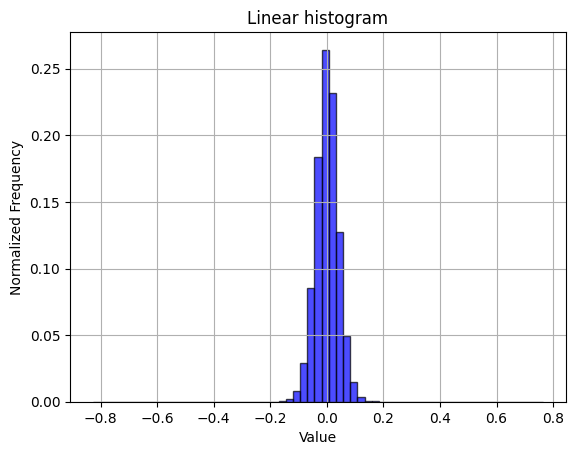

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[3.17891439e-07 0.00000000e+00 1.05963813e-07 3.17891439e-07
 3.17891439e-07 7.41746691e-07 7.41746691e-07 5.29819065e-07
 7.41746691e-07 6.35782878e-07 1.37752957e-06 1.80138482e-06
 2.54313151e-06 2.11927626e-06 2.11927626e-06 4.02662489e-06
 6.35782878e-06 1.34574042e-05 2.43716770e-05 6.54856364e-05
 1.99211968e-04 6.05053372e-04 1.85404883e-03 4.86342112e-03
 1.26011107e-02 2.79880100e-02 5.49981859e-02 8.98562537e-02
 1.30871349e-01 1.56729804e-01 1.60216014e-01 1.37709936e-01
 1.00499365e-01 6.24839995e-02 3.30664317e-02 1.54943466e-02
 6.28842248e-03 2.34413147e-03 7.77880351e-04 2.63002184e-04
 8.83738200e-05 3.26368544e-05 1.31395128e-05 5.93397352e-06
 3.81469727e-06 3.92066108e-06 2.96698676e-06 2.86102295e-06
 1.90734863e-06 1.05963813e-06 9.53674316e-07 9.53674316e-07
 5.29819065e-07 8.47710503e-07 3.17891439e-07 5.29819065e-07
 3.17891439e-07 1.05963813e-07 4.23855252e-07 1.05963813e-07
 1.

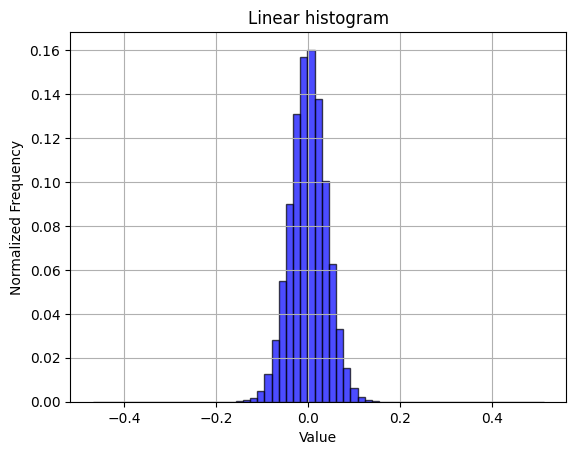

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 5.29819065e-08 0.00000000e+00 2.64909532e-08
 0.00000000e+00 0.00000000e+00 5.29819065e-08 2.64909532e-08
 5.29819065e-08 2.64909532e-08 1.32454766e-07 1.32454766e-07
 1.05963813e-07 1.05963813e-07 1.85436673e-07 2.38418579e-07
 2.11927626e-07 6.62273831e-07 5.29819065e-07 1.03314718e-06
 1.32454766e-06 2.59611342e-06 4.26504347e-06 7.44395786e-06
 2.14046902e-05 8.06649526e-05 3.65442700e-04 1.68302324e-03
 7.50017166e-03 2.88786623e-02 8.61354139e-02 1.84303814e-01
 2.62625270e-01 2.31367773e-01 1.28215816e-01 5.01102342e-02
 1.42111513e-02 3.50809097e-03 7.49826431e-04 1.58045027e-04
 3.88357374e-05 1.16295285e-05 5.27169969e-06 3.76171536e-06
 1.77489387e-06 1.45700243e-06 8.47710503e-07 5.29819065e-07
 5.29819065e-07 2.38418579e-07 2.64909532e

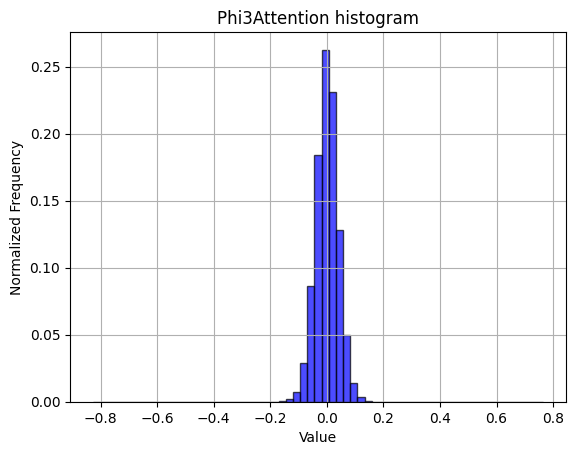

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.97364299e-08 0.00000000e+00 0.00000000e+00 1.98682149e-08
 0.00000000e+00 1.98682149e-08 1.98682149e-08 0.00000000e+00
 1.98682149e-08 9.93410746e-08 7.94728597e-08 1.98682149e-07
 1.98682149e-07 6.35782878e-07 1.49011612e-06 3.19878260e-06
 7.72873561e-06 2.28484472e-05 6.62008921e-05 2.30352084e-04
 7.47064749e-04 2.52046188e-03 7.57795572e-03 2.02498833e-02
 4.68561252e-02 8.89846881e-02 1.39071584e-01 1.76567972e-01
 1.80805862e-01 1.48235440e-01 9.77277954e-02 5.26216825e-02
 2.39638885e-02 9.24354792e-03 3.12640270e-03 9.68734423e-04
 2.71598498e-04 8.41816266e-05 2.58485476e-05 9.31819280e-06
 3.25838725e-06 1.78813934e-06 8.14596812e-07 4.37100728e-07
 1.19209290e-07 9.93410746e-08 5.96046448e-08 1.98682149e-08
 1.98682149e-08 3.97364299e-08 3.97364299e-08 3.97364299e-08
 0

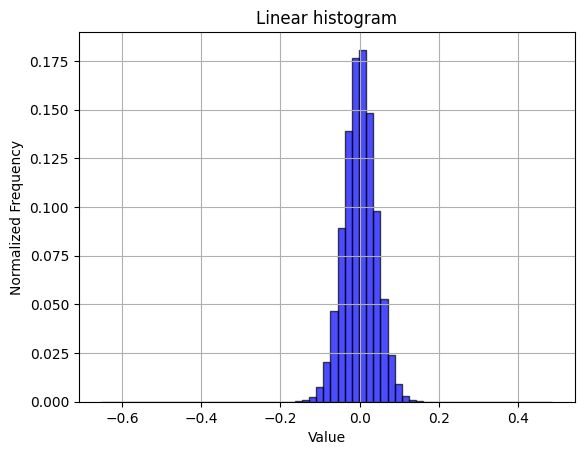

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 3.97364299e-08 3.97364299e-08 0.00000000e+00
 3.97364299e-08 3.97364299e-08 3.97364299e-08 1.58945719e-07
 1.19209290e-07 3.97364299e-08 1.19209290e-07 1.98682149e-07
 1.19209290e-07 2.38418579e-07 1.58945719e-07 2.78155009e-07
 4.37100728e-07 6.35782878e-07 1.15235647e-06 2.18550364e-06
 7.43071238e-06 7.70489375e-05 9.80933507e-04 8.55592887e-03
 4.67718840e-02 1.52943929e-01 2.79895663e-01 2.85436829e-01
 1.62079374e-01 5.20741940e-02 9.93212064e-03 1.13757451e-03
 8.61088435e-05 8.54333242e-06 2.34444936e-06 1.39077504e-06
 7.54992167e-07 1.19209290e-07 5.96046448e-07 1.58945719e-07
 1.19209290e-07 1.98682149e-07 2.38418579e-07 7.94728597e-08
 3.97364299e-08 7.94728597e-08 7.94728597e-08 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

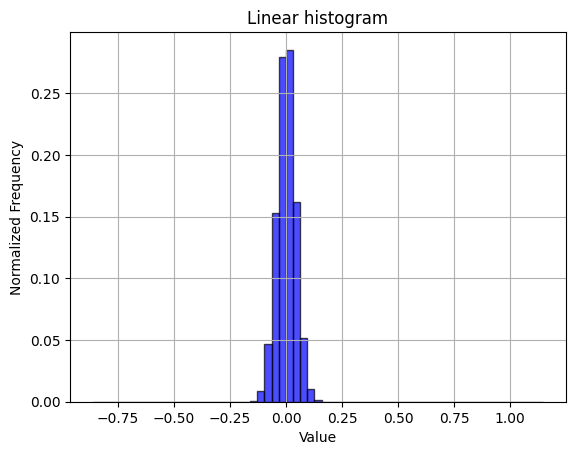

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 3.53212710e-08
 3.53212710e-08 1.05963813e-07 3.53212710e-08 1.05963813e-07
 7.06425420e-08 3.53212710e-08 1.05963813e-07 1.41285084e-07
 1.41285084e-07 2.11927626e-07 1.76606355e-07 3.53

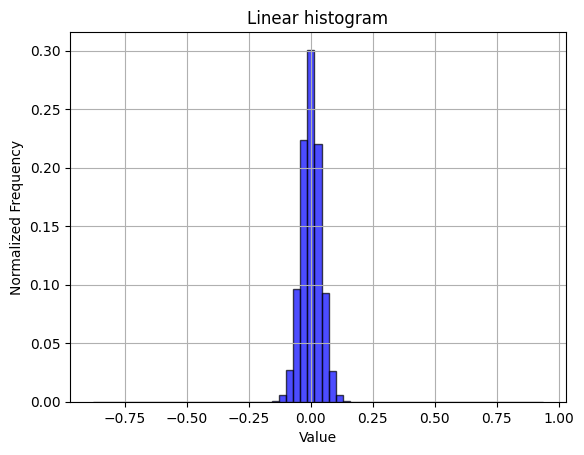

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 1.05963813e-07 0.00000000e+00 1.05963813e-07
 1.05963813e-07 1.05963813e-07 0.00000000e+00 1.05963813e-07
 2.11927626e-07 5.29819065e-07 3.17891439e-07 4.23855252e-07
 6.35782878e-07 9.53674316e-07 1.58945719e-06 1.69542101e-06
 2.11927626e-06 2.01331245e-06 3.92066108e-06 4.23855252e-06
 4.98029921e-06 9.53674316e-06 1.46230062e-05 4.21735975e-05
 1.59581502e-04 6.67572021e-04 2.63627370e-03 8.88591343e-03
 2.38877402e-02 5.44250276e-02 1.00132094e-01 1.51851972e-01
 1.83151563e-01 1.78193304e-01 1.37757513e-01 8.62130059e-02
 4.47820028e-02 1.82051129e-02 6.36990865e-03 1.92419688e-03
 4.71009148e-04 1.21116638e-04 3.11533610e-05 1.44110786e-05
 8.58306885e-06 4.55644396e-06 4.23855252e-06 2.33120388e-06
 1.69542101e-06 1.58945719e-06 1.37752957e-06 1.27156576e-06
 5.29819065e-07 5.29819065e-07 8.47710503e-07 3.17891439e-07
 4.23855252e-07 2.11927626e-07 0.00000000e+00 0.00000000e+00
 1.

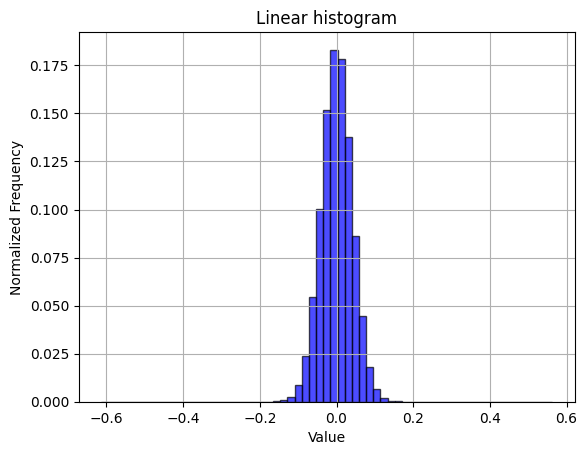

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 2.64909532e-08
 2.64909532e-08 7.94728597e-08 2.64909532e-08 7.94728597e-08
 5.29819065e-08 5.29819065e-08 1.05963813e-07 1.32454766e-07
 1.32454766e-07 1.85436673e-07 2.11927626e-07 4.50346205e-07
 5.56310018e-07 7.41746691e-07 1.29805671e-06 2.01331245e-06
 2.64909532e-06 5.08626302e-06 8.76850552e-06 2.36034393e-05
 1.24745899e-04 8.63154729e-04 5.67846828e-03 2.82257133e-02
 9.80489519e-02 2.23096636e-01 2.96392732e-01 2.19463905e-01
 9.47804451e-02 2.69293255e-02 5.38942549e-03 7.99205568e-04
 1.16798613e-04 2.28616926e-05 8.47710503e-06 4.92731730e-06
 2.43716770e-06 1.50998433e-06 1.24507480e-06 8.21219550e-07
 5.03328111e-07 2.38418579e-07 2.11927626e-07 1.32454766e-07
 1.05963813e-07 2.11927626e-07 5.29819065e

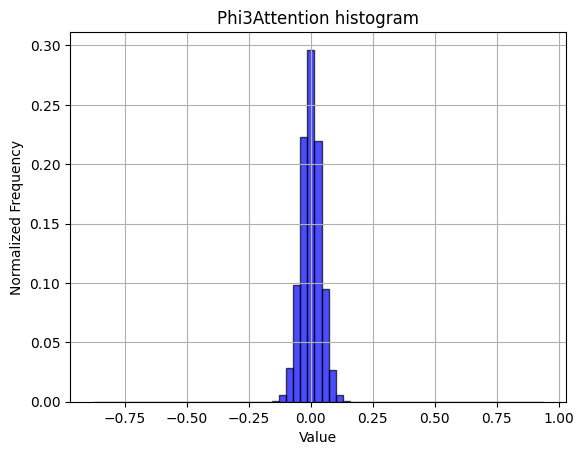

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 7.94728597e-08 0.00000000e+00 1.98682149e-08
 1.98682149e-08 5.96046448e-08 1.19209290e-07 1.39077504e-07
 2.18550364e-07 3.37759654e-07 9.33806101e-07 1.90734863e-06
 4.03324763e-06 1.18215879e-05 3.68158023e-05 1.30414963e-04
 5.11705875e-04 1.88761950e-03 6.50958220e-03 1.94654266e-02
 4.78587548e-02 9.67014432e-02 1.54000481e-01 1.92488154e-01
 1.88375533e-01 1.42970125e-01 8.55334798e-02 4.05268073e-02
 1.58470869e-02 5.15699387e-03 1.44392252e-03 3.87767951e-04
 1.02818012e-04 2.95042992e-05 8.94069672e-06 3.81469727e-06
 1.58945719e-06 6.15914663e-07 3.37759654e-07 1.19209290e-07
 2.38418579e-07 1.98682149e-08 1.98682149e-08 3.97364299e-08
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

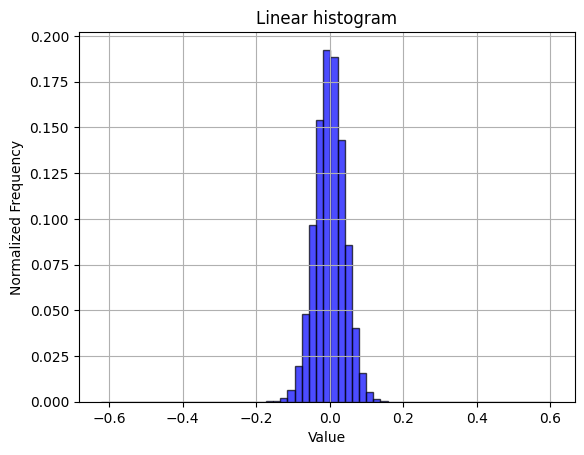

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19209290e-07 3.97364299e-08 3.97364299e-08 3.97364299e-08
 1.19209290e-07 1.19209290e-07 1.98682149e-07 1.98682149e-07
 2.78155009e-07 5.96046448e-07 5.56310018e-07 1.15235647e-06
 6.03993734e-06 8.18570455e-05 1.10371908e-03 1.01205508e-02
 5.36999702e-02 1.63781365e-01 2.85732110e-01 2.77383049e-01
 1.51477297e-01 4.72313960e-02 8.42622916e-03 8.82267952e-04
 6.28232956e-05 4.56968943e-06 1.31130219e-06 5.16573588e-07
 3.17891439e-07 1.98682149e-07 1.58945719e-07 1.19209290e-07
 7.94728597e-08 7.94728597e-08 0.00000000e+00 3.97364299e-08
 3.97364299e-08 0.00000000e+00 1.19209290e-07 3.97364299e-08
 7.94728597e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.

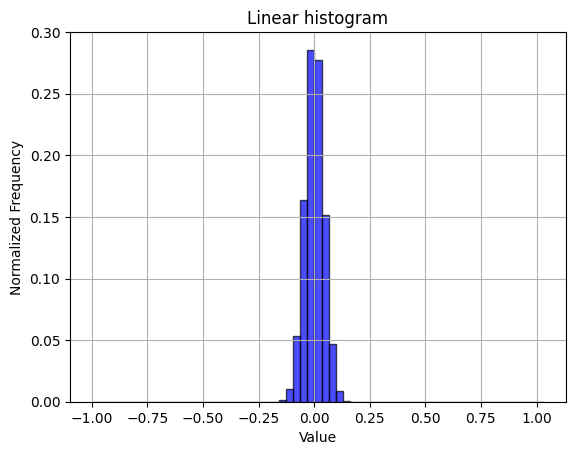

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 7.06425420e-08 3.53212710e-08 3.53212710e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41285084e-07
 1.41285084e-07 3.53212710e-08 3.53212710e-08 1.05963813e-07
 1.05963813e-07 2.11927626e-07 1.76606355e-07 4.94

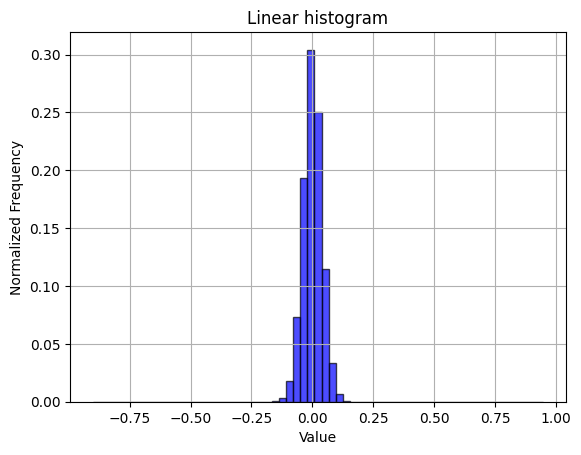

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[3.17891439e-07 0.00000000e+00 1.05963813e-07 2.11927626e-07
 2.11927626e-07 0.00000000e+00 4.23855252e-07 1.05963813e-07
 5.29819065e-07 3.17891439e-07 4.23855252e-07 1.05963813e-06
 1.27156576e-06 6.35782878e-07 2.43716770e-06 2.43716770e-06
 2.64909532e-06 3.49680583e-06 5.19222683e-06 6.88764784e-06
 1.12321642e-05 2.39478217e-05 8.45591227e-05 3.03480360e-04
 1.15331014e-03 3.88548109e-03 1.12304688e-02 2.80815760e-02
 5.86078432e-02 1.03612052e-01 1.49276733e-01 1.77162700e-01
 1.70052846e-01 1.33489609e-01 8.59338972e-02 4.52896754e-02
 2.04953088e-02 7.71501329e-03 2.56146325e-03 7.01056586e-04
 1.93066067e-04 5.14984131e-05 1.86496311e-05 1.01725260e-05
 5.82800971e-06 4.66240777e-06 2.01331245e-06 2.75505914e-06
 2.96698676e-06 1.48349338e-06 8.47710503e-07 1.16560194e-06
 1.16560194e-06 6.35782878e-07 7.41746691e-07 3.17891439e-07
 2.11927626e-07 2.11927626e-07 2.11927626e-07 1.05963813e-07
 2.

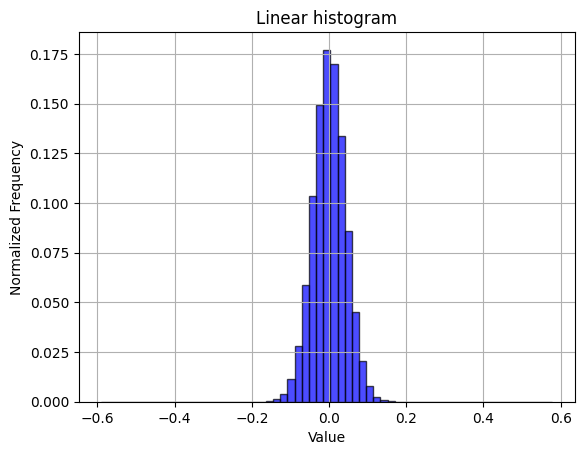

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 5.29819065e-08 2.64909532e-08 2.64909532e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.05963813e-07
 1.05963813e-07 2.64909532e-08 5.29819065e-08 1.32454766e-07
 1.58945719e-07 2.11927626e-07 2.38418579e-07 4.50346205e-07
 4.76837158e-07 6.35782878e-07 1.16560194e-06 1.11262004e-06
 2.62260437e-06 4.47697110e-06 6.56975640e-06 1.46230062e-05
 6.76843855e-05 4.93658914e-04 3.60123316e-03 1.95326010e-02
 7.63521459e-02 1.93665319e-01 2.97637781e-01 2.47596661e-01
 1.17247634e-01 3.51237721e-02 7.33976894e-03 1.11307038e-03
 1.47024790e-04 2.55902608e-05 8.82148743e-06 4.34451633e-06
 3.23189629e-06 2.09278531e-06 9.80165270e-07 1.21858385e-06
 5.56310018e-07 3.97364299e-07 2.11927626e-07 2.64909532e-07
 1.32454766e-07 1.05963813e-07 2.64909532e

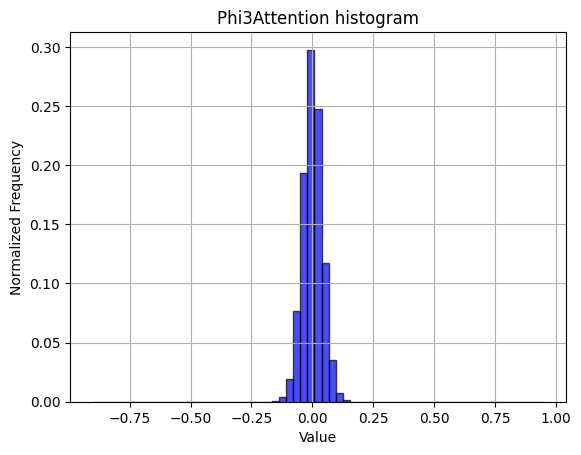

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 1.98682149e-08 0.00000000e+00
 3.97364299e-08 1.98682149e-08 1.98682149e-08 3.97364299e-08
 5.96046448e-08 1.39077504e-07 0.00000000e+00 1.58945719e-07
 1.19209290e-07 4.96705373e-07 9.13937887e-07 1.58945719e-06
 3.29812368e-06 7.98702240e-06 2.37027804e-05 7.95125961e-05
 2.72750854e-04 1.01188819e-03 3.21384271e-03 9.73365704e-03
 2.52310435e-02 5.45664231e-02 9.96518135e-02 1.47722363e-01
 1.78040028e-01 1.74623787e-01 1.37879948e-01 8.81298979e-02
 4.76867159e-02 2.08279888e-02 7.61061907e-03 2.58213282e-03
 7.95523326e-04 2.07265218e-04 6.26842181e-05 1.90337499e-05
 7.17242559e-06 2.90075938e-06 9.13937887e-07 5.36441803e-07
 3.77496084e-07 2.78155009e-07 5.96046448e-08 3.97364299e-08
 5.96046448e-08 3.97364299e-08 1.98682149e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

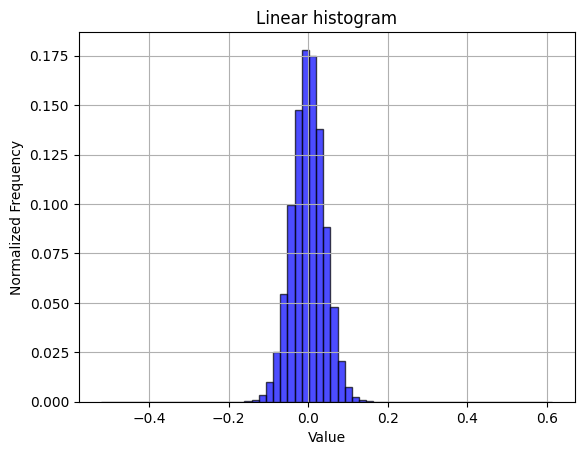

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97364299e-08 1.19209290e-07 1.58945719e-07
 3.97364299e-08 7.94728597e-08 4.37100728e-07 8.34465027e-07
 2.90075938e-06 9.33011373e-05 3.57250373e-03 5.03007571e-02
 2.51407544e-01 4.17536139e-01 2.30429331e-01 4.37511206e-02
 2.82609463e-03 7.39892324e-05 2.62260437e-06 9.13937887e-07
 2.38418579e-07 1.98682149e-07 1.98682149e-07 3.97364299e-08
 1.19209290e-07 7.94728597e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

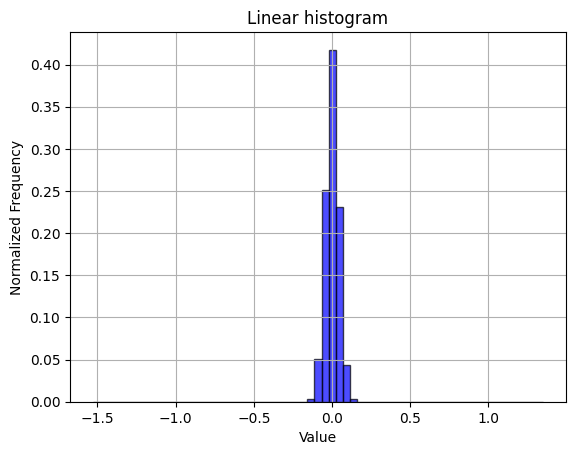

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 3.53212710e-08 0.00000000e+00 3.53212710e-08
 3.53212710e-08 1.05963813e-07 0.00000000e+00 7.06425420e-08
 3.53212710e-08 7.06425420e-08 1.76606355e-07 1.05963813e-07
 7.06425420e-08 1.05963813e-07 2.11927626e-07 4.23

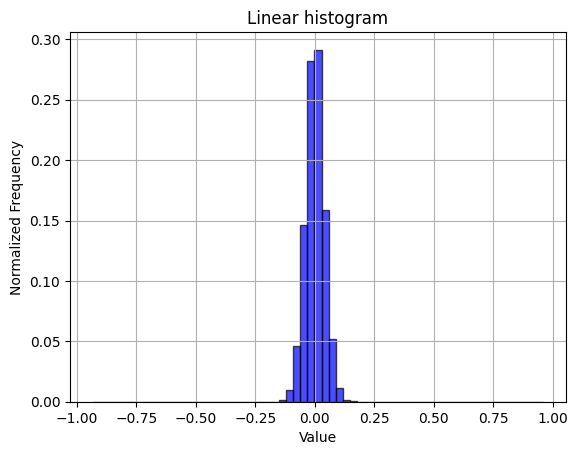

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 1.05963813e-07 1.05963813e-07 0.00000000e+00
 3.17891439e-07 2.11927626e-07 1.05963813e-07 5.29819065e-07
 3.17891439e-07 3.17891439e-07 1.37752957e-06 8.47710503e-07
 7.41746691e-07 8.47710503e-07 1.05963813e-06 6.35782878e-07
 9.53674316e-07 7.41746691e-07 5.29819065e-07 1.37752957e-06
 2.01331245e-06 2.43716770e-06 2.86102295e-06 3.92066108e-06
 1.16560194e-05 4.67300415e-05 3.61230638e-04 2.78684828e-03
 1.57867008e-02 6.10527462e-02 1.54365857e-01 2.51982795e-01
 2.57039388e-01 1.65528085e-01 6.85621897e-02 1.84978909e-02
 3.39825948e-03 4.71433004e-04 5.37236532e-05 9.96059842e-06
 5.08626302e-06 3.81469727e-06 1.69542101e-06 1.05963813e-06
 4.23855252e-07 9.53674316e-07 5.29819065e-07 5.29819065e-07
 8.47710503e-07 8.47710503e-07 3.17891439e-07 9.53674316e-07
 1.05963813e-06 1.27156576e-06 6.35782878e-07 8.47710503e-07
 1.05963813e-07 1.05963813e-07 3.17891439e-07 1.05963813e-07
 2.

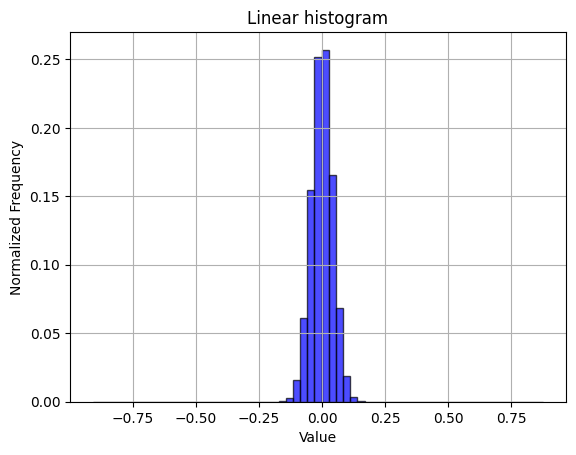

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[7.94728597e-08 2.64909532e-08 2.64909532e-08 5.29819065e-08
 5.29819065e-08 1.58945719e-07 5.29819065e-08 1.05963813e-07
 1.85436673e-07 1.05963813e-07 4.23855252e-07 3.44382392e-07
 2.64909532e-07 2.91400486e-07 4.23855252e-07 4.76837158e-07
 4.23855252e-07 5.56310018e-07 8.74201457e-07 1.29805671e-06
 1.77489387e-06 2.25173102e-06 3.81469727e-06 8.10623169e-06
 2.49544779e-05 1.71952777e-04 1.46290991e-03 1.01243390e-02
 4.81211344e-02 1.48480203e-01 2.77392838e-01 2.86177900e-01
 1.59874651e-01 5.41000101e-02 1.19846397e-02 1.79786152e-03
 2.13781993e-04 2.84777747e-05 8.18570455e-06 4.15907966e-06
 2.86102295e-06 1.27156576e-06 1.05963813e-06 7.41746691e-07
 4.23855252e-07 4.76837158e-07 2.91400486e-07 3.44382392e-07
 2.91400486e-07 3.44382392e-07 3.44382392e

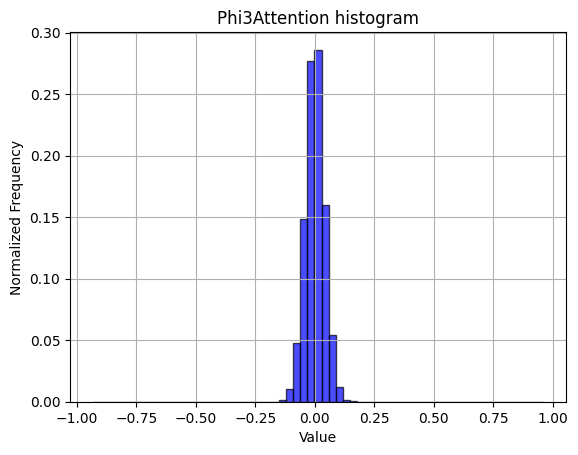

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 5.96046448e-08 1.58945719e-07 1.98682149e-07 1.98682149e-07
 3.37759654e-07 6.95387522e-07 1.58945719e-06 2.98023224e-06
 9.45727030e-06 2.40206718e-05 9.12745794e-05 2.74697940e-04
 9.38018163e-04 2.92927027e-03 7.78685013e-03 1.86975598e-02
 3.88390621e-02 7.06792871e-02 1.10002915e-01 1.45316919e-01
 1.61438485e-01 1.52111232e-01 1.21653895e-01 8.19824537e-02
 4.72078919e-02 2.42492954e-02 1.00363294e-02 3.82699569e-03
 1.32171313e-03 3.96609306e-04 1.24971072e-04 3.40143840e-05
 1.21196111e-05 4.41074371e-06 1.86761220e-06 8.34465027e-07
 4.56968943e-07 3.17891439e-07 1.19209290e-07 5.96046448e-08
 3.97364299e-08 9.93410746e-08 3.97364299e-08 3.97364299e-08
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0

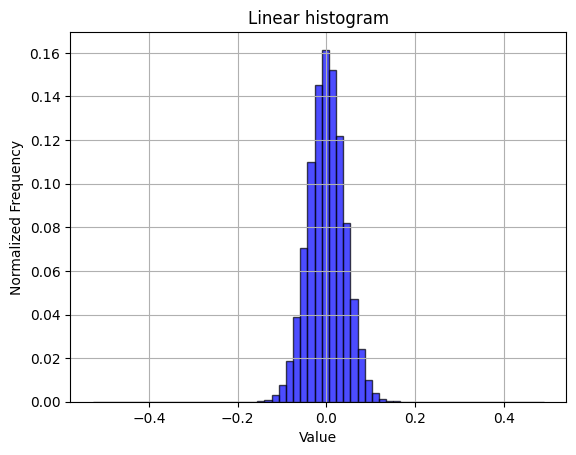

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 7.94728597e-08 3.97364299e-08 1.19209290e-07 7.94728597e-08
 1.58945719e-07 6.35782878e-07 7.94728597e-07 1.82787577e-06
 2.03450521e-05 3.21904818e-04 3.23760509e-03 2.17055877e-02
 8.40266148e-02 2.00411558e-01 2.84309030e-01 2.41093477e-01
 1.20500247e-01 3.67604494e-02 6.79353873e-03 7.48793284e-04
 6.07967377e-05 3.85443370e-06 7.94728597e-07 4.37100728e-07
 3.17891439e-07 2.38418579e-07 1.19209290e-07 3.97364299e-08
 0.00000000e+00 1.19209290e-07 3.97364299e-08 3.97364299e-08
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

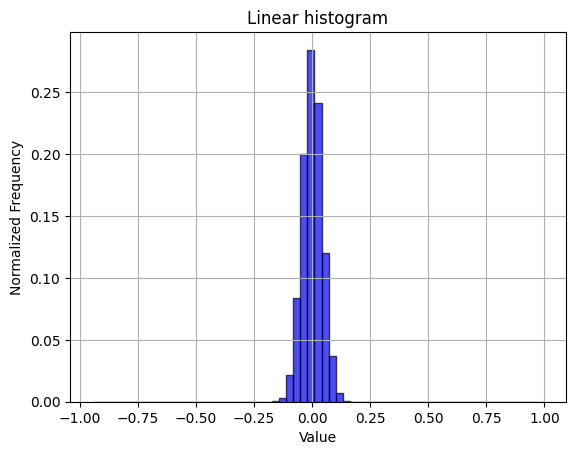

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.53212710e-08 7.06425420e-08
 3.53212710e-08 7.06425420e-08 1.05963813e-07 3.53212710e-08
 3.53212710e-08 7.06425420e-08 7.06425420e-08 1.76

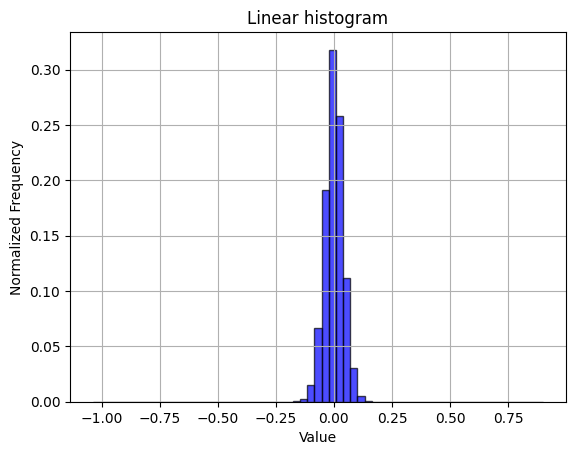

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 1.05963813e-07 0.00000000e+00
 2.11927626e-07 3.17891439e-07 7.41746691e-07 7.41746691e-07
 6.35782878e-07 1.48349338e-06 2.22524007e-06 1.69542101e-06
 2.11927626e-06 1.27156576e-06 3.17891439e-06 3.17891439e-06
 3.07295058e-06 3.92066108e-06 4.34451633e-06 4.13258870e-06
 1.01725260e-05 9.00692410e-06 2.55372789e-05 6.71810574e-05
 2.54631042e-04 8.79287720e-04 3.27332815e-03 1.01741155e-02
 2.81155904e-02 6.08284209e-02 1.10206710e-01 1.61734475e-01
 1.87724431e-01 1.73703935e-01 1.27866639e-01 7.73297416e-02
 3.63608466e-02 1.45255195e-02 4.88832262e-03 1.39543745e-03
 3.97046407e-04 1.06069777e-04 3.13652886e-05 1.54707167e-05
 7.84132216e-06 6.67572021e-06 4.02662489e-06 3.81469727e-06
 3.81469727e-06 2.54313151e-06 2.01331245e-06 2.01331245e-06
 2.01331245e-06 2.11927626e-06 1.48349338e-06 1.16560194e-06
 1.58945719e-06 6.35782878e-07 5.29819065e-07 4.23855252e-07
 2.

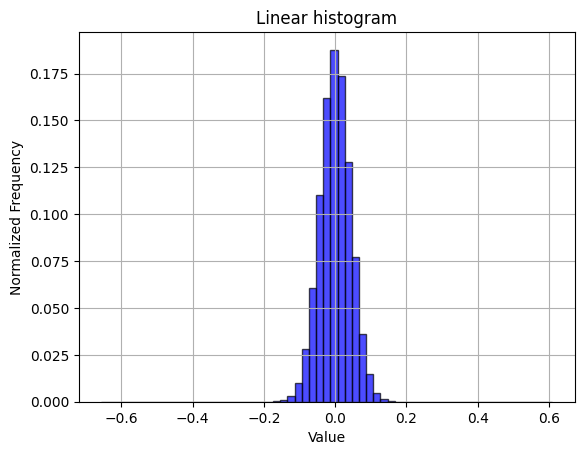

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.64909532e-08 5.29819065e-08
 2.64909532e-08 5.29819065e-08 7.94728597e-08 2.64909532e-08
 5.29819065e-08 7.94728597e-08 5.29819065e-08 2.38418579e-07
 3.17891439e-07 3.44382392e-07 6.62273831e-07 1.05963813e-06
 1.24507480e-06 1.27156576e-06 2.01331245e-06 2.62260437e-06
 3.78820631e-06 6.33133782e-06 1.24507480e-05 5.18692864e-05
 3.68833542e-04 2.72332297e-03 1.63957013e-02 7.00747437e-02
 1.92040576e-01 3.08872859e-01 2.54319403e-01 1.15063164e-01
 3.28942140e-02 6.13066885e-03 8.67764155e-04 1.18414561e-04
 2.18815274e-05 8.13272264e-06 4.47697110e-06 2.88751390e-06
 2.25173102e-06 1.13911099e-06 1.29805671e-06 9.53674316e-07
 8.21219550e-07 5.03328111e-07 3.70873345e

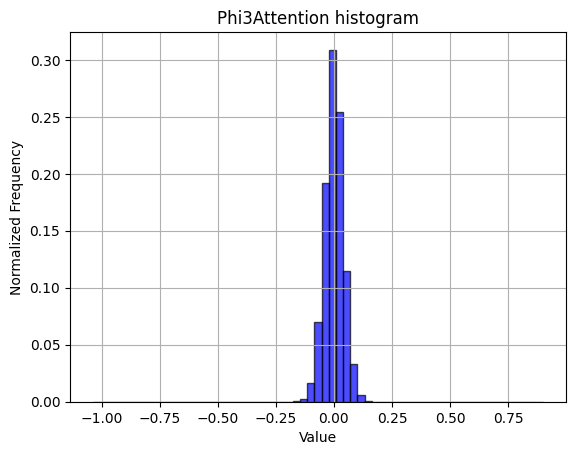

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 1.98682149e-08 1.98682149e-08 1.98682149e-08
 7.94728597e-08 1.19209290e-07 1.78813934e-07 2.78155009e-07
 1.58945719e-07 2.58286794e-07 4.56968943e-07 7.94728597e-07
 1.86761220e-06 3.51667404e-06 9.59634781e-06 3.28818957e-05
 1.39653683e-04 5.70138295e-04 2.29529540e-03 7.38898913e-03
 2.06337571e-02 4.92078066e-02 9.27588940e-02 1.46442493e-01
 1.81086441e-01 1.81023200e-01 1.45271957e-01 9.36794281e-02
 4.83985941e-02 2.06152002e-02 7.49162833e-03 2.18723218e-03
 5.71489334e-04 1.38024489e-04 3.40143840e-05 9.49700673e-06
 3.23851903e-06 1.27156576e-06 5.96046448e-07 1.78813934e-07
 2.58286794e-07 1.39077504e-07 5.96046448e-08 7.94728597e-08
 1.98682149e-08 1.98682149e-08 1.98682149e-08 1.98682149e-08
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

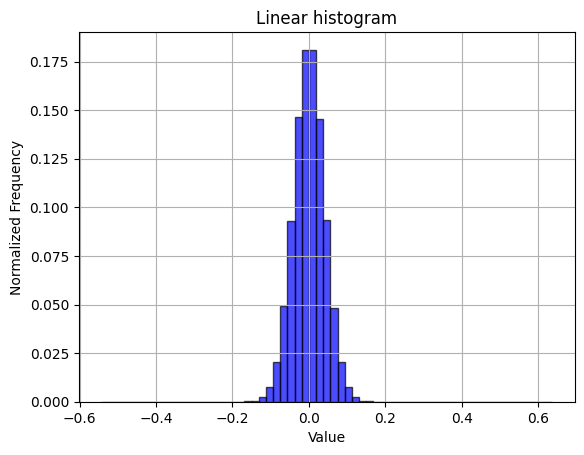

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[7.94728597e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.97364299e-08 3.97364299e-08 7.94728597e-08 0.00000000e+00
 7.94728597e-08 1.58945719e-07 1.58945719e-07 3.17891439e-07
 1.98682149e-07 5.16573588e-07 5.52336375e-06 2.51889229e-04
 6.20432695e-03 6.04780515e-02 2.41418958e-01 3.83055687e-01
 2.41549015e-01 6.05901082e-02 6.19109472e-03 2.46286392e-04
 5.64257304e-06 5.56310018e-07 3.17891439e-07 1.19209290e-07
 0.00000000e+00 1.58945719e-07 7.94728597e-08 1.19209290e-07
 3.97364299e-08 0.00000000e+00 1.19209290e-07 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

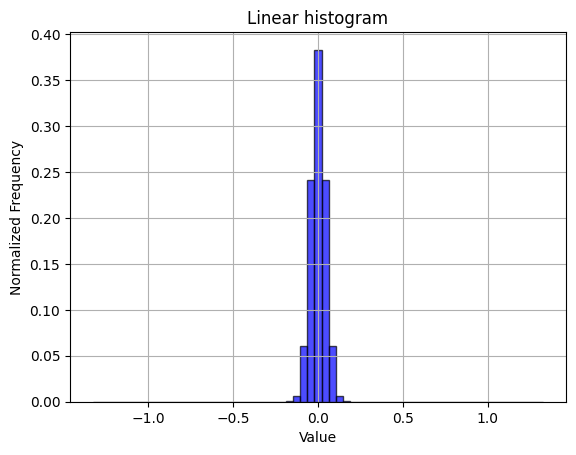

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 1.05963813e-07 3.53212710e-08
 3.53212710e-08 1.05963813e-07 1.41285084e-07 0.00000000e+00
 1.05963813e-07 7.06425420e-08 1.41285084e-07 1.76606355e-07
 2.47248897e-07 1.76606355e-07 3.88533981e-07 2.47

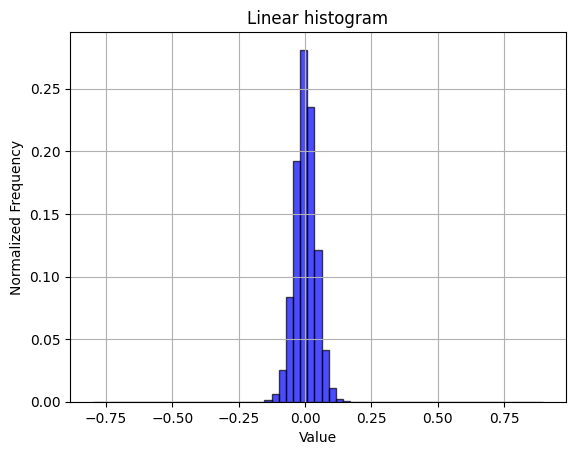

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 1.05963813e-07
 1.05963813e-07 2.11927626e-07 1.05963813e-07 2.11927626e-07
 2.11927626e-07 4.23855252e-07 9.53674316e-07 8.47710503e-07
 1.80138482e-06 3.28487820e-06 4.13258870e-06 3.60276964e-06
 5.19222683e-06 6.88764784e-06 1.00665622e-05 1.29275852e-05
 2.68088447e-05 8.64664714e-05 4.28517660e-04 1.98162927e-03
 7.63829549e-03 2.32665804e-02 5.81951141e-02 1.12827619e-01
 1.72187805e-01 2.01284515e-01 1.81664573e-01 1.27652274e-01
 6.91439311e-02 2.99894545e-02 9.95816125e-03 2.80422635e-03
 5.92019823e-04 1.27580431e-04 3.68754069e-05 1.63184272e-05
 1.02784899e-05 7.62939453e-06 6.88764784e-06 4.23855252e-06
 2.75505914e-06 2.96698676e-06 1.37752957e-06 1.48349338e-06
 1.05963813e-06 4.23855252e-07 3.17891439e-07 2.11927626e-07
 1.05963813e-07 1.05963813e-07 1.05963813e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

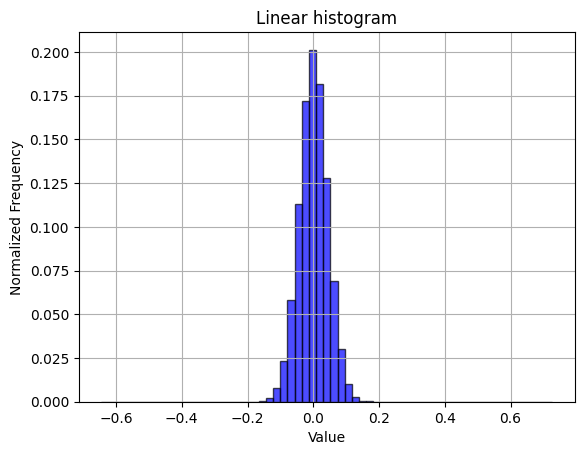

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 7.94728597e-08 2.64909532e-08
 2.64909532e-08 1.05963813e-07 1.05963813e-07 0.00000000e+00
 1.05963813e-07 7.94728597e-08 1.58945719e-07 2.11927626e-07
 2.38418579e-07 2.91400486e-07 5.03328111e-07 5.56310018e-07
 1.45700243e-06 2.33120388e-06 2.83453200e-06 3.73522441e-06
 6.06642829e-06 1.17884742e-05 3.15772163e-05 1.68032116e-04
 1.19177500e-03 6.63579835e-03 2.78617806e-02 8.72759554e-02
 1.91018740e-01 2.72547033e-01 2.30764627e-01 1.23528692e-01
 4.43129275e-02 1.18939347e-02 2.27355957e-03 3.70740891e-04
 5.69290585e-05 1.48349338e-05 7.78834025e-06 4.60942586e-06
 3.07295058e-06 2.06629435e-06 1.69542101e-06 9.27183363e-07
 6.35782878e-07 4.23855252e-07 2.64909532e-07 1.58945719e-07
 7.94728597e-08 5.29819065e-08 7.94728597e

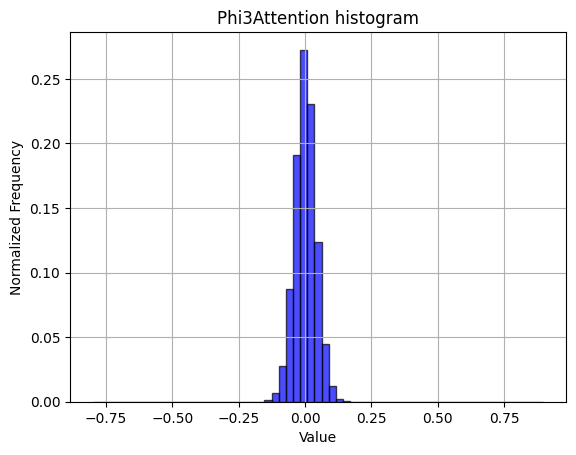

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 1.98682149e-08
 0.00000000e+00 1.98682149e-08 1.98682149e-08 1.98682149e-08
 5.96046448e-08 1.78813934e-07 2.78155009e-07 2.58286794e-07
 4.76837158e-07 1.07288361e-06 4.17232513e-06 2.70605087e-05
 2.30054061e-04 1.98606650e-03 1.20305816e-02 5.09061416e-02
 1.39901479e-01 2.46370773e-01 2.67744660e-01 1.80104891e-01
 7.53914913e-02 2.10028489e-02 3.74199947e-03 4.89910444e-04
 5.56906064e-05 6.89427058e-06 1.17222468e-06 5.76178233e-07
 4.56968943e-07 1.98682149e-07 1.78813934e-07 1.98682149e-08
 7.94728597e-08 1.98682149e-08 3.97364299e-08 3.97364299e-08
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

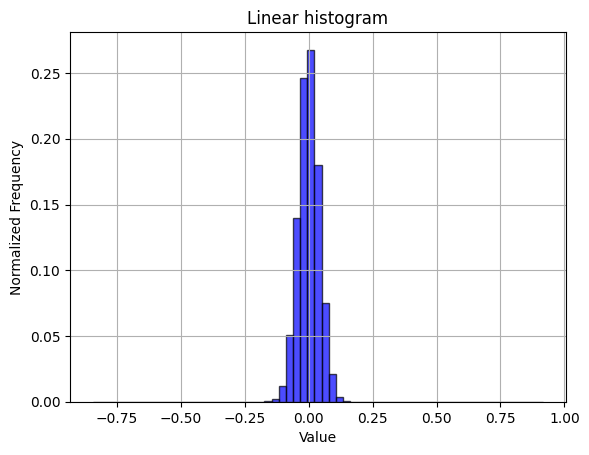

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 7.94728597e-08
 0.00000000e+00 3.97364299e-08 7.94728597e-08 1.98682149e-07
 1.98682149e-07 1.58945719e-07 2.22524007e-06 5.69820404e-05
 1.12775962e-03 1.26812458e-02 7.20186631e-02 2.11503506e-01
 3.22333574e-01 2.53857454e-01 1.02150559e-01 2.17603445e-02
 2.36384074e-03 1.36454900e-04 5.52336375e-06 4.37100728e-07
 1.19209290e-07 7.94728597e-08 1.19209290e-07 0.00000000e+00
 3.97364299e-08 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

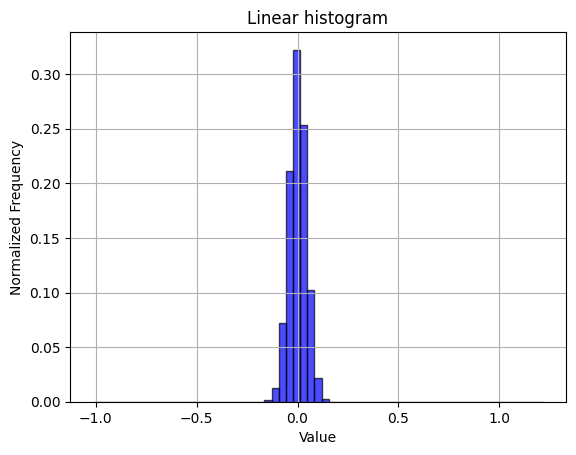

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 3.53212710e-08 3.53212710e-08 0.00000000e+00
 0.00000000e+00 3.53212710e-08 3.53212710e-08 0.00000000e+00
 1.76606355e-07 3.53212710e-08 1.05963813e-07 0.00000000e+00
 1.41285084e-07 3.88533981e-07 2.47248897e-07 3.17

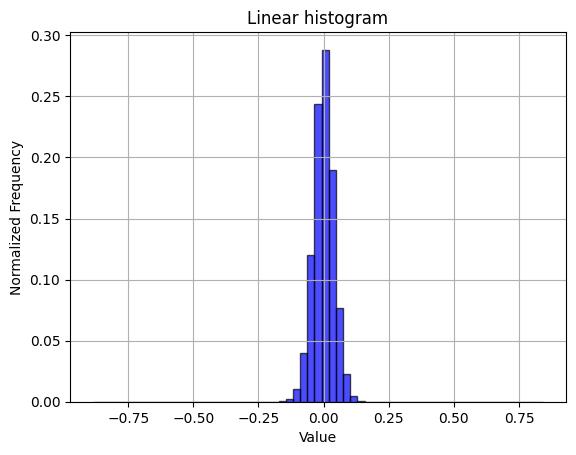

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[3.17891439e-07 8.47710503e-07 6.35782878e-07 6.35782878e-07
 1.48349338e-06 7.41746691e-07 8.47710503e-07 7.41746691e-07
 3.17891439e-07 6.35782878e-07 8.47710503e-07 3.17891439e-07
 3.17891439e-07 1.16560194e-06 6.35782878e-07 8.47710503e-07
 1.48349338e-06 1.80138482e-06 4.23855252e-06 3.39084201e-06
 3.39084201e-06 6.78168403e-06 1.07023451e-05 2.95639038e-05
 1.15076701e-04 6.42882453e-04 3.42051188e-03 1.41106711e-02
 4.46963840e-02 1.06100188e-01 1.82616234e-01 2.27710088e-01
 2.03064601e-01 1.29275640e-01 6.05245166e-02 2.08197700e-02
 5.44982486e-03 1.10138787e-03 1.86072456e-04 4.19616699e-05
 1.53647529e-05 6.88764784e-06 4.55644396e-06 4.55644396e-06
 3.49680583e-06 2.43716770e-06 1.90734863e-06 8.47710503e-07
 1.27156576e-06 4.23855252e-07 4.23855252e-07 7.41746691e-07
 7.41746691e-07 6.35782878e-07 7.41746691e-07 5.29819065e-07
 5.29819065e-07 1.69542101e-06 1.16560194e-06 7.41746691e-07
 5.

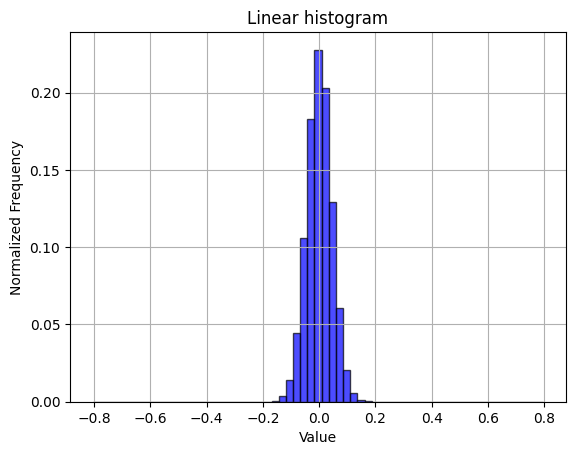

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 2.64909532e-08 5.29819065e-08 7.94728597e-08
 2.11927626e-07 2.38418579e-07 1.58945719e-07 4.50346205e-07
 3.17891439e-07 2.64909532e-07 1.32454766e-07 1.58945719e-07
 3.17891439e-07 3.97364299e-07 2.91400486e-07 5.29819065e-07
 3.97364299e-07 7.94728597e-07 1.03314718e-06 1.48349338e-06
 2.35769484e-06 3.09944153e-06 4.87433539e-06 7.44395786e-06
 1.77224477e-05 6.77903493e-05 4.04410892e-04 2.43102180e-03
 1.17364989e-02 4.38644886e-02 1.23294353e-01 2.37628778e-01
 2.77022945e-01 1.88592169e-01 8.15872616e-02 2.59777705e-02
 5.95540471e-03 1.14096536e-03 1.83290905e-04 3.56833140e-05
 1.28216214e-05 5.90748257e-06 4.29153442e-06 2.72856818e-06
 1.77489387e-06 1.40402052e-06 7.15255737e-07 6.62273831e-07
 4.50346205e-07 4.50346205e-07 2.64909532e

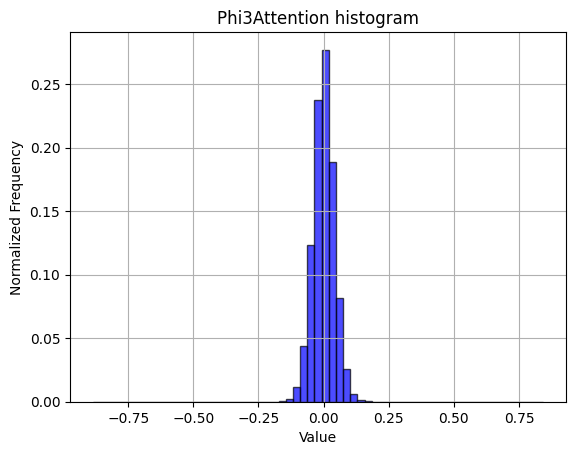

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 1.98682149e-08
 0.00000000e+00 5.96046448e-08 1.98682149e-08 1.98682149e-08
 5.96046448e-08 1.98682149e-08 1.78813934e-07 9.93410746e-08
 5.96046448e-07 1.60932541e-06 9.29832458e-06 1.18593375e-04
 1.55341625e-03 1.32754445e-02 7.03172684e-02 2.03194320e-01
 3.14812938e-01 2.56783823e-01 1.09723171e-01 2.62116988e-02
 3.66230806e-03 3.08652719e-04 2.26298968e-05 2.52326330e-06
 4.56968943e-07 2.58286794e-07 1.19209290e-07 5.96046448e-08
 3.97364299e-08 1.98682149e-08 5.96046448e-08 1.98682149e-08
 1.98682149e-08 1.98682149e-08 1.98682149e-08 1.98682149e-08
 1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

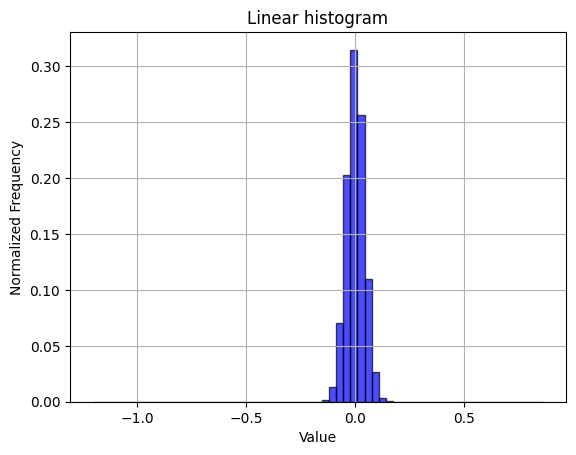

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 7.94728597e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.94728597e-08 7.94728597e-08
 3.97364299e-08 1.19209290e-07 1.98682149e-07 3.17891439e-07
 1.50998433e-06 4.34319178e-05 1.49754683e-03 2.38645077e-02
 1.44267480e-01 3.51421078e-01 3.34121108e-01 1.24932806e-01
 1.87085470e-02 1.11142794e-03 2.76565552e-05 7.94728597e-07
 4.76837158e-07 3.97364299e-08 1.19209290e-07 1.58945719e-07
 3.97364299e-08 3.97364299e-08 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

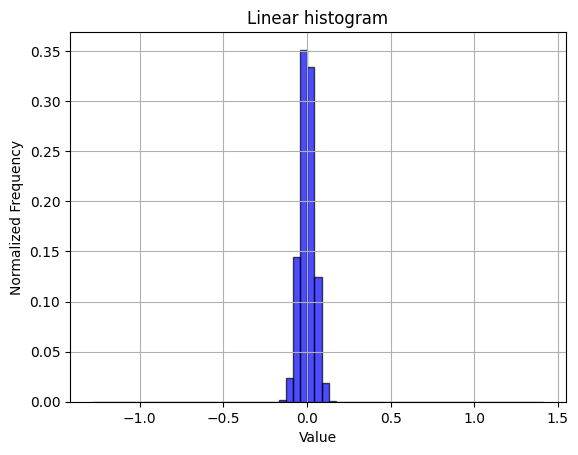

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 7.06425420e-08 0.00000000e+00 3.53212710e-08
 7.06425420e-08 1.41285084e-07 7.06425420e-08 1.41285084e-07
 3.53212710e-08 7.06425420e-08 1.05963813e-07 2.47248897e-07
 2.11927626e-07 2.82570168e-07 3.17891439e-07 4.59

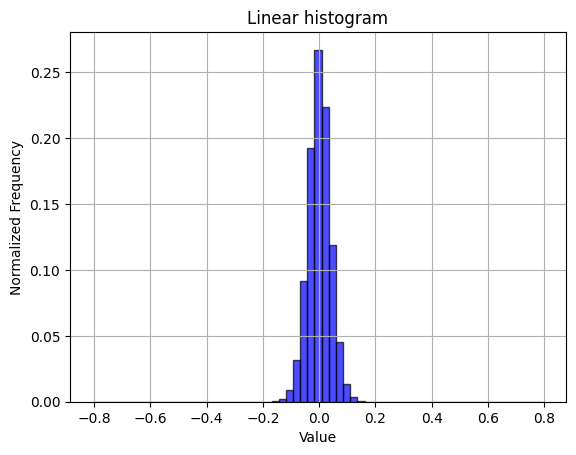

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 4.23855252e-07
 3.17891439e-07 1.05963813e-07 4.23855252e-07 5.29819065e-07
 5.29819065e-07 4.23855252e-07 7.41746691e-07 5.29819065e-07
 8.47710503e-07 1.16560194e-06 1.16560194e-06 1.05963813e-06
 9.53674316e-07 1.69542101e-06 2.64909532e-06 2.33120388e-06
 5.29819065e-06 7.73535834e-06 1.66363186e-05 5.79622057e-05
 2.51028273e-04 1.05211470e-03 4.20898861e-03 1.31869846e-02
 3.60746384e-02 7.74344338e-02 1.32501708e-01 1.81364059e-01
 1.94076644e-01 1.63054148e-01 1.06347614e-01 5.55230247e-02
 2.38073137e-02 7.97176361e-03 2.27536096e-03 5.82483080e-04
 1.21540493e-04 2.81863742e-05 1.14440918e-05 4.66240777e-06
 3.17891439e-06 2.01331245e-06 3.81469727e-06 1.27156576e-06
 1.05963813e-06 5.29819065e-07 9.53674316e-07 8.47710503e-07
 6.35782878e-07 1.05963813e-06 7.41746691e-07 3.17891439e-07
 2.11927626e-07 4.23855252e-07 5.29819065e-07 3.17891439e-07
 0.

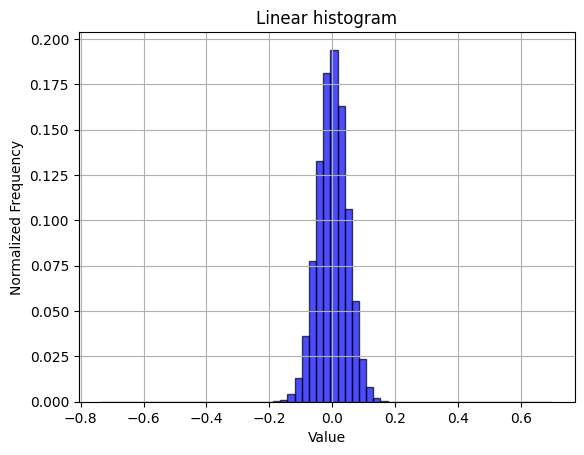

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[5.29819065e-08 5.29819065e-08 2.64909532e-08 2.64909532e-08
 5.29819065e-08 1.32454766e-07 2.11927626e-07 1.32454766e-07
 1.32454766e-07 1.85436673e-07 2.38418579e-07 2.91400486e-07
 3.70873345e-07 4.50346205e-07 4.23855252e-07 7.41746691e-07
 6.09291924e-07 7.41746691e-07 1.40402052e-06 1.61594815e-06
 2.46365865e-06 4.42398919e-06 9.00692410e-06 2.60406070e-05
 1.22176276e-04 6.17318683e-04 2.85172462e-03 1.10918151e-02
 3.60385842e-02 9.55579016e-02 1.88596222e-01 2.54554722e-01
 2.16694355e-01 1.21685372e-01 5.01782364e-02 1.62678030e-02
 4.41813469e-03 1.00366275e-03 2.03238593e-04 4.02927399e-05
 1.22388204e-05 4.95380825e-06 2.94049581e-06 2.03980340e-06
 1.77489387e-06 7.41746691e-07 6.88764784e-07 6.88764784e-07
 4.50346205e-07 2.38418579e-07 3.17891439e

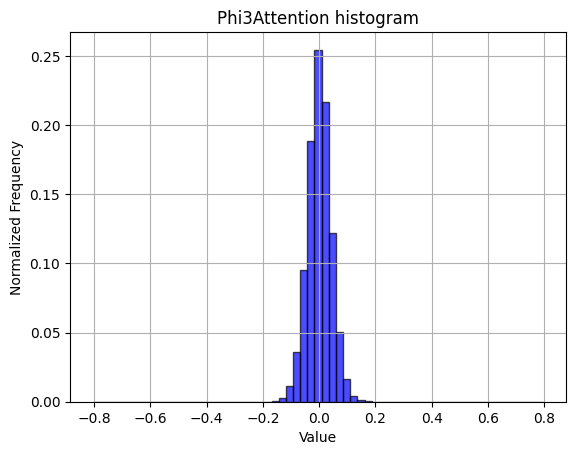

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98682149e-08 0.00000000e+00
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.94728597e-08 1.98682149e-08 1.98682149e-08
 1.98682149e-08 7.94728597e-08 7.94728597e-08 3.77496084e-07
 3.57627869e-07 8.94069672e-07 2.62260437e-06 7.86781311e-06
 3.13719114e-05 1.46706899e-04 7.33673573e-04 3.42160463e-03
 1.23592814e-02 3.77477407e-02 8.67142876e-02 1.56572739e-01
 2.07647542e-01 2.06081589e-01 1.52539770e-01 8.40529799e-02
 3.61870329e-02 1.16846164e-02 3.20933263e-03 6.80486361e-04
 1.37309233e-04 2.88883845e-05 6.57637914e-06 2.14576721e-06
 6.55651093e-07 5.56310018e-07 1.78813934e-07 1.78813934e-07
 7.94728597e-08 3.97364299e-08 5.96046448e-08 3.97364299e-08
 0.00000000e+00 1.98682149e-08 0.00000000e+00 1.98682149e-08
 0

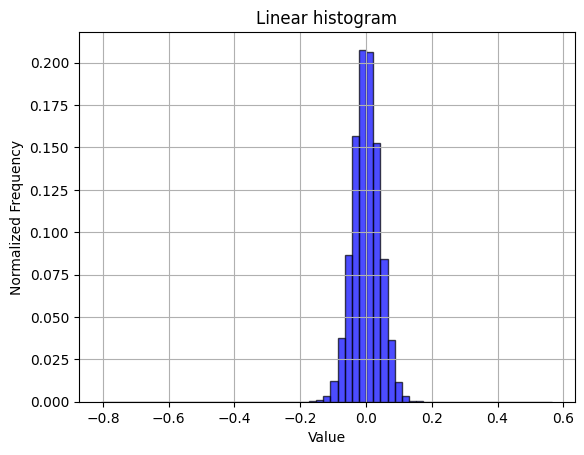

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 3.97364299e-08 3.97364299e-08 0.00000000e+00 1.19209290e-07
 0.00000000e+00 3.97364299e-08 1.19209290e-07 3.97364299e-08
 1.98682149e-07 1.98682149e-07 1.19209290e-07 5.56310018e-07
 1.23182933e-06 3.37759654e-05 1.11802419e-03 1.65501038e-02
 1.10316714e-01 3.05760463e-01 3.55271657e-01 1.72893246e-01
 3.48622402e-02 3.06983789e-03 1.16070112e-04 3.17891439e-06
 6.75519307e-07 2.78155009e-07 1.98682149e-07 1.58945719e-07
 1.58945719e-07 0.00000000e+00 1.58945719e-07 7.94728597e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 3.97364299e-08 0.00000000e+00 3.97364299e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

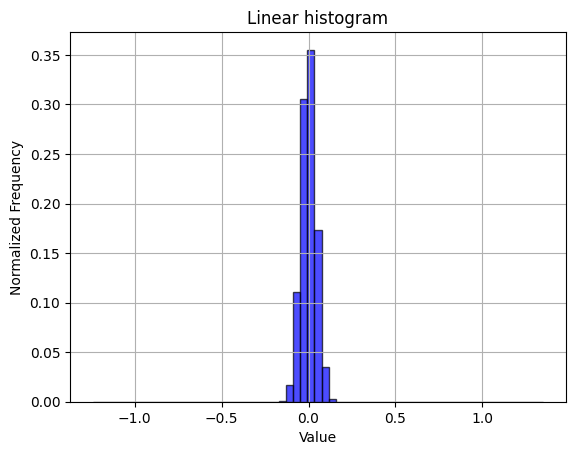

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[7.06425420e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.53212710e-08 0.00000000e+00 7.06425420e-08 3.53212710e-08
 1.05963813e-07 1.76606355e-07 7.06425420e-08 1.05963813e-07
 1.76606355e-07 1.05963813e-07 2.11927626e-07 4.23

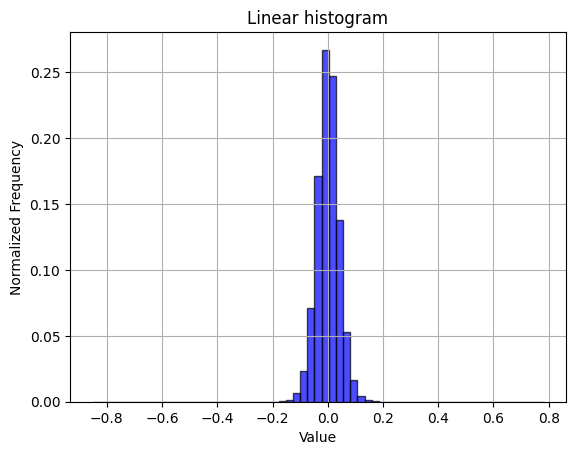

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.05963813e-07 0.00000000e+00 3.17891439e-07
 2.11927626e-07 4.23855252e-07 6.35782878e-07 9.53674316e-07
 9.53674316e-07 2.01331245e-06 1.05963813e-06 1.58945719e-06
 2.01331245e-06 1.69542101e-06 2.11927626e-06 4.66240777e-06
 3.70873345e-06 5.72204590e-06 9.53674316e-06 1.91794501e-05
 5.56310018e-05 2.53147549e-04 1.12692515e-03 4.64714898e-03
 1.51807997e-02 4.07929950e-02 8.80315569e-02 1.46123144e-01
 1.92536566e-01 1.94817967e-01 1.53817495e-01 9.25788879e-02
 4.53846190e-02 1.73861186e-02 5.41475084e-03 1.34680006e-03
 3.21282281e-04 6.46379259e-05 2.26762560e-05 1.00665622e-05
 5.40415446e-06 6.46379259e-06 2.96698676e-06 2.75505914e-06
 1.69542101e-06 1.90734863e-06 1.48349338e-06 1.48349338e-06
 9.53674316e-07 1.27156576e-06 1.16560194e-06 1.16560194e-06
 5.29819065e-07 3.17891439e-07 1.05963813e-07 0.00000000e+00
 0.

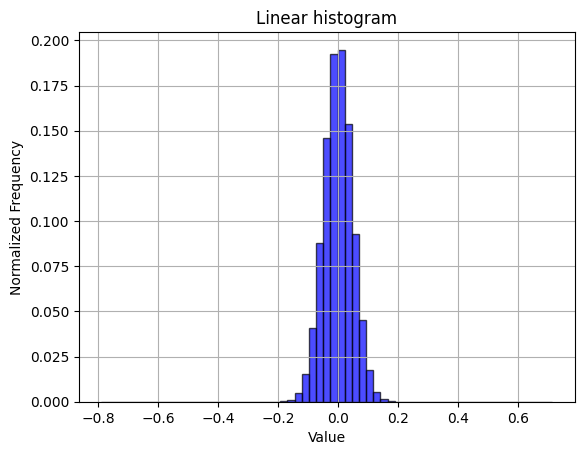

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[5.29819065e-08 0.00000000e+00 2.64909532e-08 0.00000000e+00
 2.64909532e-08 0.00000000e+00 5.29819065e-08 5.29819065e-08
 7.94728597e-08 2.38418579e-07 1.05963813e-07 1.85436673e-07
 3.44382392e-07 3.97364299e-07 5.29819065e-07 7.15255737e-07
 7.94728597e-07 9.27183363e-07 9.53674316e-07 1.19209290e-06
 2.35769484e-06 2.17225817e-06 4.90082635e-06 6.94062975e-06
 1.89940135e-05 8.72876909e-05 4.33815850e-04 2.11419000e-03
 8.15508101e-03 2.75599162e-02 7.68766403e-02 1.69747565e-01
 2.53311661e-01 2.36055877e-01 1.39779965e-01 5.86142540e-02
 1.98584927e-02 5.67192501e-03 1.33286582e-03 2.69757377e-04
 5.50217099e-05 1.35898590e-05 6.17239210e-06 3.23189629e-06
 3.12593248e-06 1.90734863e-06 1.08612908e-06 8.47710503e-07
 9.80165270e-07 4.50346205e-07 5.03328111e

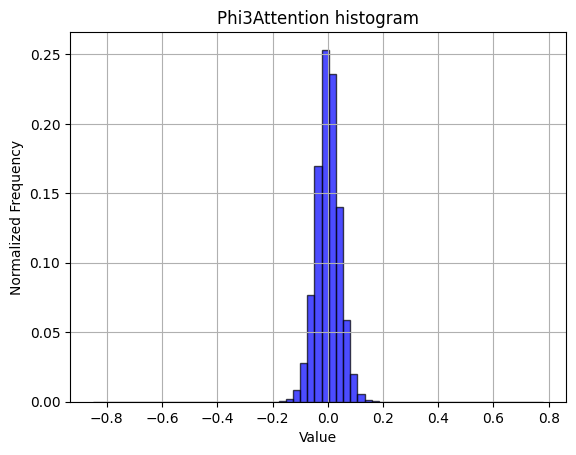

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 1.98682149e-08 1.98682149e-08 0.00000000e+00
 1.98682149e-08 0.00000000e+00 9.93410746e-08 3.97364299e-08
 1.98682149e-08 1.98682149e-08 5.96046448e-08 0.00000000e+00
 1.39077504e-07 7.94728597e-08 1.58945719e-07 1.58945719e-07
 4.17232513e-07 5.16573588e-07 9.13937887e-07 1.58945719e-06
 2.36431758e-06 4.62929408e-06 7.82807668e-06 1.72058741e-05
 1.30236149e-04 4.05706962e-03 7.93238878e-02 3.98921450e-01
 4.20576056e-01 9.15604035e-02 5.20426035e-03 1.53660774e-04
 1.70469284e-05 7.92741776e-06 4.41074371e-06 2.74181366e-06
 1.50998433e-06 1.03314718e-06 5.96046448e-07 3.57627869e-07
 3.37759654e-07 2.18550364e-07 7.94728597e-08 3.97364299e-08
 5.96046448e-08 1.98682149e-08 1.98682149e-08 5.96046448e-08
 5.96046448e-08 1.98682149e-08 1.98682149e-08 1.98682149e-08
 0.00000000e+00 0.00000000e+00 1.98682149e-08 1.98682149e-08
 0.00000000e+00 1.98682149e-08 0.00000000e+00 0.00000000e+00
 0

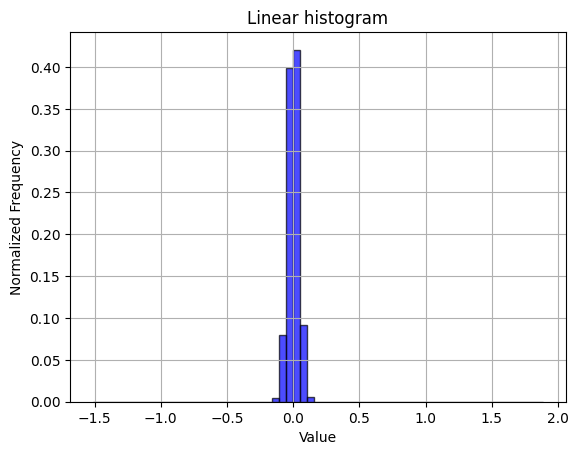

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97364299e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.97364299e-08 7.94728597e-08
 3.97364299e-08 0.00000000e+00 3.97364299e-08 7.94728597e-08
 0.00000000e+00 3.97364299e-08 7.94728597e-08 7.94728597e-08
 7.94728597e-08 7.94728597e-08 7.94728597e-08 1.58945719e-07
 1.19209290e-07 1.19209290e-07 3.57627869e-07 7.15255737e-07
 1.94708506e-06 8.83181890e-04 1.06521209e-01 6.48535053e-01
 2.39314477e-01 4.73125776e-03 7.51018524e-06 9.93410746e-07
 4.76837158e-07 3.17891439e-07 2.78155009e-07 1.58945719e-07
 1.19209290e-07 3.97364299e-08 3.97364299e-08 1.98682149e-07
 0.00000000e+00 0.00000000e+00 7.94728597e-08 3.97364299e-08
 0.00000000e+00 7.94728597e-08 3.97364299e-08 3.97364299e-08
 3.97364299e-08 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.

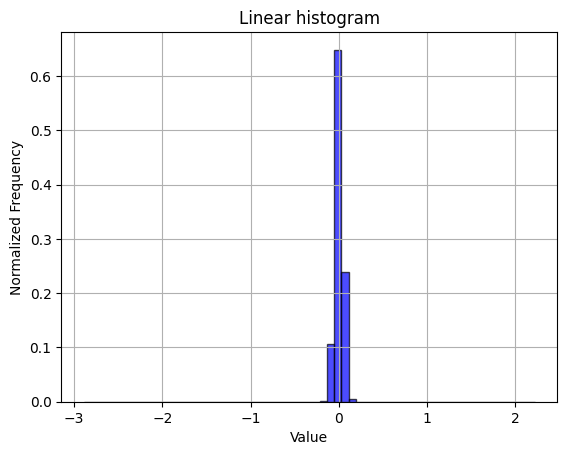

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 0.00000000e+00 0.00000000e+00 3.53212710e-08
 0.00000000e+00 7.06425420e-08 2.11927626e-07 0.00000000e+00
 3.53212710e-08 3.53212710e-08 3.53212710e-08 7.06425420e-08
 1.76606355e-07 2.82570168e-07 3.53212710e-07 4.23

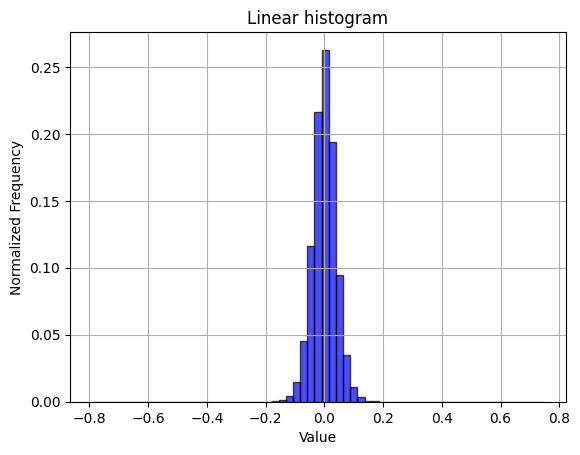

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 0.00000000e+00 2.11927626e-07 5.29819065e-07
 3.17891439e-07 3.17891439e-07 6.35782878e-07 6.35782878e-07
 1.05963813e-06 1.05963813e-06 1.69542101e-06 1.48349338e-06
 1.48349338e-06 1.80138482e-06 1.05963813e-06 2.64909532e-06
 2.33120388e-06 3.39084201e-06 4.98029921e-06 5.61608209e-06
 1.13381280e-05 2.85042657e-05 1.41037835e-04 8.71446398e-04
 5.12027740e-03 2.30629179e-02 7.63586892e-02 1.73692809e-01
 2.59123378e-01 2.41812706e-01 1.43849797e-01 5.64010408e-02
 1.55573951e-02 3.27544742e-03 5.22295634e-04 8.68903266e-05
 1.78019206e-05 9.96059842e-06 5.61608209e-06 3.28487820e-06
 1.90734863e-06 3.17891439e-06 1.58945719e-06 5.29819065e-07
 9.53674316e-07 8.47710503e-07 9.53674316e-07 8.47710503e-07
 9.53674316e-07 8.47710503e-07 9.53674316e-07 6.35782878e-07
 2.11927626e-07 5.29819065e-07 3.17891439e-07 2.11927626e-07
 1.05963813e-07 2.11927626e-07 1.05963813e-07 0.00000000e+00
 0.

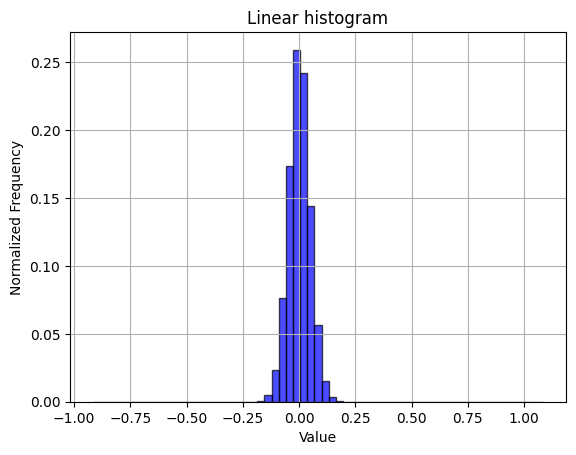

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 0.00000000e+00 5.29819065e-08 1.32454766e-07
 1.05963813e-07 7.94728597e-08 1.85436673e-07 1.58945719e-07
 3.70873345e-07 3.70873345e-07 4.50346205e-07 4.23855252e-07
 4.23855252e-07 5.82800971e-07 5.29819065e-07 1.05963813e-06
 9.80165270e-07 1.66893005e-06 2.33120388e-06 2.96698676e-06
 5.93397352e-06 1.73515744e-05 8.70492723e-05 4.94771534e-04
 2.87058618e-03 1.38709810e-02 5.59254487e-02 1.67234421e-01
 3.06108528e-01 2.75061131e-01 1.28400485e-01 3.86599965e-02
 9.05852848e-03 1.81214015e-03 2.99639172e-04 5.30083974e-05
 1.16825104e-05 5.19222683e-06 2.94049581e-06 1.69542101e-06
 1.00665622e-06 1.11262004e-06 5.82800971e-07 2.64909532e-07
 3.44382392e-07 2.64909532e-07 2.91400486e-07 3.17891439e-07
 2.64909532e-07 2.38418579e-07 2.64909532e

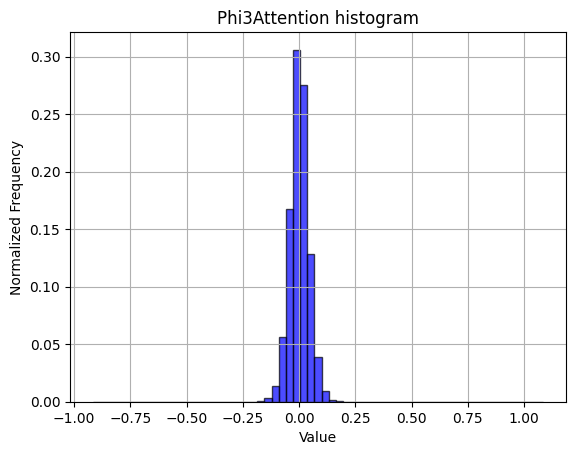

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 1.98682149e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.98682149e-08
 1.98682149e-08 0.00000000e+00 3.97364299e-08 5.96046448e-08
 9.93410746e-08 1.19209290e-07 9.93410746e-08 5.96046448e-08
 1.39077504e-07 1.19209290e-07 1.39077504e-07 2.78155009e-07
 2.58286794e-07 4.37100728e-07 5.36441803e-07 7.94728597e-07
 1.86761220e-06 6.81479772e-06 3.58422597e-05 2.12728977e-04
 1.38256947e-03 8.39815537e-03 3.85732849e-02 1.23806000e-01
 2.40879397e-01 2.83244769e-01 1.95236107e-01 8.14543962e-02
 2.17678746e-02 4.22088305e-03 6.51756922e-04 1.00533168e-04
 1.75237656e-05 3.15904617e-06 1.25169754e-06 3.97364299e-07
 2.98023224e-07 1.58945719e-07 9.93410746e-08 1.98682149e-07
 1.19209290e-07 1.98682149e-08 1.98682149e-08 1.39077504e-07
 5.96046448e-08 1.19209290e-07 3.97364299e-08 1.98682149e-08
 5.96046448e-08 0.00000000e+00 1.98682149e-08 1.98682149e-08
 0

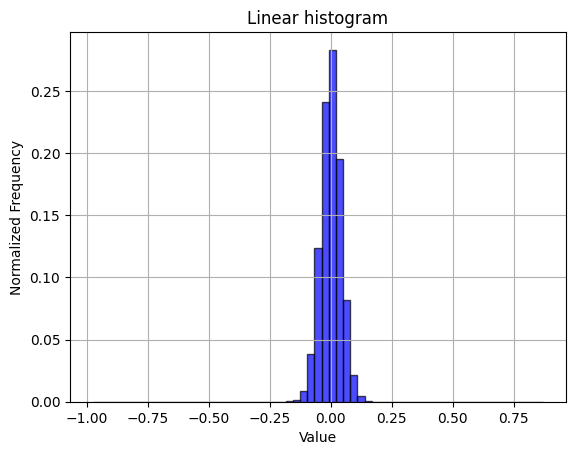

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.97364299e-08
 0.00000000e+00 3.97364299e-08 0.00000000e+00 3.97364299e-08
 0.00000000e+00 3.97364299e-08 0.00000000e+00 7.94728597e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.94728597e-08 1.58945719e-07 3.97364299e-08 7.94728597e-08
 0.00000000e+00 1.58945719e-07 1.58945719e-07 1.19209290e-07
 3.57627869e-07 6.75519307e-07 1.43051147e-06 1.43051147e-06
 6.75519307e-06 2.37902006e-04 7.85839558e-03 9.36783552e-02
 3.56802265e-01 3.99932424e-01 1.27672076e-01 1.33068164e-02
 4.84426816e-04 1.10467275e-05 1.39077504e-06 1.03314718e-06
 6.75519307e-07 4.37100728e-07 1.58945719e-07 2.38418579e-07
 1.98682149e-07 7.94728597e-08 7.94728597e-08 7.94728597e-08
 3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.94728597e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.

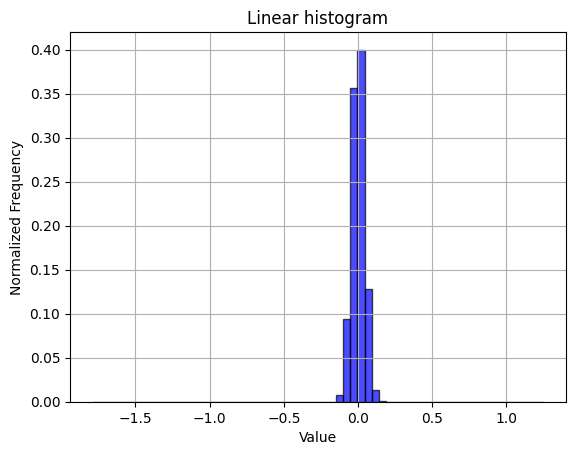

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Linear
Operation: Linear(in_features=3072, out_features=9216, bias=False)
[3.53212710e-08 3.53212710e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.05963813e-07 3.53212710e-08
 3.53212710e-08 1.05963813e-07 3.53212710e-08 7.06425420e-08
 3.53212710e-08 1.05963813e-07 1.41285084e-07 7.06

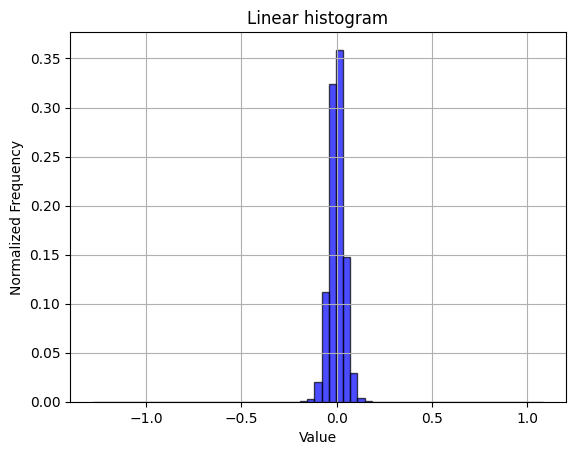

Module: Linear
Operation: Linear(in_features=3072, out_features=3072, bias=False)
[1.05963813e-07 2.11927626e-07 2.11927626e-07 2.11927626e-07
 4.23855252e-07 4.23855252e-07 2.11927626e-07 1.05963813e-07
 1.05963813e-07 3.17891439e-07 2.11927626e-07 4.23855252e-07
 3.17891439e-07 2.11927626e-07 4.23855252e-07 3.17891439e-07
 3.17891439e-07 5.29819065e-07 6.35782878e-07 1.27156576e-06
 2.01331245e-06 4.55644396e-06 6.03993734e-06 1.00665622e-05
 1.65303548e-05 3.11533610e-05 8.21219550e-05 1.33334266e-03
 2.97467973e-02 2.30724441e-01 4.75639025e-01 2.31184112e-01
 2.97375785e-02 1.31691827e-03 8.06384616e-05 3.34845649e-05
 1.61064996e-05 1.03844537e-05 4.13258870e-06 4.55644396e-06
 1.69542101e-06 1.48349338e-06 7.41746691e-07 5.29819065e-07
 4.23855252e-07 2.11927626e-07 5.29819065e-07 3.17891439e-07
 2.11927626e-07 1.05963813e-07 1.05963813e-07 2.11927626e-07
 3.17891439e-07 0.00000000e+00 3.17891439e-07 2.11927626e-07
 4.23855252e-07 1.05963813e-07 3.17891439e-07 3.17891439e-07
 1.

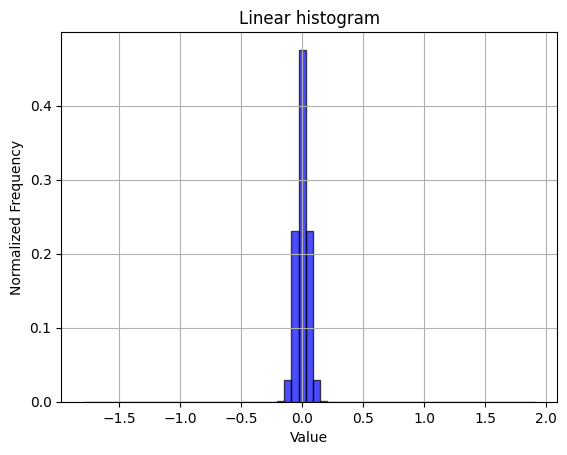

Module: Phi3Attention
Operation: Phi3Attention(
  (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
  (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  (rotary_emb): Phi3RotaryEmbedding()
)
[2.64909532e-08 5.29819065e-08 5.29819065e-08 5.29819065e-08
 1.05963813e-07 1.05963813e-07 5.29819065e-08 2.64909532e-08
 5.29819065e-08 1.05963813e-07 5.29819065e-08 1.05963813e-07
 1.58945719e-07 7.94728597e-08 2.11927626e-07 1.32454766e-07
 1.32454766e-07 2.64909532e-07 2.64909532e-07 5.82800971e-07
 5.56310018e-07 1.37752957e-06 1.96033054e-06 2.83453200e-06
 5.03328111e-06 9.93410746e-06 3.28222911e-05 6.69664807e-04
 1.76775191e-02 2.07651642e-01 5.47195805e-01 2.08377096e-01
 1.76531209e-02 6.61267175e-04 3.22659810e-05 1.06758542e-05
 5.03328111e-06 3.07295058e-06 1.27156576e-06 1.37752957e-06
 4.76837158e-07 4.76837158e-07 2.38418579e-07 3.17891439e-07
 1.85436673e-07 1.85436673e-07 2.38418579e-07 1.05963813e-07
 7.94728597e-08 5.29819065e-08 2.64909532e

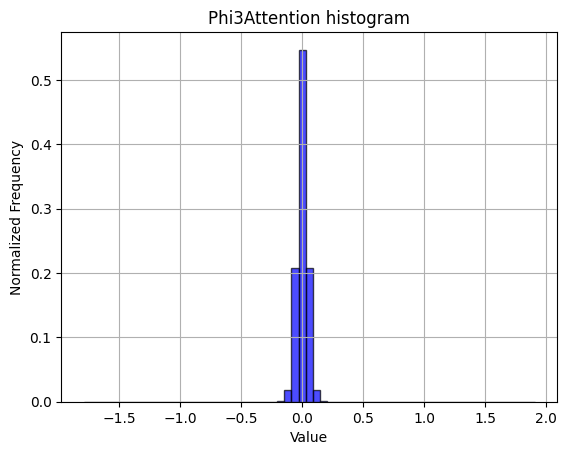

Module: Linear
Operation: Linear(in_features=3072, out_features=16384, bias=False)
[1.98682149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98682149e-08 0.00000000e+00 0.00000000e+00 7.94728597e-08
 3.97364299e-08 0.00000000e+00 3.97364299e-08 7.94728597e-08
 5.96046448e-08 3.97364299e-08 1.19209290e-07 1.78813934e-07
 1.98682149e-07 2.58286794e-07 8.14596812e-07 1.52985255e-06
 4.29153442e-06 1.38481458e-05 7.77443250e-05 5.15361627e-04
 4.27577893e-03 2.89842685e-02 1.21348421e-01 2.79432575e-01
 3.20888241e-01 1.80776934e-01 5.31985164e-02 9.11639134e-03
 1.17176771e-03 1.52746836e-04 2.83718109e-05 6.43730164e-06
 2.22524007e-06 9.73542531e-07 7.54992167e-07 3.77496084e-07
 1.39077504e-07 9.93410746e-08 1.98682149e-08 1.98682149e-08
 1.98682149e-08 1.98682149e-08 3.97364299e-08 1.98682149e-08
 1.98682149e-08 1.98682149e-08 1.98682149e-08 0.00000000e+00
 0

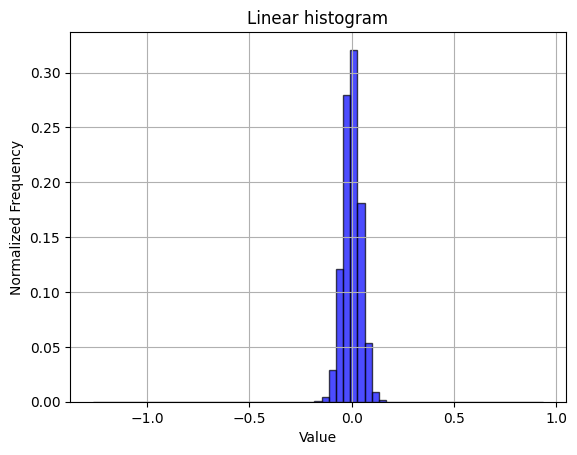

Module: Linear
Operation: Linear(in_features=8192, out_features=3072, bias=False)
[3.97364299e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.97364299e-08 0.00000000e+00 0.00000000e+00 7.94728597e-08
 0.00000000e+00 0.00000000e+00 3.97364299e-08 1.98682149e-07
 1.19209290e-07 7.94728597e-08 7.94728597e-08 1.98682149e-07
 2.78155009e-07 3.57627869e-07 2.78155009e-07 2.38418579e-07
 1.19209290e-07 6.75519307e-07 5.16573588e-07 1.27156576e-06
 1.27156576e-06 2.02655792e-06 2.50339508e-06 4.13258870e-06
 8.14596812e-06 1.83582306e-05 7.38302867e-05 5.17368317e-03
 1.56225999e-01 5.98605553e-01 2.29260445e-01 1.04453961e-02
 1.27633413e-04 2.27292379e-05 8.30491384e-06 4.64916229e-06
 2.70207723e-06 1.90734863e-06 1.15235647e-06 1.27156576e-06
 5.96046448e-07 6.35782878e-07 3.57627869e-07 1.58945719e-07
 3.97364299e-07 2.78155009e-07 1.58945719e-07 2.38418579e-07
 1.58945719e-07 1.58945719e-07 7.94728597e-08 2.38418579e-07
 7.94728597e-08 0.00000000e+00 0.00000000e+00 3.97364299e-08
 3.

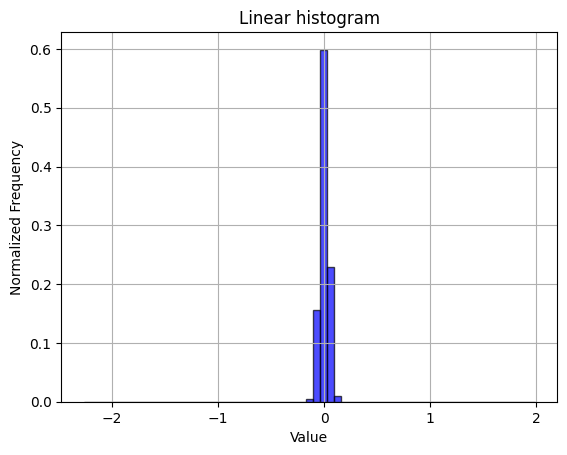

Module: Phi3DecoderLayer
Operation: Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm()
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
  (post_attention_layernorm): Phi3RMSNorm()
)
No weights in this module.
Module: Phi3Model
Operation: Phi3Model(
  (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
  (embed_dropout): Dropout(p=0.0, inplace=False)
  (layers): ModuleList(
    (0-31): 32 x Phi3DecoderLayer(
      (self_attn): Phi3Attention(
        (o_proj): Linear(in_features=3072, out_features=3072, bias=False)

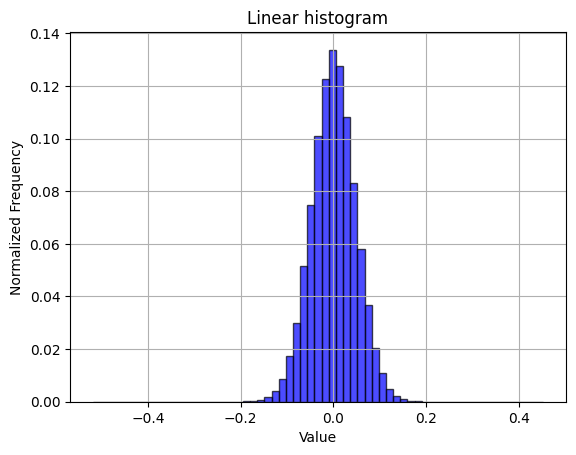

Module: Phi3ForCausalLM
Operation: Phi3ForCausalLM(
  (model): Phi3Model(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x Phi3DecoderLayer(
        (self_attn): Phi3Attention(
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
          (rotary_emb): Phi3RotaryEmbedding()
        )
        (mlp): Phi3MLP(
          (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (activation_fn): SiLU()
        )
        (input_layernorm): Phi3RMSNorm()
        (resid_attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
        (post_attention_layernorm): Phi3RMSNorm()
      )
    )
    (norm): Phi3RMSNorm()
  )
  (lm_head): Linear(

'Hey, are you conscious? Can you talk to me?\n'

In [ ]:
prompt = "Hey, are you conscious? Can you talk to me?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

print("Input Tokens: ", len(inputs[0]))
print("Number of layers: ", idx)
# Generate
generate_ids = model.generate(inputs.input_ids, max_length=len(inputs[0]) + 1)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]